In [1]:
#런타임 초기화시 기본 라이브러리
import numpy as np 
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression                                 #basic linear
from sklearn.linear_model import Ridge, Lasso, ElasticNet                         #Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor     #Random Forest, Gradient Boosting
from xgboost import XGBRegressor                                                  #XGBoost
from boruta import BorutaPy                                                       #Boruta

In [2]:
#런타임 초기화시 기본 데이터 가져오기
import pickle
dfy= pd.read_pickle("dfy_default.pickle")
dfy = dfy.astype({'ln_amount':'float64'}) #ln_amount int로 변환하기
dfX_scaled = pd.read_pickle("dfX_scaled.pickle")
dfX = pd.read_pickle("dfX_default.pickle")
df_all_lag = pd.read_pickle("df_all_lag.pickle")
df_all_lag = df_all_lag.iloc[4:,:]#앞 4줄 자르기, nrow = 273
df_all_lag.reset_index(drop=True, inplace=True) #4줄 자르기 후 인덱스 초기화

df_all = pd.concat([dfX_scaled, dfy], axis=1) #scaled기준

In [191]:
import pickle
dfX = pd.read_pickle("dfX_default.pickle")

In [193]:
import pandas as pd
dfX.to_csv('dfX_default.csv')

In [3]:
df_all_diff = pd.read_pickle("df_all_diff.pickle")

In [30]:
df_all_ln_diff = pd.concat([dfy['ln_diff'],df_all_lag], axis=1)

In [31]:
df_all_ln_diff = df_all_ln_diff[:273]

In [32]:
df_all_ln_diff = df_all_ln_diff[1:]

In [34]:
df_all_ln_diff.to_csv('df_all_ln_diff.csv')

In [ ]:
df_all_lag_start = df_all.drop(['sum', 'ln_diff'], axis=1)

In [170]:
dfy

sum  ln_amount    ln_diff      ex_ln      im_ln   ex_diff   im_diff
0     24757048  17.024621        NaN  16.313862  16.348781       NaN       NaN
1     24699694  17.022301  -0.231936  16.355224  16.302386  0.041362 -0.046394
2     28641714  17.170375  14.807333  16.484799  16.469598  0.129575  0.167212
3     26866572  17.106393  -6.398135  16.419832  16.406617 -0.064968 -0.062981
4     27920111  17.144858   3.846442  16.499046  16.402022  0.079215 -0.004595
..         ...        ...        ...        ...        ...       ...       ...
272  118189137  18.587797  -3.691553  17.861650  17.926595  0.010025 -0.078991
273  111595277  18.530389  -5.740747  17.774953  17.895878 -0.086697 -0.030717
274  110619510  18.521607  -0.878225  17.762357  17.890463 -0.012596 -0.005415
275  114471728  18.555838   3.423140  17.820088  17.903553  0.057731  0.013090
276  105280375  18.472138  -8.370085  17.652237  17.891444 -0.167851 -0.012109

[277 rows x 7 columns]

주피터 노트북에서 코드 접기 실행하기  
https://for-jk.tistory.com/9

## 데이터 전처리

In [12]:
import pandas as pd
import numpy as np
import missingno as msno

from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [274]:
df= pd.read_csv("final.csv")

In [278]:
df.columns

Index(['Unnamed: 0', 'OIL_D', 'OIL_D.1', 'BEAN', 'GOLD', 'NIKEL', 'ZINC',
       'CORN', 'WHEAT', 'COPP', 'ALMN', 'COTT', 'KRWUSD', 'KRWJPY', 'KRWEUR',
       'JPYUSD', 'USDEUR', 'KRWUSD.1', 'KRWJPY.1', 'KRWEUR.1', 'JPYUSD.1',
       'USDEUR.1', 'IIP_JP', 'IIP_RU', 'IIP_US', 'KOSPI', 'DJONES', 'NASDAQ',
       'ESTOXX', 'DAX', 'NIKKEI', 'STI', 'HSI', 'SHCOMP', 'EX_INDEX_P',
       'EX_INDEX_Q', 'IM_INDEX_P', 'IM_INDEX_P.1', 'PPI_KR', 'PPI_US',
       'PPI_JP'],
      dtype='object')

In [280]:
df['IM_INDEX_P']

0      133.88
1      130.56
2      128.19
3      126.84
4      127.89
        ...  
272    131.24
273    132.74
274    125.51
275    117.83
276    114.37
Name: IM_INDEX_P, Length: 277, dtype: float64

In [10]:
len(df.columns)

41

<AxesSubplot:>

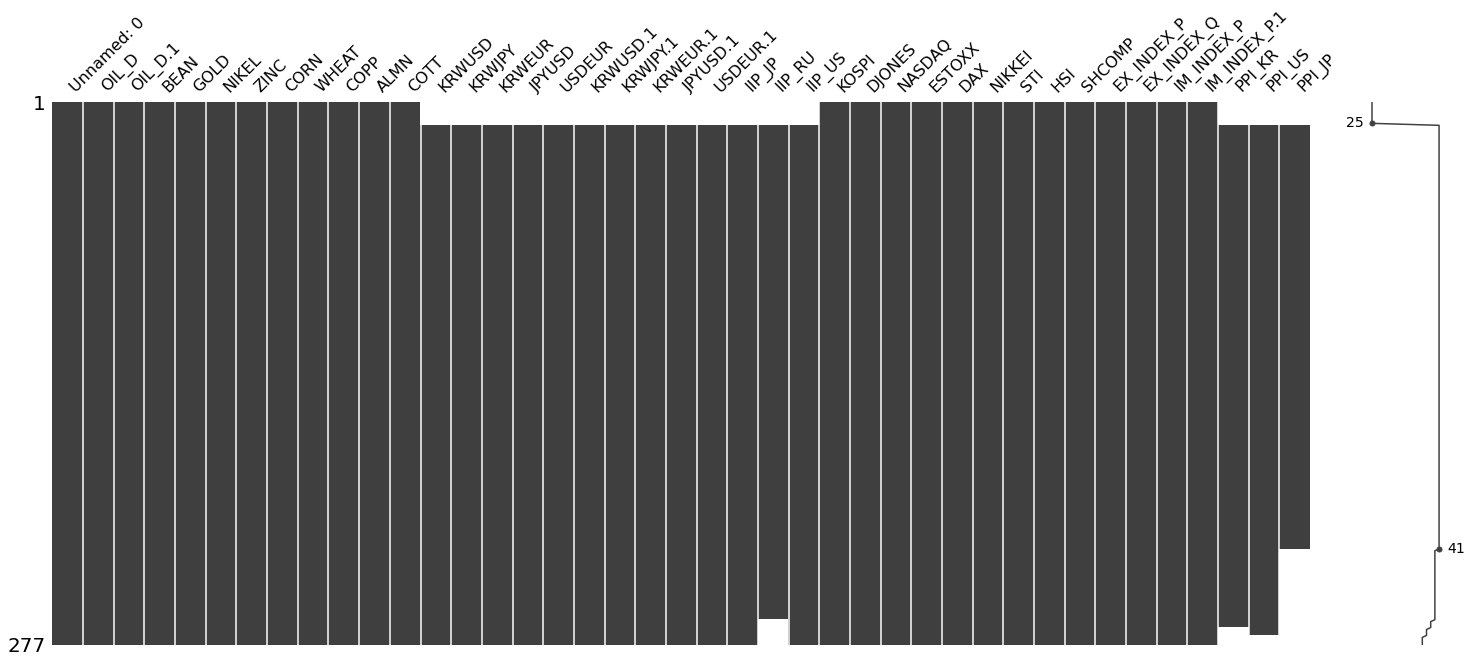

In [13]:
msno.matrix(df)

<AxesSubplot:>

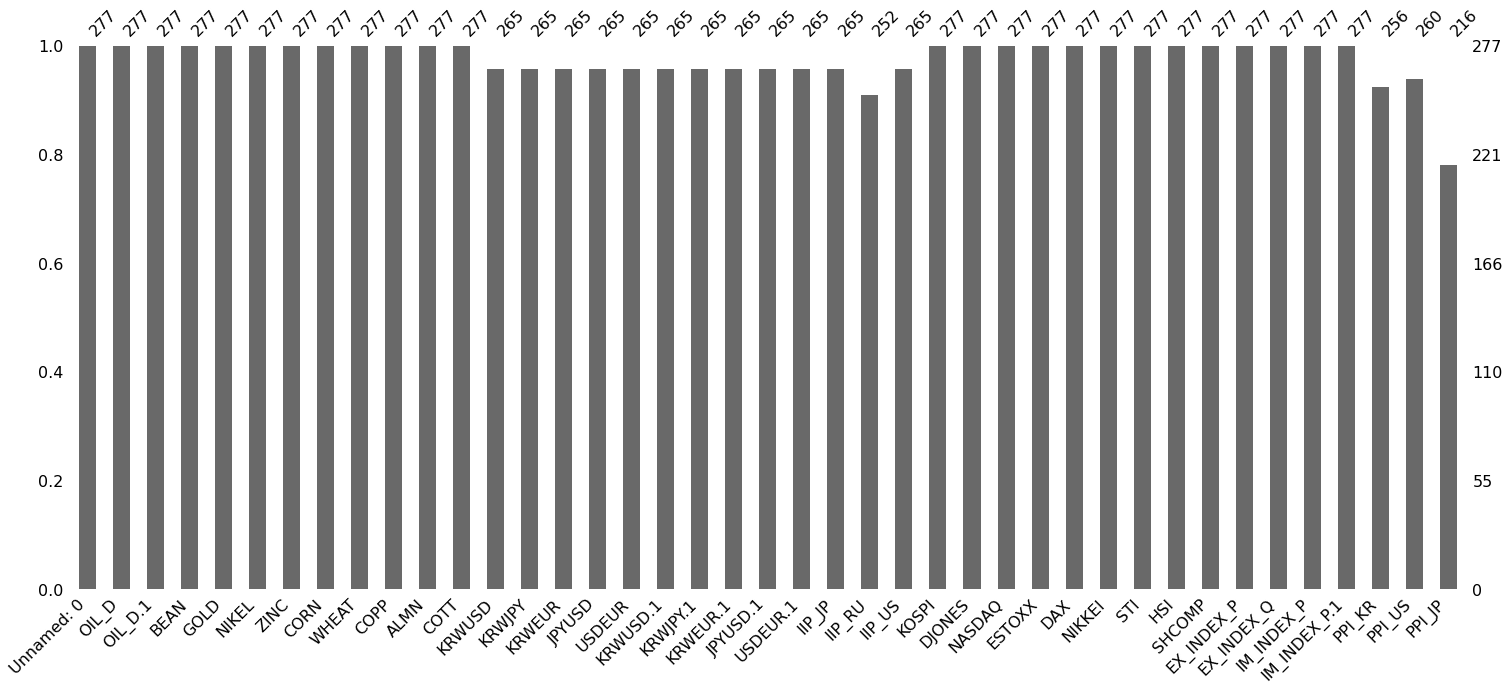

In [14]:
msno.bar(df)

In [15]:
df.head(5)

Unnamed: 0  OIL_D  OIL_D.1    BEAN     GOLD   NIKEL      ZINC    CORN  \
0    2000/01  23.97    26.92  508.00  283.500   8,739  1,118.75  220.00   
1    2000/02  25.29    29.04  501.25  292.200   9,813  1,068.55  215.00   
2    2000/03  23.72    24.12  545.50  279.080  10,160  1,105.40  236.00   
3    2000/04  22.79    23.43  526.50  273.550  10,070  1,160.25  223.75   
4    2000/05  25.51    29.03  517.50  272.100   9,090  1,119.00  225.00   

    WHEAT   COPP  ...       STI        HSI    SHCOMP  EX_INDEX_P  EX_INDEX_Q  \
0  256.25  1,831  ...  2,231.82  15,532.34  1,535.00  12,162,425  12,594,623   
1  247.00  1,697  ...  2,163.75  17,169.44  1,714.58  12,676,042  12,023,652   
2  262.25  1,734  ...  2,150.24  17,406.54  1,800.23  14,429,703  14,212,011   
3  242.25  1,727  ...  2,176.63  15,519.30  1,836.32  13,522,040  13,344,532   
4  274.75  1,744  ...  1,865.31  14,713.86  1,894.55  14,636,755  13,283,356   

  IM_INDEX_P IM_INDEX_P.1 PPI_KR PPI_US PPI_JP  
0     133.88       133.88    NaN    NaN    NaN  
1     130.56       130.56    NaN    NaN    NaN  
2     128.19       128.19    NaN    NaN    NaN  
3     126.84       126.84    NaN    NaN    NaN  
4     127.89       127.89    NaN    NaN    NaN  

[5 rows x 41 columns]

In [16]:
df.rename(columns={'OIL_D.1':'OIL_B'}, inplace=True)

In [17]:
df = df.drop(["KRWEUR.1", "KRWUSD.1", 'KRWJPY.1', 'JPYUSD.1', 'USDEUR.1'], axis=1)

In [18]:
df

Unnamed: 0  OIL_D  OIL_B      BEAN       GOLD   NIKEL      ZINC    CORN  \
0      2000/01  23.97  26.92    508.00    283.500   8,739  1,118.75  220.00   
1      2000/02  25.29  29.04    501.25    292.200   9,813  1,068.55  215.00   
2      2000/03  23.72  24.12    545.50    279.080  10,160  1,105.40  236.00   
3      2000/04  22.79  23.43    526.50    273.550  10,070  1,160.25  223.75   
4      2000/05  25.51  29.03    517.50    272.100   9,090  1,119.00  225.00   
..         ...    ...    ...       ...        ...     ...       ...     ...   
272    2022/09  90.10  86.15  1,364.75  1,660.620  21,012  3,014.25  677.50   
273    2022/10  90.04  93.26  1,407.00  1,633.560  21,705  2,735.50  691.50   
274    2022/11  80.21  86.56  1,469.50  1,768.530  26,892  3,050.25  662.00   
275    2022/12  78.66  84.97  1,519.25  1,824.020  29,886  3,003.25  678.50   
276    2023/01  79.32  85.36  1,538.00  1,928.360  30,153  3,418.76  679.75   

      WHEAT   COPP  ...       STI        HSI    SHCOMP  EX_INDEX_P  \
0    256.25  1,831  ...  2,231.82  15,532.34  1,535.00  12,162,425   
1    247.00  1,697  ...  2,163.75  17,169.44  1,714.58  12,676,042   
2    262.25  1,734  ...  2,150.24  17,406.54  1,800.23  14,429,703   
3    242.25  1,727  ...  2,176.63  15,519.30  1,836.32  13,522,040   
4    274.75  1,744  ...  1,865.31  14,713.86  1,894.55  14,636,755   
..      ...    ...  ...       ...        ...       ...         ...   
272  921.50  7,683  ...  3,130.24  17,222.83  3,024.39  57,176,300   
273  882.25  7,522  ...  3,093.11  14,687.02  2,893.48  52,428,092   
274  771.50  8,227  ...  3,290.49  18,597.23  3,151.34  51,771,855   
275  792.00  8,365  ...  3,251.32  19,781.41  3,089.26  54,848,666   
276  761.25  9,200  ...  3,365.67  21,842.33  3,255.67  46,384,015   

     EX_INDEX_Q IM_INDEX_P IM_INDEX_P.1  PPI_KR  PPI_US  PPI_JP  
0    12,594,623     133.88       133.88     NaN     NaN     NaN  
1    12,023,652     130.56       130.56     NaN     NaN     NaN  
2    14,212,011     128.19       128.19     NaN     NaN     NaN  
3    13,344,532     126.84       126.84     NaN     NaN     NaN  
4    13,283,356     127.89       127.89     NaN     NaN     NaN  
..          ...        ...          ...     ...     ...     ...  
272  61,012,837     131.24       131.24     NaN     NaN     NaN  
273  59,167,185     132.74       132.74     NaN     NaN     NaN  
274  58,847,655     125.51       125.51     NaN     NaN     NaN  
275  59,623,062     117.83       117.83     NaN     NaN     NaN  
276  58,901,135     114.37       114.37     NaN     NaN     NaN  

[277 rows x 36 columns]

In [19]:
df_1 = pd.read_csv("scrab.csv")

In [20]:
df_1 = df_1.drop(["Date"], axis=1)

In [21]:
df.columns

Index(['Unnamed: 0', 'OIL_D', 'OIL_B', 'BEAN', 'GOLD', 'NIKEL', 'ZINC', 'CORN',
       'WHEAT', 'COPP', 'ALMN', 'COTT', 'KRWUSD', 'KRWJPY', 'KRWEUR', 'JPYUSD',
       'USDEUR', 'IIP_JP', 'IIP_RU', 'IIP_US', 'KOSPI', 'DJONES', 'NASDAQ',
       'ESTOXX', 'DAX', 'NIKKEI', 'STI', 'HSI', 'SHCOMP', 'EX_INDEX_P',
       'EX_INDEX_Q', 'IM_INDEX_P', 'IM_INDEX_P.1', 'PPI_KR', 'PPI_US',
       'PPI_JP'],
      dtype='object')

In [22]:
df_1.rename(columns={'KRWEUD':"KRWEUR"}, inplace=True)

In [23]:
df_1.columns

Index(['OIL_W', 'EX_INDEX_P', 'IM_INDEX_P', 'PPI_US', 'PPI_KR', 'PPI_JP',
       'IIP_JP', 'IIP_RU', 'IIP_US', 'VIX', 'IIP', 'OPER_IDX', 'SHIP_IDX',
       'STOCK_IDX', 'PANTIV_IDF', 'CLI', 'CCI', 'LCI', 'Energy', 'Employ',
       'CLI_OECD', 'Sprate', 'EFFR_US', 'KRWUSD', 'KRWJPY', 'KRWEUR', 'JPYUSD',
       'USDEUR'],
      dtype='object')

In [24]:
df = df.drop(['OIL_W', 'EX_INDEX_P', 'IM_INDEX_P', 'PPI_US', 'PPI_KR', 'PPI_JP',
       'IIP_JP', 'IIP_RU', 'IIP_US', 'VIX', 'IIP', 'OPER_IDX', 'SHIP_IDX',
       'STOCK_IDX', 'PANTIV_IDF', 'CLI', 'CCI', 'LCI', 'Energy', 'Employ',
       'CLI_OECD', 'Sprate', 'EFFR_US', 'KRWUSD', 'KRWJPY', 'KRWEUR', 'JPYUSD',
       'USDEUR'], axis=1, errors='ignore')

In [25]:
df

Unnamed: 0  OIL_D  OIL_B      BEAN       GOLD   NIKEL      ZINC    CORN  \
0      2000/01  23.97  26.92    508.00    283.500   8,739  1,118.75  220.00   
1      2000/02  25.29  29.04    501.25    292.200   9,813  1,068.55  215.00   
2      2000/03  23.72  24.12    545.50    279.080  10,160  1,105.40  236.00   
3      2000/04  22.79  23.43    526.50    273.550  10,070  1,160.25  223.75   
4      2000/05  25.51  29.03    517.50    272.100   9,090  1,119.00  225.00   
..         ...    ...    ...       ...        ...     ...       ...     ...   
272    2022/09  90.10  86.15  1,364.75  1,660.620  21,012  3,014.25  677.50   
273    2022/10  90.04  93.26  1,407.00  1,633.560  21,705  2,735.50  691.50   
274    2022/11  80.21  86.56  1,469.50  1,768.530  26,892  3,050.25  662.00   
275    2022/12  78.66  84.97  1,519.25  1,824.020  29,886  3,003.25  678.50   
276    2023/01  79.32  85.36  1,538.00  1,928.360  30,153  3,418.76  679.75   

      WHEAT   COPP  ...     DJONES     NASDAQ    ESTOXX        DAX     NIKKEI  \
0    256.25  1,831  ...  10,940.53   3,940.35  4,684.48   6,835.60  19,539.70   
1    247.00  1,697  ...  10,128.31   4,696.69  5,182.62   7,644.55  19,959.52   
2    262.25  1,734  ...  10,921.92   4,572.83  5,249.55   7,599.39  20,337.32   
3    242.25  1,727  ...  10,733.91   3,860.66  5,303.95   7,414.68  17,973.70   
4    274.75  1,744  ...  10,522.33   3,400.91  5,200.89   7,109.67  16,332.45   
..      ...    ...  ...        ...        ...       ...        ...        ...   
272  921.50  7,683  ...  28,725.51  10,575.62  3,318.20  12,114.36  25,937.21   
273  882.25  7,522  ...  32,732.95  10,988.15  3,617.54  13,253.74  27,587.46   
274  771.50  8,227  ...  34,589.77  11,468.00  3,964.72  14,397.04  27,968.99   
275  792.00  8,365  ...  33,147.25  10,466.48  3,793.62  13,923.59  26,094.50   
276  761.25  9,200  ...  34,086.04  11,584.55  4,163.45  15,128.27  27,327.11   

          STI        HSI    SHCOMP  EX_INDEX_Q IM_INDEX_P.1  
0    2,231.82  15,532.34  1,535.00  12,594,623       133.88  
1    2,163.75  17,169.44  1,714.58  12,023,652       130.56  
2    2,150.24  17,406.54  1,800.23  14,212,011       128.19  
3    2,176.63  15,519.30  1,836.32  13,344,532       126.84  
4    1,865.31  14,713.86  1,894.55  13,283,356       127.89  
..        ...        ...       ...         ...          ...  
272  3,130.24  17,222.83  3,024.39  61,012,837       131.24  
273  3,093.11  14,687.02  2,893.48  59,167,185       132.74  
274  3,290.49  18,597.23  3,151.34  58,847,655       125.51  
275  3,251.32  19,781.41  3,089.26  59,623,062       117.83  
276  3,365.67  21,842.33  3,255.67  58,901,135       114.37  

[277 rows x 23 columns]

In [26]:
df_1.columns

Index(['OIL_W', 'EX_INDEX_P', 'IM_INDEX_P', 'PPI_US', 'PPI_KR', 'PPI_JP',
       'IIP_JP', 'IIP_RU', 'IIP_US', 'VIX', 'IIP', 'OPER_IDX', 'SHIP_IDX',
       'STOCK_IDX', 'PANTIV_IDF', 'CLI', 'CCI', 'LCI', 'Energy', 'Employ',
       'CLI_OECD', 'Sprate', 'EFFR_US', 'KRWUSD', 'KRWJPY', 'KRWEUR', 'JPYUSD',
       'USDEUR'],
      dtype='object')

In [27]:
df_2 = pd.concat([df, df_1], axis=1)

In [28]:
df_2

Unnamed: 0  OIL_D  OIL_B      BEAN       GOLD   NIKEL      ZINC    CORN  \
0      2000/01  23.97  26.92    508.00    283.500   8,739  1,118.75  220.00   
1      2000/02  25.29  29.04    501.25    292.200   9,813  1,068.55  215.00   
2      2000/03  23.72  24.12    545.50    279.080  10,160  1,105.40  236.00   
3      2000/04  22.79  23.43    526.50    273.550  10,070  1,160.25  223.75   
4      2000/05  25.51  29.03    517.50    272.100   9,090  1,119.00  225.00   
..         ...    ...    ...       ...        ...     ...       ...     ...   
272    2022/09  90.10  86.15  1,364.75  1,660.620  21,012  3,014.25  677.50   
273    2022/10  90.04  93.26  1,407.00  1,633.560  21,705  2,735.50  691.50   
274    2022/11  80.21  86.56  1,469.50  1,768.530  26,892  3,050.25  662.00   
275    2022/12  78.66  84.97  1,519.25  1,824.020  29,886  3,003.25  678.50   
276    2023/01  79.32  85.36  1,538.00  1,928.360  30,153  3,418.76  679.75   

      WHEAT   COPP  ...  Energy  Employ   CLI_OECD    Sprate   EFFR_US  \
0    256.25  1,831  ...  17,760  20,792  100.79740  4.784286  3.990000   
1    247.00  1,697  ...  16,687  20,844  100.82710  4.902381  5.790000   
2    262.25  1,734  ...  17,233  20,954  100.84400  5.368696  5.780000   
3    242.25  1,727  ...  15,211  20,990  100.82350  5.846500  6.170000   
4    274.75  1,744  ...  15,505  21,117  100.79040  5.897826  6.050000   
..      ...    ...  ...     ...     ...        ...       ...       ...   
272  921.50  7,683  ...  23,252  28,166   99.85976  4.985455  2.580000   
273  882.25  7,522  ...  23,751  28,174   99.69047  4.998095  3.080000   
274  771.50  8,227  ...  24,472  28,163   99.60342  4.676818  3.755000   
275  792.00  8,365  ...  29,904  28,123   99.59354  4.583182  4.091905   
276  761.25  9,200  ...  28,555  28,097   99.64666  4.343810  4.330000   

       KRWUSD    KRWJPY    KRWEUR     JPYUSD   USDEUR  
0    1,131.07  1,074.52  1,146.91  105.27000  1.01390  
1    1,128.80  1,030.93  1,110.74  109.50000  0.98400  
2    1,117.19  1,048.11  1,078.11  106.60000  0.96500  
3    1,109.76  1,052.99  1,049.39  105.40000  0.94560  
4    1,120.01  1,036.50  1,017.59  108.07000  0.90850  
..        ...       ...       ...        ...      ...  
272  1,391.59     973.2  1,377.09  142.98675  0.98977  
273  1,426.66    969.36  1,404.83  147.19579  0.98469  
274  1,364.10    956.51  1,388.29  142.61182  1.01829  
275  1,296.22    959.12  1,371.13  135.15545  1.05784  
276  1,247.25    956.76  1,342.37  130.36925  1.07639  

[277 rows x 51 columns]

In [29]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    277 non-null    object 
 1   OIL_D         277 non-null    float64
 2   OIL_B         277 non-null    float64
 3   BEAN          277 non-null    object 
 4   GOLD          277 non-null    object 
 5   NIKEL         277 non-null    object 
 6   ZINC          277 non-null    object 
 7   CORN          277 non-null    float64
 8   WHEAT         277 non-null    object 
 9   COPP          277 non-null    object 
 10  ALMN          277 non-null    object 
 11  COTT          277 non-null    float64
 12  KOSPI         277 non-null    object 
 13  DJONES        277 non-null    object 
 14  NASDAQ        277 non-null    object 
 15  ESTOXX        277 non-null    object 
 16  DAX           277 non-null    object 
 17  NIKKEI        277 non-null    object 
 18  STI           277 non-null    

In [30]:
df_2 = df_2.drop(["EX_INDEX_Q", "IM_INDEX_P.1"], axis=1)

In [31]:
df_2

Unnamed: 0  OIL_D  OIL_B      BEAN       GOLD   NIKEL      ZINC    CORN  \
0      2000/01  23.97  26.92    508.00    283.500   8,739  1,118.75  220.00   
1      2000/02  25.29  29.04    501.25    292.200   9,813  1,068.55  215.00   
2      2000/03  23.72  24.12    545.50    279.080  10,160  1,105.40  236.00   
3      2000/04  22.79  23.43    526.50    273.550  10,070  1,160.25  223.75   
4      2000/05  25.51  29.03    517.50    272.100   9,090  1,119.00  225.00   
..         ...    ...    ...       ...        ...     ...       ...     ...   
272    2022/09  90.10  86.15  1,364.75  1,660.620  21,012  3,014.25  677.50   
273    2022/10  90.04  93.26  1,407.00  1,633.560  21,705  2,735.50  691.50   
274    2022/11  80.21  86.56  1,469.50  1,768.530  26,892  3,050.25  662.00   
275    2022/12  78.66  84.97  1,519.25  1,824.020  29,886  3,003.25  678.50   
276    2023/01  79.32  85.36  1,538.00  1,928.360  30,153  3,418.76  679.75   

      WHEAT   COPP  ...  Energy  Employ   CLI_OECD    Sprate   EFFR_US  \
0    256.25  1,831  ...  17,760  20,792  100.79740  4.784286  3.990000   
1    247.00  1,697  ...  16,687  20,844  100.82710  4.902381  5.790000   
2    262.25  1,734  ...  17,233  20,954  100.84400  5.368696  5.780000   
3    242.25  1,727  ...  15,211  20,990  100.82350  5.846500  6.170000   
4    274.75  1,744  ...  15,505  21,117  100.79040  5.897826  6.050000   
..      ...    ...  ...     ...     ...        ...       ...       ...   
272  921.50  7,683  ...  23,252  28,166   99.85976  4.985455  2.580000   
273  882.25  7,522  ...  23,751  28,174   99.69047  4.998095  3.080000   
274  771.50  8,227  ...  24,472  28,163   99.60342  4.676818  3.755000   
275  792.00  8,365  ...  29,904  28,123   99.59354  4.583182  4.091905   
276  761.25  9,200  ...  28,555  28,097   99.64666  4.343810  4.330000   

       KRWUSD    KRWJPY    KRWEUR     JPYUSD   USDEUR  
0    1,131.07  1,074.52  1,146.91  105.27000  1.01390  
1    1,128.80  1,030.93  1,110.74  109.50000  0.98400  
2    1,117.19  1,048.11  1,078.11  106.60000  0.96500  
3    1,109.76  1,052.99  1,049.39  105.40000  0.94560  
4    1,120.01  1,036.50  1,017.59  108.07000  0.90850  
..        ...       ...       ...        ...      ...  
272  1,391.59     973.2  1,377.09  142.98675  0.98977  
273  1,426.66    969.36  1,404.83  147.19579  0.98469  
274  1,364.10    956.51  1,388.29  142.61182  1.01829  
275  1,296.22    959.12  1,371.13  135.15545  1.05784  
276  1,247.25    956.76  1,342.37  130.36925  1.07639  

[277 rows x 49 columns]

In [32]:
df_2.to_csv("final_2.csv", index=False)

In [33]:
dfY = pd.read_csv("log_sum.csv")

In [34]:
dfY.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'sum', 'lag_amount', 'ln_lag_amount',
       'ln_amount', 'ln_diff'],
      dtype='object')

In [35]:
dfY.drop(['Unnamed: 0', 'Unnamed: 0.1', 'lag_amount', 'ln_lag_amount'], axis=1, inplace=True)

In [36]:
dfY

sum  ln_amount    ln_diff
0     24757048  17.024621        NaN
1     24699694  17.022301  -0.231936
2     28641714  17.170375  14.807333
3     26866572  17.106393  -6.398135
4     27920111  17.144858   3.846442
..         ...        ...        ...
273  111595277  18.530389  -5.740747
274  110619510  18.521607  -0.878225
275  114471728  18.555838   3.423140
276  105280375  18.472138  -8.370085
277  105490159  18.474128   0.199064

[278 rows x 3 columns]

In [37]:
dfy=dfY

In [38]:
dfy=dfy.iloc[:277]

In [39]:
dfX=pd.read_csv('final_2.csv')

In [40]:
dfX.columns

Index(['Unnamed: 0', 'OIL_D', 'OIL_B', 'BEAN', 'GOLD', 'NIKEL', 'ZINC', 'CORN',
       'WHEAT', 'COPP', 'ALMN', 'COTT', 'KOSPI', 'DJONES', 'NASDAQ', 'ESTOXX',
       'DAX', 'NIKKEI', 'STI', 'HSI', 'SHCOMP', 'OIL_W', 'EX_INDEX_P',
       'IM_INDEX_P', 'PPI_US', 'PPI_KR', 'PPI_JP', 'IIP_JP', 'IIP_RU',
       'IIP_US', 'VIX', 'IIP', 'OPER_IDX', 'SHIP_IDX', 'STOCK_IDX',
       'PANTIV_IDF', 'CLI', 'CCI', 'LCI', 'Energy', 'Employ', 'CLI_OECD',
       'Sprate', 'EFFR_US', 'KRWUSD', 'KRWJPY', 'KRWEUR', 'JPYUSD', 'USDEUR'],
      dtype='object')

In [41]:
dfX.drop(['Unnamed: 0'], axis=1, inplace=True)

In [37]:
#전처리가 완료된 dfX, dfy를 pickle로 저장하기
import pickle
with open ('dfX_default.pickle', 'wb') as pickle_filename:
    pickle.dump(dfX, pickle_filename)

In [38]:
import pickle
with open ('dfy_default.pickle', 'wb') as pickle_filename:
    pickle.dump(dfy, pickle_filename)

In [39]:
df_123 = pd.read_pickle("dfX_default.pickle")
df.head()

Unnamed: 0  OIL_D  OIL_B    BEAN     GOLD   NIKEL      ZINC    CORN   WHEAT  \
0    2000/01  23.97  26.92  508.00  283.500   8,739  1,118.75  220.00  256.25   
1    2000/02  25.29  29.04  501.25  292.200   9,813  1,068.55  215.00  247.00   
2    2000/03  23.72  24.12  545.50  279.080  10,160  1,105.40  236.00  262.25   
3    2000/04  22.79  23.43  526.50  273.550  10,070  1,160.25  223.75  242.25   
4    2000/05  25.51  29.03  517.50  272.100   9,090  1,119.00  225.00  274.75   

    COPP  ...     DJONES    NASDAQ    ESTOXX       DAX     NIKKEI       STI  \
0  1,831  ...  10,940.53  3,940.35  4,684.48  6,835.60  19,539.70  2,231.82   
1  1,697  ...  10,128.31  4,696.69  5,182.62  7,644.55  19,959.52  2,163.75   
2  1,734  ...  10,921.92  4,572.83  5,249.55  7,599.39  20,337.32  2,150.24   
3  1,727  ...  10,733.91  3,860.66  5,303.95  7,414.68  17,973.70  2,176.63   
4  1,744  ...  10,522.33  3,400.91  5,200.89  7,109.67  16,332.45  1,865.31   

         HSI    SHCOMP  EX_INDEX_Q IM_INDEX_P.1  
0  15,532.34  1,535.00  12,594,623       133.88  
1  17,169.44  1,714.58  12,023,652       130.56  
2  17,406.54  1,800.23  14,212,011       128.19  
3  15,519.30  1,836.32  13,344,532       126.84  
4  14,713.86  1,894.55  13,283,356       127.89  

[5 rows x 23 columns]

In [40]:
dfX

OIL_D  OIL_B      BEAN       GOLD   NIKEL      ZINC    CORN   WHEAT  \
0    23.97  26.92    508.00    283.500   8,739  1,118.75  220.00  256.25   
1    25.29  29.04    501.25    292.200   9,813  1,068.55  215.00  247.00   
2    23.72  24.12    545.50    279.080  10,160  1,105.40  236.00  262.25   
3    22.79  23.43    526.50    273.550  10,070  1,160.25  223.75  242.25   
4    25.51  29.03    517.50    272.100   9,090  1,119.00  225.00  274.75   
..     ...    ...       ...        ...     ...       ...     ...     ...   
272  90.10  86.15  1,364.75  1,660.620  21,012  3,014.25  677.50  921.50   
273  90.04  93.26  1,407.00  1,633.560  21,705  2,735.50  691.50  882.25   
274  80.21  86.56  1,469.50  1,768.530  26,892  3,050.25  662.00  771.50   
275  78.66  84.97  1,519.25  1,824.020  29,886  3,003.25  678.50  792.00   
276  79.32  85.36  1,538.00  1,928.360  30,153  3,418.76  679.75  761.25   

      COPP      ALMN  ...  Energy  Employ   CLI_OECD    Sprate   EFFR_US  \
0    1,831  1,730.50  ...  17,760  20,792  100.79740  4.784286  3.990000   
1    1,697  1,571.50  ...  16,687  20,844  100.82710  4.902381  5.790000   
2    1,734  1,525.50  ...  17,233  20,954  100.84400  5.368696  5.780000   
3    1,727  1,462.50  ...  15,211  20,990  100.82350  5.846500  6.170000   
4    1,744  1,446.50  ...  15,505  21,117  100.79040  5.897826  6.050000   
..     ...       ...  ...     ...     ...        ...       ...       ...   
272  7,683  2,154.75  ...  23,252  28,166   99.85976  4.985455  2.580000   
273  7,522  2,216.75  ...  23,751  28,174   99.69047  4.998095  3.080000   
274  8,227  2,447.50  ...  24,472  28,163   99.60342  4.676818  3.755000   
275  8,365  2,349.51  ...  29,904  28,123   99.59354  4.583182  4.091905   
276  9,200  2,613.00  ...  28,555  28,097   99.64666  4.343810  4.330000   

       KRWUSD    KRWJPY    KRWEUR     JPYUSD   USDEUR  
0    1,131.07  1,074.52  1,146.91  105.27000  1.01390  
1    1,128.80  1,030.93  1,110.74  109.50000  0.98400  
2    1,117.19  1,048.11  1,078.11  106.60000  0.96500  
3    1,109.76  1,052.99  1,049.39  105.40000  0.94560  
4    1,120.01  1,036.50  1,017.59  108.07000  0.90850  
..        ...       ...       ...        ...      ...  
272  1,391.59     973.2  1,377.09  142.98675  0.98977  
273  1,426.66    969.36  1,404.83  147.19579  0.98469  
274  1,364.10    956.51  1,388.29  142.61182  1.01829  
275  1,296.22    959.12  1,371.13  135.15545  1.05784  
276  1,247.25    956.76  1,342.37  130.36925  1.07639  

[277 rows x 48 columns]

In [41]:
dfX.info()
#object에 scaler를 적용 할 수 없기때문에, float로변환해야함.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OIL_D       277 non-null    float64
 1   OIL_B       277 non-null    float64
 2   BEAN        277 non-null    object 
 3   GOLD        277 non-null    object 
 4   NIKEL       277 non-null    object 
 5   ZINC        277 non-null    object 
 6   CORN        277 non-null    float64
 7   WHEAT       277 non-null    object 
 8   COPP        277 non-null    object 
 9   ALMN        277 non-null    object 
 10  COTT        277 non-null    float64
 11  KOSPI       277 non-null    object 
 12  DJONES      277 non-null    object 
 13  NASDAQ      277 non-null    object 
 14  ESTOXX      277 non-null    object 
 15  DAX         277 non-null    object 
 16  NIKKEI      277 non-null    object 
 17  STI         277 non-null    object 
 18  HSI         277 non-null    object 
 19  SHCOMP      277 non-null    o

In [42]:
#dfX float64로 변환하기
#float64로 변환하기위해서는 문자열안에 쉼표가 있으면 안된다.
dfX['NIKEL'] = dfX['NIKEL'].str.replace(",", "").astype('float64')

In [43]:
dfX['ZINC'] = dfX['ZINC'].str.replace(",", "").astype('float64')

In [44]:
dfX['GOLD'] = dfX['GOLD'].str.replace(",", "").astype('float64')

In [45]:
dfX['WHEAT'] = dfX['WHEAT'].str.replace(",", "").astype('float64')

In [46]:
dfX['COPP'] = dfX['COPP'].str.replace(",", "").astype('float64')

In [47]:
dfX['ALMN'] = dfX['ALMN'].str.replace(",", "").astype('float64')

In [48]:
dfX['KOSPI'] = dfX['KOSPI'].str.replace(",", "").astype('float64')

In [49]:
dfX['DJONES'] = dfX['DJONES'].str.replace(",", "").astype('float64')

In [50]:
dfX['NASDAQ'] = dfX['NASDAQ'].str.replace(",", "").astype('float64')

In [51]:
dfX['ESTOXX'] = dfX['ESTOXX'].str.replace(",", "").astype('float64')

In [52]:
dfX['DAX'] = dfX['DAX'].str.replace(",", "").astype('float64')

In [53]:
dfX['NIKKEI'] = dfX['NIKKEI'].str.replace(",", "").astype('float64')

In [54]:
dfX['STI'] = dfX['STI'].str.replace(",", "").astype('float64')

In [55]:
dfX['HSI'] = dfX['HSI'].str.replace(",", "").astype('float64')

In [56]:
dfX['SHCOMP'] = dfX['SHCOMP'].str.replace(",", "").astype('float64')

In [57]:
dfX['Energy'] = dfX['Energy'].str.replace(",", "").astype('float64')

In [58]:
dfX['Employ'] = dfX['Employ'].str.replace(",", "").astype('float64')

In [59]:
dfX['KRWUSD'] = dfX['KRWUSD'].str.replace(",", "").astype('float64')

In [60]:
dfX['KRWJPY'] = dfX['KRWJPY'].str.replace(",", "").astype('float64')

In [61]:
dfX['KRWEUR'] = dfX['KRWEUR'].str.replace(",", "").astype('float64')

In [69]:
dfX['BEAN'] = dfX['BEAN'].str.replace(",", "").astype('float64')

In [70]:
dfX

OIL_D  OIL_B     BEAN     GOLD    NIKEL     ZINC    CORN   WHEAT    COPP  \
0    23.97  26.92   508.00   283.50   8739.0  1118.75  220.00  256.25  1831.0   
1    25.29  29.04   501.25   292.20   9813.0  1068.55  215.00  247.00  1697.0   
2    23.72  24.12   545.50   279.08  10160.0  1105.40  236.00  262.25  1734.0   
3    22.79  23.43   526.50   273.55  10070.0  1160.25  223.75  242.25  1727.0   
4    25.51  29.03   517.50   272.10   9090.0  1119.00  225.00  274.75  1744.0   
..     ...    ...      ...      ...      ...      ...     ...     ...     ...   
272  90.10  86.15  1364.75  1660.62  21012.0  3014.25  677.50  921.50  7683.0   
273  90.04  93.26  1407.00  1633.56  21705.0  2735.50  691.50  882.25  7522.0   
274  80.21  86.56  1469.50  1768.53  26892.0  3050.25  662.00  771.50  8227.0   
275  78.66  84.97  1519.25  1824.02  29886.0  3003.25  678.50  792.00  8365.0   
276  79.32  85.36  1538.00  1928.36  30153.0  3418.76  679.75  761.25  9200.0   

        ALMN  ...   Energy   Employ   CLI_OECD    Sprate   EFFR_US   KRWUSD  \
0    1730.50  ...  17760.0  20792.0  100.79740  4.784286  3.990000  1131.07   
1    1571.50  ...  16687.0  20844.0  100.82710  4.902381  5.790000  1128.80   
2    1525.50  ...  17233.0  20954.0  100.84400  5.368696  5.780000  1117.19   
3    1462.50  ...  15211.0  20990.0  100.82350  5.846500  6.170000  1109.76   
4    1446.50  ...  15505.0  21117.0  100.79040  5.897826  6.050000  1120.01   
..       ...  ...      ...      ...        ...       ...       ...      ...   
272  2154.75  ...  23252.0  28166.0   99.85976  4.985455  2.580000  1391.59   
273  2216.75  ...  23751.0  28174.0   99.69047  4.998095  3.080000  1426.66   
274  2447.50  ...  24472.0  28163.0   99.60342  4.676818  3.755000  1364.10   
275  2349.51  ...  29904.0  28123.0   99.59354  4.583182  4.091905  1296.22   
276  2613.00  ...  28555.0  28097.0   99.64666  4.343810  4.330000  1247.25   

      KRWJPY   KRWEUR     JPYUSD   USDEUR  
0    1074.52  1146.91  105.27000  1.01390  
1    1030.93  1110.74  109.50000  0.98400  
2    1048.11  1078.11  106.60000  0.96500  
3    1052.99  1049.39  105.40000  0.94560  
4    1036.50  1017.59  108.07000  0.90850  
..       ...      ...        ...      ...  
272   973.20  1377.09  142.98675  0.98977  
273   969.36  1404.83  147.19579  0.98469  
274   956.51  1388.29  142.61182  1.01829  
275   959.12  1371.13  135.15545  1.05784  
276   956.76  1342.37  130.36925  1.07639  

[277 rows x 48 columns]

In [71]:
import pickle
with open ('dfX_default.pickle', 'wb') as pickle_filename:
    pickle.dump(dfX, pickle_filename)

In [72]:
dfX

OIL_D  OIL_B     BEAN     GOLD    NIKEL     ZINC    CORN   WHEAT    COPP  \
0    23.97  26.92   508.00   283.50   8739.0  1118.75  220.00  256.25  1831.0   
1    25.29  29.04   501.25   292.20   9813.0  1068.55  215.00  247.00  1697.0   
2    23.72  24.12   545.50   279.08  10160.0  1105.40  236.00  262.25  1734.0   
3    22.79  23.43   526.50   273.55  10070.0  1160.25  223.75  242.25  1727.0   
4    25.51  29.03   517.50   272.10   9090.0  1119.00  225.00  274.75  1744.0   
..     ...    ...      ...      ...      ...      ...     ...     ...     ...   
272  90.10  86.15  1364.75  1660.62  21012.0  3014.25  677.50  921.50  7683.0   
273  90.04  93.26  1407.00  1633.56  21705.0  2735.50  691.50  882.25  7522.0   
274  80.21  86.56  1469.50  1768.53  26892.0  3050.25  662.00  771.50  8227.0   
275  78.66  84.97  1519.25  1824.02  29886.0  3003.25  678.50  792.00  8365.0   
276  79.32  85.36  1538.00  1928.36  30153.0  3418.76  679.75  761.25  9200.0   

        ALMN  ...   Energy   Employ   CLI_OECD    Sprate   EFFR_US   KRWUSD  \
0    1730.50  ...  17760.0  20792.0  100.79740  4.784286  3.990000  1131.07   
1    1571.50  ...  16687.0  20844.0  100.82710  4.902381  5.790000  1128.80   
2    1525.50  ...  17233.0  20954.0  100.84400  5.368696  5.780000  1117.19   
3    1462.50  ...  15211.0  20990.0  100.82350  5.846500  6.170000  1109.76   
4    1446.50  ...  15505.0  21117.0  100.79040  5.897826  6.050000  1120.01   
..       ...  ...      ...      ...        ...       ...       ...      ...   
272  2154.75  ...  23252.0  28166.0   99.85976  4.985455  2.580000  1391.59   
273  2216.75  ...  23751.0  28174.0   99.69047  4.998095  3.080000  1426.66   
274  2447.50  ...  24472.0  28163.0   99.60342  4.676818  3.755000  1364.10   
275  2349.51  ...  29904.0  28123.0   99.59354  4.583182  4.091905  1296.22   
276  2613.00  ...  28555.0  28097.0   99.64666  4.343810  4.330000  1247.25   

      KRWJPY   KRWEUR     JPYUSD   USDEUR  
0    1074.52  1146.91  105.27000  1.01390  
1    1030.93  1110.74  109.50000  0.98400  
2    1048.11  1078.11  106.60000  0.96500  
3    1052.99  1049.39  105.40000  0.94560  
4    1036.50  1017.59  108.07000  0.90850  
..       ...      ...        ...      ...  
272   973.20  1377.09  142.98675  0.98977  
273   969.36  1404.83  147.19579  0.98469  
274   956.51  1388.29  142.61182  1.01829  
275   959.12  1371.13  135.15545  1.05784  
276   956.76  1342.37  130.36925  1.07639  

[277 rows x 48 columns]

In [73]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OIL_D       277 non-null    float64
 1   OIL_B       277 non-null    float64
 2   BEAN        277 non-null    float64
 3   GOLD        277 non-null    float64
 4   NIKEL       277 non-null    float64
 5   ZINC        277 non-null    float64
 6   CORN        277 non-null    float64
 7   WHEAT       277 non-null    float64
 8   COPP        277 non-null    float64
 9   ALMN        277 non-null    float64
 10  COTT        277 non-null    float64
 11  KOSPI       277 non-null    float64
 12  DJONES      277 non-null    float64
 13  NASDAQ      277 non-null    float64
 14  ESTOXX      277 non-null    float64
 15  DAX         277 non-null    float64
 16  NIKKEI      277 non-null    float64
 17  STI         277 non-null    float64
 18  HSI         277 non-null    float64
 19  SHCOMP      277 non-null    f

In [74]:
std_scaler = StandardScaler()
dfX_scaled = std_scaler.fit_transform(dfX)

In [75]:
dfX_colnames = dfX.columns

In [76]:
dfX_scaled = pd.DataFrame(dfX_scaled, columns= dfX_colnames)

In [92]:
dfX_scaled

OIL_D     OIL_B      BEAN      GOLD     NIKEL      ZINC      CORN  \
0   -1.342275 -1.309657 -1.359974 -1.472582 -0.943449 -1.126503 -1.091638   
1   -1.296990 -1.238007 -1.379677 -1.455909 -0.805464 -1.184781 -1.121899   
2   -1.350851 -1.404290 -1.250515 -1.481053 -0.760883 -1.142001 -0.994800   
3   -1.382757 -1.427610 -1.305974 -1.491651 -0.772446 -1.078325 -1.068941   
4   -1.289442 -1.238345 -1.332245 -1.494430 -0.898353 -1.126213 -1.061376   
..        ...       ...       ...       ...       ...       ...       ...   
272  0.926429  0.692164  1.140805  1.166659  0.633347  1.074024  1.677318   
273  0.924371  0.932464  1.264129  1.114799  0.722381  0.750417  1.762051   
274  0.587135  0.706021  1.446562  1.373468  1.388790  1.115817  1.583507   
275  0.533960  0.652283  1.591778  1.479814  1.773450  1.061254  1.683371   
276  0.556602  0.665464  1.646507  1.679781  1.807753  1.543629  1.690936   

        WHEAT      COPP      ALMN  ...    Energy    Employ  CLI_OECD  \
0   -1.429193 -1.575211 -0.529093  ... -1.133193 -1.926718  0.633035   
1   -1.478494 -1.629184 -0.877474  ... -1.435015 -1.900901  0.659137   
2   -1.397215 -1.614281 -0.978263  ... -1.281432 -1.846288  0.673989   
3   -1.503810 -1.617100 -1.116301  ... -1.850197 -1.828414  0.655973   
4   -1.330592 -1.610253 -1.151358  ... -1.767498 -1.765360  0.626883   
..        ...       ...       ...  ...       ...       ...       ...   
272  2.116453  0.781874  0.400471  ...  0.411641  1.734362 -0.191000   
273  1.907259  0.717026  0.536318  ...  0.552004  1.738333 -0.339779   
274  1.316984  1.000988  1.041909  ...  0.754813  1.732872 -0.416282   
275  1.426245  1.056572  0.827205  ...  2.282770  1.713013 -0.424965   
276  1.262353  1.392896  1.404532  ...  1.903312  1.700104 -0.378281   

       Sprate   EFFR_US    KRWUSD    KRWJPY    KRWEUR    JPYUSD    USDEUR  
0   -0.309988  1.256379 -0.056832  0.023550 -1.273599 -0.196298 -1.158479  
1   -0.265397  2.223051 -0.078830 -0.234449 -1.496638  0.116717 -1.346563  
2   -0.089324  2.217680 -0.191339 -0.132765 -1.697849 -0.097880 -1.466081  
3    0.091088  2.427126 -0.263341 -0.103881 -1.874949 -0.186678 -1.588115  
4    0.110468  2.362681 -0.164011 -0.201482 -2.071041  0.010899 -1.821490  
..        ...       ...       ...       ...       ...       ...       ...  
272 -0.234030  0.499153  2.467793 -0.576141  0.145790  2.594701 -1.310267  
273 -0.229257  0.767673  2.807647 -0.598869  0.316846  2.906166 -1.342223  
274 -0.350566  1.130175  2.201396 -0.674925  0.214854  2.566957 -1.130864  
275 -0.385922  1.311106  1.543590 -0.659477  0.109038  2.015193 -0.882078  
276 -0.476305  1.438972  1.069036 -0.673445 -0.068309  1.661020 -0.765391  

[277 rows x 48 columns]

In [78]:
dfY.columns

Index(['sum', 'ln_amount', 'ln_diff'], dtype='object')

In [79]:
df = pd.concat([dfX, dfy], axis=1)
df

OIL_D  OIL_B     BEAN     GOLD    NIKEL     ZINC    CORN   WHEAT    COPP  \
0    23.97  26.92   508.00   283.50   8739.0  1118.75  220.00  256.25  1831.0   
1    25.29  29.04   501.25   292.20   9813.0  1068.55  215.00  247.00  1697.0   
2    23.72  24.12   545.50   279.08  10160.0  1105.40  236.00  262.25  1734.0   
3    22.79  23.43   526.50   273.55  10070.0  1160.25  223.75  242.25  1727.0   
4    25.51  29.03   517.50   272.10   9090.0  1119.00  225.00  274.75  1744.0   
..     ...    ...      ...      ...      ...      ...     ...     ...     ...   
272  90.10  86.15  1364.75  1660.62  21012.0  3014.25  677.50  921.50  7683.0   
273  90.04  93.26  1407.00  1633.56  21705.0  2735.50  691.50  882.25  7522.0   
274  80.21  86.56  1469.50  1768.53  26892.0  3050.25  662.00  771.50  8227.0   
275  78.66  84.97  1519.25  1824.02  29886.0  3003.25  678.50  792.00  8365.0   
276  79.32  85.36  1538.00  1928.36  30153.0  3418.76  679.75  761.25  9200.0   

        ALMN  ...    Sprate   EFFR_US   KRWUSD   KRWJPY   KRWEUR     JPYUSD  \
0    1730.50  ...  4.784286  3.990000  1131.07  1074.52  1146.91  105.27000   
1    1571.50  ...  4.902381  5.790000  1128.80  1030.93  1110.74  109.50000   
2    1525.50  ...  5.368696  5.780000  1117.19  1048.11  1078.11  106.60000   
3    1462.50  ...  5.846500  6.170000  1109.76  1052.99  1049.39  105.40000   
4    1446.50  ...  5.897826  6.050000  1120.01  1036.50  1017.59  108.07000   
..       ...  ...       ...       ...      ...      ...      ...        ...   
272  2154.75  ...  4.985455  2.580000  1391.59   973.20  1377.09  142.98675   
273  2216.75  ...  4.998095  3.080000  1426.66   969.36  1404.83  147.19579   
274  2447.50  ...  4.676818  3.755000  1364.10   956.51  1388.29  142.61182   
275  2349.51  ...  4.583182  4.091905  1296.22   959.12  1371.13  135.15545   
276  2613.00  ...  4.343810  4.330000  1247.25   956.76  1342.37  130.36925   

      USDEUR        sum  ln_amount    ln_diff  
0    1.01390   24757048  17.024621        NaN  
1    0.98400   24699694  17.022301  -0.231936  
2    0.96500   28641714  17.170375  14.807333  
3    0.94560   26866572  17.106393  -6.398135  
4    0.90850   27920111  17.144858   3.846442  
..       ...        ...        ...        ...  
272  0.98977  118189137  18.587797  -3.691553  
273  0.98469  111595277  18.530389  -5.740747  
274  1.01829  110619510  18.521607  -0.878225  
275  1.05784  114471728  18.555838   3.423140  
276  1.07639  105280375  18.472138  -8.370085  

[277 rows x 51 columns]

In [80]:
#전처리, float 변환 완료 pickle로 저장하기
import pickle
with open ('dfX_default.pickle', 'wb') as pickle_filename:
    pickle.dump(dfX, pickle_filename)

In [93]:
import pickle
with open ('dfX_scaled.pickle', 'wb') as pickle_filename:
    pickle.dump(dfX_scaled, pickle_filename)

In [282]:
scrab = pd.read_csv("scrab.csv")

In [283]:
scrab.columns

Index(['Date', 'OIL_W', 'EX_INDEX_P', 'IM_INDEX_P', 'PPI_US', 'PPI_KR',
       'PPI_JP', 'IIP_JP', 'IIP_RU', 'IIP_US', 'VIX', 'IIP', 'OPER_IDX',
       'SHIP_IDX', 'STOCK_IDX', 'PANTIV_IDF', 'CLI', 'CCI', 'LCI', 'Energy',
       'Employ', 'CLI_OECD', 'Sprate', 'EFFR_US', 'KRWUSD', 'KRWJPY', 'KRWEUD',
       'JPYUSD', 'USDEUR'],
      dtype='object')

In [288]:
ex_im =pd.read_csv("ex_im.csv")

In [297]:
ex_im.columns

Index(['export', 'import'], dtype='object')

In [296]:
ex_im=ex_im.drop(['Unnamed: 0'], axis=1)

In [300]:
ex_im=np.log(ex_im)

In [301]:
ex_im

export     import
0    16.313862  16.348781
1    16.355224  16.302386
2    16.484799  16.469598
3    16.419832  16.406617
4    16.499046  16.402022
..         ...        ...
272  17.861650  17.926595
273  17.774953  17.895878
274  17.762357  17.890463
275  17.820088  17.903553
276  17.652237  17.891444

[277 rows x 2 columns]

In [302]:
ex_im_diff = ex_im.diff(1).dropna()

In [305]:
ex_im_diff.columns = ['ex_diff', 'im_diff']

In [307]:
ex_im.columns=['ex_ln', 'im_ln']

In [308]:
ex_im

ex_ln      im_ln
0    16.313862  16.348781
1    16.355224  16.302386
2    16.484799  16.469598
3    16.419832  16.406617
4    16.499046  16.402022
..         ...        ...
272  17.861650  17.926595
273  17.774953  17.895878
274  17.762357  17.890463
275  17.820088  17.903553
276  17.652237  17.891444

[277 rows x 2 columns]

In [309]:
ex_im_all = pd.concat([ex_im, ex_im_diff], axis=1)

In [310]:
ex_im_all

ex_ln      im_ln   ex_diff   im_diff
0    16.313862  16.348781       NaN       NaN
1    16.355224  16.302386  0.041362 -0.046394
2    16.484799  16.469598  0.129575  0.167212
3    16.419832  16.406617 -0.064968 -0.062981
4    16.499046  16.402022  0.079215 -0.004595
..         ...        ...       ...       ...
272  17.861650  17.926595  0.010025 -0.078991
273  17.774953  17.895878 -0.086697 -0.030717
274  17.762357  17.890463 -0.012596 -0.005415
275  17.820088  17.903553  0.057731  0.013090
276  17.652237  17.891444 -0.167851 -0.012109

[277 rows x 4 columns]

In [311]:
dfy_default = pd.concat([dfy_default, ex_im_all], axis=1)


In [312]:
dfy_default

sum  ln_amount    ln_diff      ex_ln      im_ln   ex_diff   im_diff
0     24757048  17.024621        NaN  16.313862  16.348781       NaN       NaN
1     24699694  17.022301  -0.231936  16.355224  16.302386  0.041362 -0.046394
2     28641714  17.170375  14.807333  16.484799  16.469598  0.129575  0.167212
3     26866572  17.106393  -6.398135  16.419832  16.406617 -0.064968 -0.062981
4     27920111  17.144858   3.846442  16.499046  16.402022  0.079215 -0.004595
..         ...        ...        ...        ...        ...       ...       ...
272  118189137  18.587797  -3.691553  17.861650  17.926595  0.010025 -0.078991
273  111595277  18.530389  -5.740747  17.774953  17.895878 -0.086697 -0.030717
274  110619510  18.521607  -0.878225  17.762357  17.890463 -0.012596 -0.005415
275  114471728  18.555838   3.423140  17.820088  17.903553  0.057731  0.013090
276  105280375  18.472138  -8.370085  17.652237  17.891444 -0.167851 -0.012109

[277 rows x 7 columns]

In [313]:
dfy_default.to_csv("dfy_default.csv", index=False)

In [314]:
import pickle
with open ('dfy_default.pickle', 'wb') as pickle_filename:
    pickle.dump(dfy_default, pickle_filename)

## ADF, KPSS검정 및 로그 차분하기

In [51]:
dfX_default = pd.read_pickle("dfX_default.pickle")
dfy_default = pd.read_pickle("dfy_default.pickle")

In [52]:
import math
import statsmodels.api as sm


In [54]:
dfX_default["OIL_D"]


0      23.97
1      25.29
2      23.72
3      22.79
4      25.51
       ...  
272    90.10
273    90.04
274    80.21
275    78.66
276    79.32
Name: OIL_D, Length: 277, dtype: float64

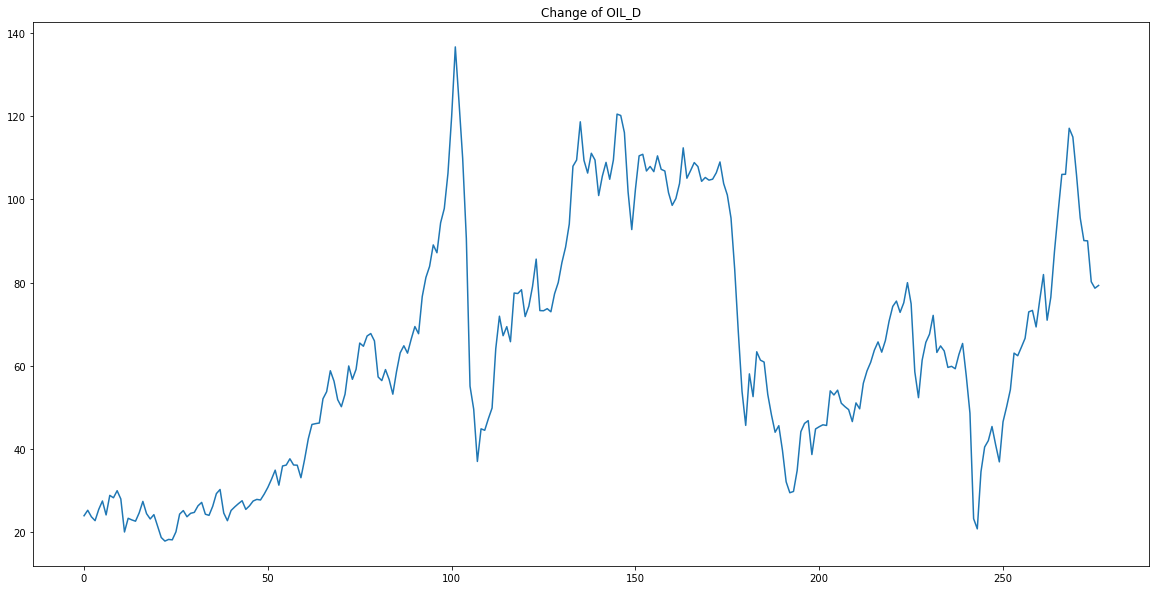

In [96]:
#시각적으로 정상 시계열이 아님을 확인하기
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,10))
fig.set_facecolor('white')
plt.plot(dfX_default.index, dfX_default['OIL_D'], linestyle='-')
plt.title("Change of OIL_D")
plt.show()

In [ ]:
!pip install statsmodels

In [87]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[1],
        index=[
            "p-value",
        ],
    )
    print(dfoutput)

In [78]:
OILD = dfX_default["OIL_D"]

In [88]:
adf_test(OILD)

p-value    0.100886
dtype: float64


In [ ]:
#ADF Test의 가설 수립
#귀무가설 (H0: 단위근(unit root)이 존재한다. 즉, 정상 시계열이 아니다) <- p-value>0.05, 귀무가설을 기각 할 수 없음
#대립가설 (H1: 단위근이 없다. 즉, 정상 시계열이다.) 

In [99]:
#OILD 로그변환
OILD_ln = np.log(OILD)

In [93]:
adf_test(OILD_ln)
#로그변환을 통해도 정상성을 확보하지 못함

p-value    0.138438
dtype: float64


In [97]:
#OILD로그차분
OILD_ln=OILD_ln.shift(1)

In [108]:
dfX_ln = np.log(dfX_default)

In [110]:
dfX_ln_diff = dfX_ln.diff(1).dropna()

In [111]:
dfX_ln_diff
#전체 276rows, 첫번째 열 삭제된 2000년 2월부터의 데이터셋임을 의미

OIL_D     OIL_B      BEAN      GOLD     NIKEL      ZINC      CORN  \
1    0.053606  0.075805 -0.013376  0.030226  0.115912 -0.045909 -0.022990   
2   -0.064090 -0.185633  0.084598 -0.045940  0.034750  0.033905  0.093194   
3   -0.039997 -0.029024 -0.035451 -0.020014 -0.008898  0.048428 -0.053302   
4    0.112749  0.214313 -0.017242 -0.005315 -0.102386 -0.036200  0.005571   
5    0.075842  0.075927 -0.080445  0.062055 -0.092125  0.018154 -0.182322   
..        ...       ...       ...       ...       ...       ...       ...   
272 -0.058730 -0.105233 -0.099481 -0.029910 -0.014693 -0.158372  0.005550   
273 -0.000666  0.079301  0.030489 -0.016429  0.032449 -0.097037  0.020454   
274 -0.115606 -0.074553  0.043462  0.079387  0.214286  0.108909 -0.043598   
275 -0.019513 -0.018540  0.033295  0.030894  0.105561 -0.015529  0.024619   
276  0.008356  0.004579  0.012266  0.055627  0.008894  0.129583  0.001841   

        WHEAT      COPP      ALMN  ...    Energy    Employ  CLI_OECD  \
1   -0.036765 -0.076000 -0.096380  ... -0.062319  0.002498  0.000295   
2    0.059910  0.021569 -0.029708  ...  0.032196  0.005263  0.000168   
3   -0.079328 -0.004045 -0.042175  ... -0.124807  0.001717 -0.000203   
4    0.125891  0.009796 -0.011000  ...  0.019144  0.006032 -0.000328   
5   -0.057105  0.016492  0.075218  ... -0.067842  0.002554 -0.000332   
..        ...       ...       ...  ...       ...       ...       ...   
272  0.130204 -0.020994 -0.094899  ... -0.133316 -0.000568 -0.002711   
273 -0.043527 -0.021178  0.028367  ...  0.021233  0.000284 -0.001697   
274 -0.134139  0.089589  0.099025  ...  0.029905 -0.000391 -0.000874   
275  0.026225  0.016635 -0.040860  ...  0.200463 -0.001421 -0.000099   
276 -0.039600  0.095147  0.106292  ... -0.046160 -0.000925  0.000533   

       Sprate   EFFR_US    KRWUSD    KRWJPY    KRWEUR    JPYUSD    USDEUR  
1    0.024384  0.372341 -0.002009 -0.041413 -0.032045  0.039396 -0.029934  
2    0.090864 -0.001729 -0.010339  0.016527 -0.029817 -0.026841 -0.019498  
3    0.085258  0.065295 -0.006673  0.004645 -0.027000 -0.011321 -0.020308  
4    0.008741 -0.019641  0.009194 -0.015784 -0.030772  0.025017 -0.040025  
5    0.039574  0.121266 -0.001144  0.015955  0.042510 -0.017173  0.043719  
..        ...       ...       ...       ...       ...       ...       ...  
272  0.096571  0.101921  0.053998 -0.002022  0.031393  0.055921 -0.022547  
273  0.002532  0.177140  0.024889 -0.003954  0.019944  0.029012 -0.005146  
274 -0.066439  0.198159 -0.044841 -0.013345 -0.011844 -0.031637  0.033553  
275 -0.020225  0.085922 -0.051043  0.002725 -0.012438 -0.053701  0.038104  
276 -0.053642  0.056557 -0.038511 -0.002464 -0.021199 -0.036055  0.017384  

[276 rows x 48 columns]

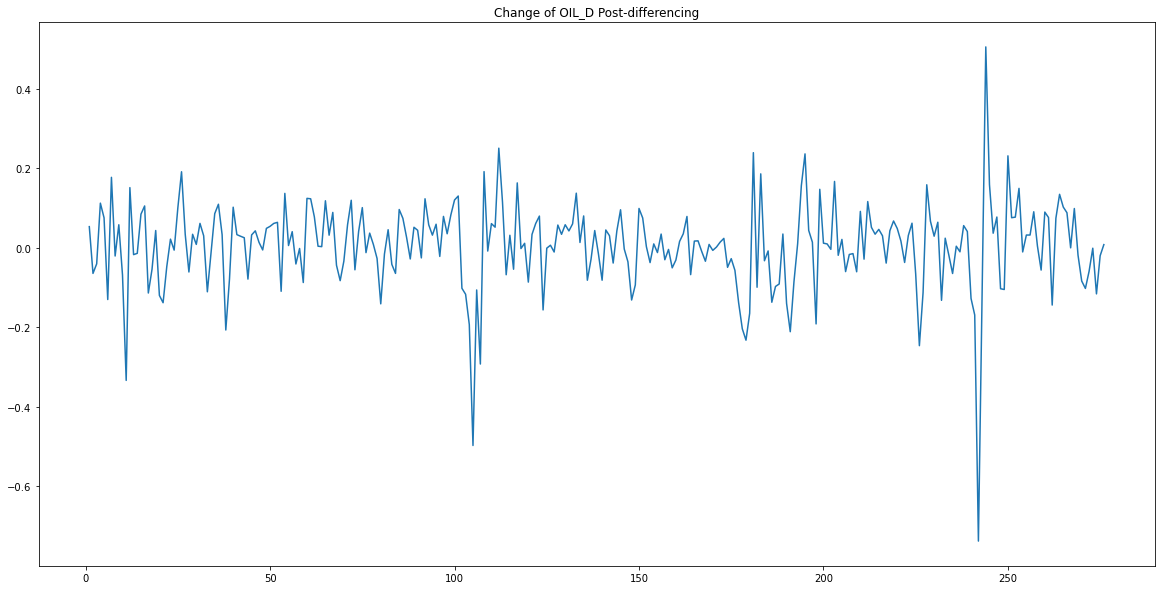

In [115]:
#로그 차분 실행한 데이터셋
fig= plt.figure(figsize=(20,10))
fig.set_facecolor('white')
plt.plot(dfX_ln_diff.index, dfX_ln_diff['OIL_D'], linestyle='-')
plt.title("Change of OIL_D Post-differencing")
plt.show()

In [113]:
OILD_ln_diff=dfX_ln_diff['OIL_D']

In [114]:
adf_test(OILD_ln_diff)
#유의성 만족

p-value    2.135726e-17
dtype: float64


In [ ]:
#ADF Test의 가설 수립
#귀무가설 (H0: 단위근(unit root)이 존재한다. 즉, 정상 시계열이 아니다) 
#대립가설 (H1: 단위근이 없다. 즉, 정상 시계열이다.) <- p-value<0.01

In [ ]:
#ADF검정으로는 모든 비정상성을 검정 할 수 없다. 
#추세나 계절요인을 가지는 비정상 시계열의 경우 ADF검정을 통해 시계열의 정상성을 확인할 수 있다. 
#그러나 시간에 따라 분산이 변하는 비정상 시계열의 경우 ADF검정은 통과하나, KPSS검정에서는 걸리는 경우가 있기 때문에 KPSS검정까지 실행하여 정상성 확인하였다.

In [121]:
from statsmodels.tsa.stattools import kpss 
import pandas as pd 

def kpss_test(timeseries): 
    print("Results of KPSS Test:") 
    kpsstest = kpss(timeseries, regression="c", nlags="auto") 
    kpss_output = pd.Series(
        kpsstest[1], index=["p-value"] ) 
    print(kpss_output)

In [122]:
kpss_test(OILD_ln_diff)
#KPSS검정의 경우 ADF와 반대로 귀무가설을 정상 시계열이라는 가정을 하고 검정을 진행한다. 따라서 p-value가 0.05 이상인 경우 정상 시계열이라는 결론도출

#귀무가설 (H0: 정상 시계열이다) 를 기각할 수 없음 <- p-value>0.05
#대립가설 (H1: 정상 시계열이 아니다) 

Results of KPSS Test:
p-value    0.1
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [91]:
colnames = dfX_default.columns

In [126]:
dfX_ln_diff
#로그 차분완료한 dataset

OIL_D     OIL_B      BEAN      GOLD     NIKEL      ZINC      CORN  \
1    0.053606  0.075805 -0.013376  0.030226  0.115912 -0.045909 -0.022990   
2   -0.064090 -0.185633  0.084598 -0.045940  0.034750  0.033905  0.093194   
3   -0.039997 -0.029024 -0.035451 -0.020014 -0.008898  0.048428 -0.053302   
4    0.112749  0.214313 -0.017242 -0.005315 -0.102386 -0.036200  0.005571   
5    0.075842  0.075927 -0.080445  0.062055 -0.092125  0.018154 -0.182322   
..        ...       ...       ...       ...       ...       ...       ...   
272 -0.058730 -0.105233 -0.099481 -0.029910 -0.014693 -0.158372  0.005550   
273 -0.000666  0.079301  0.030489 -0.016429  0.032449 -0.097037  0.020454   
274 -0.115606 -0.074553  0.043462  0.079387  0.214286  0.108909 -0.043598   
275 -0.019513 -0.018540  0.033295  0.030894  0.105561 -0.015529  0.024619   
276  0.008356  0.004579  0.012266  0.055627  0.008894  0.129583  0.001841   

        WHEAT      COPP      ALMN  ...    Energy    Employ  CLI_OECD  \
1   -0.036765 -0.076000 -0.096380  ... -0.062319  0.002498  0.000295   
2    0.059910  0.021569 -0.029708  ...  0.032196  0.005263  0.000168   
3   -0.079328 -0.004045 -0.042175  ... -0.124807  0.001717 -0.000203   
4    0.125891  0.009796 -0.011000  ...  0.019144  0.006032 -0.000328   
5   -0.057105  0.016492  0.075218  ... -0.067842  0.002554 -0.000332   
..        ...       ...       ...  ...       ...       ...       ...   
272  0.130204 -0.020994 -0.094899  ... -0.133316 -0.000568 -0.002711   
273 -0.043527 -0.021178  0.028367  ...  0.021233  0.000284 -0.001697   
274 -0.134139  0.089589  0.099025  ...  0.029905 -0.000391 -0.000874   
275  0.026225  0.016635 -0.040860  ...  0.200463 -0.001421 -0.000099   
276 -0.039600  0.095147  0.106292  ... -0.046160 -0.000925  0.000533   

       Sprate   EFFR_US    KRWUSD    KRWJPY    KRWEUR    JPYUSD    USDEUR  
1    0.024384  0.372341 -0.002009 -0.041413 -0.032045  0.039396 -0.029934  
2    0.090864 -0.001729 -0.010339  0.016527 -0.029817 -0.026841 -0.019498  
3    0.085258  0.065295 -0.006673  0.004645 -0.027000 -0.011321 -0.020308  
4    0.008741 -0.019641  0.009194 -0.015784 -0.030772  0.025017 -0.040025  
5    0.039574  0.121266 -0.001144  0.015955  0.042510 -0.017173  0.043719  
..        ...       ...       ...       ...       ...       ...       ...  
272  0.096571  0.101921  0.053998 -0.002022  0.031393  0.055921 -0.022547  
273  0.002532  0.177140  0.024889 -0.003954  0.019944  0.029012 -0.005146  
274 -0.066439  0.198159 -0.044841 -0.013345 -0.011844 -0.031637  0.033553  
275 -0.020225  0.085922 -0.051043  0.002725 -0.012438 -0.053701  0.038104  
276 -0.053642  0.056557 -0.038511 -0.002464 -0.021199 -0.036055  0.017384  

[276 rows x 48 columns]

In [178]:
dfy[1:278]

sum  ln_amount    ln_diff
1     24699694  17.022301  -0.231936
2     28641714  17.170375  14.807333
3     26866572  17.106393  -6.398135
4     27920111  17.144858   3.846442
5     28428451  17.162901   1.804319
..         ...        ...        ...
272  118189137  18.587797  -3.691553
273  111595277  18.530389  -5.740747
274  110619510  18.521607  -0.878225
275  114471728  18.555838   3.423140
276  105280375  18.472138  -8.370085

[276 rows x 3 columns]

In [127]:
#multi-step forecasting하기
#direct method

#train, valid data set split
OILD_ln_diff =dfX_ln_diff['OIL_D']


In [129]:
train = OILD_ln_diff[0:194]

In [161]:
train = train.reset_index()

In [133]:
valid = OILD_ln_diff[194:]

In [139]:
valid=valid.reset_index()

In [147]:
train

index     OIL_D
0        1  0.053606
1        2 -0.064090
2        3 -0.039997
3        4  0.112749
4        5  0.075842
..     ...       ...
189    190 -0.139532
190    191 -0.210805
191    192 -0.085400
192    193  0.010454
193    194  0.156496

[194 rows x 2 columns]

In [149]:
valid

index     OIL_D
0     195  0.236706
1     196  0.044068
2     197  0.014410
3     198 -0.191201
4     199  0.147555
..    ...       ...
77    272 -0.058730
78    273 -0.000666
79    274 -0.115606
80    275 -0.019513
81    276  0.008356

[82 rows x 2 columns]

In [144]:
#multi-step forecasting하기
#direct method

from sklearn.linear_model import LinearRegression
lag=3 
p=np.zeros(len(valid))
for h in range(len(valid)):
    x=list()
    y=list()
    for t in range(lag, len(train)-h):
        x.append(train['OIL_D'].iloc[t-lag:t].values)
        y.append(train['OIL_D'].iloc[t+h])
    model=LinearRegression()
    model.fit(x,y)
    
    x_=train['OIL_D'].iloc[-lag:].values
    p[h]=model.predict([x_])

In [148]:
p[h]

-0.003341703780653356

In [167]:
lag = 3
p = np.zeros(len(valid))
x = list()
y = list()
for h in range(len(valid)):
    for t in range(lag, len(train)-h):
        x_ = np.zeros(lag+1)
        x_[:-1] = train['OIL_D'].iloc[t-lag:t].values
        x_[-1] = h
        x.append(x_)
        y.append(train['OIL_D'].iloc[t+h])

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [173]:
x_ = np.zeros(lag+1)
x_[:-1] = train['OIL_D'].iloc[-lag:].values
for h in range(len(valid)):
    x_[-1] = h
    p[h] = model.predict([x_])

In [174]:
p[h]

0.002753114815862375

In [171]:
valid

index     OIL_D
0     195  0.236706
1     196  0.044068
2     197  0.014410
3     198 -0.191201
4     199  0.147555
..    ...       ...
77    272 -0.058730
78    273 -0.000666
79    274 -0.115606
80    275 -0.019513
81    276  0.008356

[82 rows x 2 columns]

In [179]:
df_all = pd.concat([dfX_ln_diff, dfy], axis=1) #scaled기준

In [216]:
df_all_diff = df_all[1:277]

In [217]:
df_all_diff

OIL_D     OIL_B      BEAN      GOLD     NIKEL      ZINC      CORN  \
1    0.053606  0.075805 -0.013376  0.030226  0.115912 -0.045909 -0.022990   
2   -0.064090 -0.185633  0.084598 -0.045940  0.034750  0.033905  0.093194   
3   -0.039997 -0.029024 -0.035451 -0.020014 -0.008898  0.048428 -0.053302   
4    0.112749  0.214313 -0.017242 -0.005315 -0.102386 -0.036200  0.005571   
5    0.075842  0.075927 -0.080445  0.062055 -0.092125  0.018154 -0.182322   
..        ...       ...       ...       ...       ...       ...       ...   
272 -0.058730 -0.105233 -0.099481 -0.029910 -0.014693 -0.158372  0.005550   
273 -0.000666  0.079301  0.030489 -0.016429  0.032449 -0.097037  0.020454   
274 -0.115606 -0.074553  0.043462  0.079387  0.214286  0.108909 -0.043598   
275 -0.019513 -0.018540  0.033295  0.030894  0.105561 -0.015529  0.024619   
276  0.008356  0.004579  0.012266  0.055627  0.008894  0.129583  0.001841   

        WHEAT      COPP      ALMN  ...    Sprate   EFFR_US    KRWUSD  \
1   -0.036765 -0.076000 -0.096380  ...  0.024384  0.372341 -0.002009   
2    0.059910  0.021569 -0.029708  ...  0.090864 -0.001729 -0.010339   
3   -0.079328 -0.004045 -0.042175  ...  0.085258  0.065295 -0.006673   
4    0.125891  0.009796 -0.011000  ...  0.008741 -0.019641  0.009194   
5   -0.057105  0.016492  0.075218  ...  0.039574  0.121266 -0.001144   
..        ...       ...       ...  ...       ...       ...       ...   
272  0.130204 -0.020994 -0.094899  ...  0.096571  0.101921  0.053998   
273 -0.043527 -0.021178  0.028367  ...  0.002532  0.177140  0.024889   
274 -0.134139  0.089589  0.099025  ... -0.066439  0.198159 -0.044841   
275  0.026225  0.016635 -0.040860  ... -0.020225  0.085922 -0.051043   
276 -0.039600  0.095147  0.106292  ... -0.053642  0.056557 -0.038511   

       KRWJPY    KRWEUR    JPYUSD    USDEUR        sum  ln_amount    ln_diff  
1   -0.041413 -0.032045  0.039396 -0.029934   24699694  17.022301  -0.231936  
2    0.016527 -0.029817 -0.026841 -0.019498   28641714  17.170375  14.807333  
3    0.004645 -0.027000 -0.011321 -0.020308   26866572  17.106393  -6.398135  
4   -0.015784 -0.030772  0.025017 -0.040025   27920111  17.144858   3.846442  
5    0.015955  0.042510 -0.017173  0.043719   28428451  17.162901   1.804319  
..        ...       ...       ...       ...        ...        ...        ...  
272 -0.002022  0.031393  0.055921 -0.022547  118189137  18.587797  -3.691553  
273 -0.003954  0.019944  0.029012 -0.005146  111595277  18.530389  -5.740747  
274 -0.013345 -0.011844 -0.031637  0.033553  110619510  18.521607  -0.878225  
275  0.002725 -0.012438 -0.053701  0.038104  114471728  18.555838   3.423140  
276 -0.002464 -0.021199 -0.036055  0.017384  105280375  18.472138  -8.370085  

[276 rows x 51 columns]

In [218]:
df_all_diff = df_all_diff.drop(['sum', 'ln_amount'], axis=1)

In [219]:
df_all_diff

OIL_D     OIL_B      BEAN      GOLD     NIKEL      ZINC      CORN  \
1    0.053606  0.075805 -0.013376  0.030226  0.115912 -0.045909 -0.022990   
2   -0.064090 -0.185633  0.084598 -0.045940  0.034750  0.033905  0.093194   
3   -0.039997 -0.029024 -0.035451 -0.020014 -0.008898  0.048428 -0.053302   
4    0.112749  0.214313 -0.017242 -0.005315 -0.102386 -0.036200  0.005571   
5    0.075842  0.075927 -0.080445  0.062055 -0.092125  0.018154 -0.182322   
..        ...       ...       ...       ...       ...       ...       ...   
272 -0.058730 -0.105233 -0.099481 -0.029910 -0.014693 -0.158372  0.005550   
273 -0.000666  0.079301  0.030489 -0.016429  0.032449 -0.097037  0.020454   
274 -0.115606 -0.074553  0.043462  0.079387  0.214286  0.108909 -0.043598   
275 -0.019513 -0.018540  0.033295  0.030894  0.105561 -0.015529  0.024619   
276  0.008356  0.004579  0.012266  0.055627  0.008894  0.129583  0.001841   

        WHEAT      COPP      ALMN  ...    Employ  CLI_OECD    Sprate  \
1   -0.036765 -0.076000 -0.096380  ...  0.002498  0.000295  0.024384   
2    0.059910  0.021569 -0.029708  ...  0.005263  0.000168  0.090864   
3   -0.079328 -0.004045 -0.042175  ...  0.001717 -0.000203  0.085258   
4    0.125891  0.009796 -0.011000  ...  0.006032 -0.000328  0.008741   
5   -0.057105  0.016492  0.075218  ...  0.002554 -0.000332  0.039574   
..        ...       ...       ...  ...       ...       ...       ...   
272  0.130204 -0.020994 -0.094899  ... -0.000568 -0.002711  0.096571   
273 -0.043527 -0.021178  0.028367  ...  0.000284 -0.001697  0.002532   
274 -0.134139  0.089589  0.099025  ... -0.000391 -0.000874 -0.066439   
275  0.026225  0.016635 -0.040860  ... -0.001421 -0.000099 -0.020225   
276 -0.039600  0.095147  0.106292  ... -0.000925  0.000533 -0.053642   

      EFFR_US    KRWUSD    KRWJPY    KRWEUR    JPYUSD    USDEUR    ln_diff  
1    0.372341 -0.002009 -0.041413 -0.032045  0.039396 -0.029934  -0.231936  
2   -0.001729 -0.010339  0.016527 -0.029817 -0.026841 -0.019498  14.807333  
3    0.065295 -0.006673  0.004645 -0.027000 -0.011321 -0.020308  -6.398135  
4   -0.019641  0.009194 -0.015784 -0.030772  0.025017 -0.040025   3.846442  
5    0.121266 -0.001144  0.015955  0.042510 -0.017173  0.043719   1.804319  
..        ...       ...       ...       ...       ...       ...        ...  
272  0.101921  0.053998 -0.002022  0.031393  0.055921 -0.022547  -3.691553  
273  0.177140  0.024889 -0.003954  0.019944  0.029012 -0.005146  -5.740747  
274  0.198159 -0.044841 -0.013345 -0.011844 -0.031637  0.033553  -0.878225  
275  0.085922 -0.051043  0.002725 -0.012438 -0.053701  0.038104   3.423140  
276  0.056557 -0.038511 -0.002464 -0.021199 -0.036055  0.017384  -8.370085  

[276 rows x 49 columns]

In [220]:
colnames = df_all_diff.columns
colnames

Index(['OIL_D', 'OIL_B', 'BEAN', 'GOLD', 'NIKEL', 'ZINC', 'CORN', 'WHEAT',
       'COPP', 'ALMN', 'COTT', 'KOSPI', 'DJONES', 'NASDAQ', 'ESTOXX', 'DAX',
       'NIKKEI', 'STI', 'HSI', 'SHCOMP', 'OIL_W', 'EX_INDEX_P', 'IM_INDEX_P',
       'PPI_US', 'PPI_KR', 'PPI_JP', 'IIP_JP', 'IIP_RU', 'IIP_US', 'VIX',
       'IIP', 'OPER_IDX', 'SHIP_IDX', 'STOCK_IDX', 'PANTIV_IDF', 'CLI', 'CCI',
       'LCI', 'Energy', 'Employ', 'CLI_OECD', 'Sprate', 'EFFR_US', 'KRWUSD',
       'KRWJPY', 'KRWEUR', 'JPYUSD', 'USDEUR', 'ln_diff'],
      dtype='object')

In [221]:
for i in colnames:
    df_all_diff[i+"(t-4)"] = df_all_diff[i]

In [222]:
for i in colnames:
    df_all_diff[i+"(t-3)"] = df_all_diff[i].shift(1)

In [223]:
for i in colnames:
    df_all_diff[i+"(t-2)"] = df_all_diff[i].shift(2)

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_17668/3530734352.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all_diff[i+"(t-2)"] = df_all_diff[i].shift(2)


In [224]:
for i in colnames:
    df_all_diff[i+"(t-1)"] = df_all_diff[i].shift(3)

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_17668/3858914805.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all_diff[i+"(t-1)"] = df_all_diff[i].shift(3)


In [225]:
for i in colnames:
    df_all_diff[i+"(t=0)"] = df_all_diff[i].shift(4)

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_17668/993719465.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all_diff[i+"(t=0)"] = df_all_diff[i].shift(4)


In [226]:
df_all_diff = df_all_diff.iloc[:,49:]

In [227]:
df_all_diff

OIL_D(t-4)  OIL_B(t-4)  BEAN(t-4)  GOLD(t-4)  NIKEL(t-4)  ZINC(t-4)  \
1      0.053606    0.075805  -0.013376   0.030226    0.115912  -0.045909   
2     -0.064090   -0.185633   0.084598  -0.045940    0.034750   0.033905   
3     -0.039997   -0.029024  -0.035451  -0.020014   -0.008898   0.048428   
4      0.112749    0.214313  -0.017242  -0.005315   -0.102386  -0.036200   
5      0.075842    0.075927  -0.080445   0.062055   -0.092125   0.018154   
..          ...         ...        ...        ...         ...        ...   
272   -0.058730   -0.105233  -0.099481  -0.029910   -0.014693  -0.158372   
273   -0.000666    0.079301   0.030489  -0.016429    0.032449  -0.097037   
274   -0.115606   -0.074553   0.043462   0.079387    0.214286   0.108909   
275   -0.019513   -0.018540   0.033295   0.030894    0.105561  -0.015529   
276    0.008356    0.004579   0.012266   0.055627    0.008894   0.129583   

     CORN(t-4)  WHEAT(t-4)  COPP(t-4)  ALMN(t-4)  ...  Employ(t=0)  \
1    -0.022990   -0.036765  -0.076000  -0.096380  ...          NaN   
2     0.093194    0.059910   0.021569  -0.029708  ...          NaN   
3    -0.053302   -0.079328  -0.004045  -0.042175  ...          NaN   
4     0.005571    0.125891   0.009796  -0.011000  ...          NaN   
5    -0.182322   -0.057105   0.016492   0.075218  ...     0.002498   
..         ...         ...        ...        ...  ...          ...   
272   0.005550    0.130204  -0.020994  -0.094899  ...     0.003734   
273   0.020454   -0.043527  -0.021178   0.028367  ...    -0.001314   
274  -0.043598   -0.134139   0.089589   0.099025  ...     0.000782   
275   0.024619    0.026225   0.016635  -0.040860  ...     0.000959   
276   0.001841   -0.039600   0.095147   0.106292  ...    -0.000568   

     CLI_OECD(t=0)  Sprate(t=0)  EFFR_US(t=0)  KRWUSD(t=0)  KRWJPY(t=0)  \
1              NaN          NaN           NaN          NaN          NaN   
2              NaN          NaN           NaN          NaN          NaN   
3              NaN          NaN           NaN          NaN          NaN   
4              NaN          NaN           NaN          NaN          NaN   
5         0.000295     0.024384      0.372341    -0.002009    -0.041413   
..             ...          ...           ...          ...          ...   
272      -0.001903     0.205967      0.832344     0.030008     0.008263   
273      -0.002956     0.081748      0.447868     0.005865    -0.035267   
274      -0.003352     0.084784      0.331949     0.023253     0.004813   
275      -0.003130    -0.157925      0.342369     0.008409     0.019927   
276      -0.002711     0.096571      0.101921     0.053998    -0.002022   

     KRWEUR(t=0)  JPYUSD(t=0)  USDEUR(t=0)  ln_diff(t=0)  
1            NaN          NaN          NaN           NaN  
2            NaN          NaN          NaN           NaN  
3            NaN          NaN          NaN           NaN  
4            NaN          NaN          NaN           NaN  
5      -0.032045     0.039396    -0.029934     -0.231936  
..           ...          ...          ...           ...  
272     0.006239     0.021665    -0.023834      5.523044  
273     0.004853     0.041088    -0.000965     -5.714799  
274    -0.011969     0.018449    -0.035297      6.307705  
275     0.001215    -0.011487    -0.007097     -2.311688  
276     0.031393     0.055921    -0.022547     -3.691553  

[276 rows x 245 columns]

In [230]:
df_all_diff = df_all_diff[4:]

In [231]:
df_all_diff

OIL_D(t-4)  OIL_B(t-4)  BEAN(t-4)  GOLD(t-4)  NIKEL(t-4)  ZINC(t-4)  \
5      0.075842    0.075927  -0.080445   0.062055   -0.092125   0.018154   
6     -0.129801   -0.208327  -0.068245  -0.043305   -0.060542   0.012645   
7      0.177691    0.315984   0.103734   0.002162    0.105361   0.029878   
8     -0.020295   -0.197808  -0.008627  -0.013041   -0.014522  -0.005905   
9      0.058356    0.068527  -0.064742  -0.033744   -0.149286  -0.094422   
..          ...         ...        ...        ...         ...        ...   
272   -0.058730   -0.105233  -0.099481  -0.029910   -0.014693  -0.158372   
273   -0.000666    0.079301   0.030489  -0.016429    0.032449  -0.097037   
274   -0.115606   -0.074553   0.043462   0.079387    0.214286   0.108909   
275   -0.019513   -0.018540   0.033295   0.030894    0.105561  -0.015529   
276    0.008356    0.004579   0.012266   0.055627    0.008894   0.129583   

     CORN(t-4)  WHEAT(t-4)  COPP(t-4)  ALMN(t-4)  ...  Employ(t=0)  \
5    -0.182322   -0.057105   0.016492   0.075218  ...     0.002498   
6    -0.039434   -0.052409   0.047366  -0.007886  ...     0.005263   
7     0.019231    0.018109   0.019180   0.012684  ...     0.001717   
8     0.073427    0.055273   0.042362   0.008104  ...     0.006032   
9     0.040873   -0.039447  -0.071815  -0.067423  ...     0.002554   
..         ...         ...        ...        ...  ...          ...   
272   0.005550    0.130204  -0.020994  -0.094899  ...     0.003734   
273   0.020454   -0.043527  -0.021178   0.028367  ...    -0.001314   
274  -0.043598   -0.134139   0.089589   0.099025  ...     0.000782   
275   0.024619    0.026225   0.016635  -0.040860  ...     0.000959   
276   0.001841   -0.039600   0.095147   0.106292  ...    -0.000568   

     CLI_OECD(t=0)  Sprate(t=0)  EFFR_US(t=0)  KRWUSD(t=0)  KRWJPY(t=0)  \
5         0.000295     0.024384      0.372341    -0.002009    -0.041413   
6         0.000168     0.090864     -0.001729    -0.010339     0.016527   
7        -0.000203     0.085258      0.065295    -0.006673     0.004645   
8        -0.000328     0.008741     -0.019641     0.009194    -0.015784   
9        -0.000332     0.039574      0.121266    -0.001144     0.015955   
..             ...          ...           ...          ...          ...   
272      -0.001903     0.205967      0.832344     0.030008     0.008263   
273      -0.002956     0.081748      0.447868     0.005865    -0.035267   
274      -0.003352     0.084784      0.331949     0.023253     0.004813   
275      -0.003130    -0.157925      0.342369     0.008409     0.019927   
276      -0.002711     0.096571      0.101921     0.053998    -0.002022   

     KRWEUR(t=0)  JPYUSD(t=0)  USDEUR(t=0)  ln_diff(t=0)  
5      -0.032045     0.039396    -0.029934     -0.231936  
6      -0.029817    -0.026841    -0.019498     14.807333  
7      -0.027000    -0.011321    -0.020308     -6.398135  
8      -0.030772     0.025017    -0.040025      3.846442  
9       0.042510    -0.017173     0.043719      1.804319  
..           ...          ...          ...           ...  
272     0.006239     0.021665    -0.023834      5.523044  
273     0.004853     0.041088    -0.000965     -5.714799  
274    -0.011969     0.018449    -0.035297      6.307705  
275     0.001215    -0.011487    -0.007097     -2.311688  
276     0.031393     0.055921    -0.022547     -3.691553  

[272 rows x 245 columns]

In [232]:
df_all_diff.to_csv('df_all_diff.csv')

In [233]:
#차분후 lag까지 더한 라이브러리
import pickle
with open ('df_all_diff.pickle', 'wb') as pickle_filename:
    pickle.dump(df_all_diff, pickle_filename)

OIL_D(t-4)  OIL_B(t-4)  BEAN(t-4)  GOLD(t-4)  NIKEL(t-4)  ZINC(t-4)  \
5      0.075842    0.075927  -0.080445   0.062055   -0.092125   0.018154   
6     -0.129801   -0.208327  -0.068245  -0.043305   -0.060542   0.012645   
7      0.177691    0.315984   0.103734   0.002162    0.105361   0.029878   
8     -0.020295   -0.197808  -0.008627  -0.013041   -0.014522  -0.005905   
9      0.058356    0.068527  -0.064742  -0.033744   -0.149286  -0.094422   
..          ...         ...        ...        ...         ...        ...   
272   -0.058730   -0.105233  -0.099481  -0.029910   -0.014693  -0.158372   
273   -0.000666    0.079301   0.030489  -0.016429    0.032449  -0.097037   
274   -0.115606   -0.074553   0.043462   0.079387    0.214286   0.108909   
275   -0.019513   -0.018540   0.033295   0.030894    0.105561  -0.015529   
276    0.008356    0.004579   0.012266   0.055627    0.008894   0.129583   

     CORN(t-4)  WHEAT(t-4)  COPP(t-4)  ALMN(t-4)  ...  Energy(t=0)  \
5    -0.182322   -0.057105   0.016492   0.075218  ...    -0.062319   
6    -0.039434   -0.052409   0.047366  -0.007886  ...     0.032196   
7     0.019231    0.018109   0.019180   0.012684  ...    -0.124807   
8     0.073427    0.055273   0.042362   0.008104  ...     0.019144   
9     0.040873   -0.039447  -0.071815  -0.067423  ...    -0.067842   
..         ...         ...        ...        ...  ...          ...   
272   0.005550    0.130204  -0.020994  -0.094899  ...     0.053525   
273   0.020454   -0.043527  -0.021178   0.028367  ...    -0.055342   
274  -0.043598   -0.134139   0.089589   0.099025  ...     0.119788   
275   0.024619    0.026225   0.016635  -0.040860  ...    -0.002894   
276   0.001841   -0.039600   0.095147   0.106292  ...    -0.133316   

     Employ(t=0)  CLI_OECD(t=0)  Sprate(t=0)  EFFR_US(t=0)  KRWUSD(t=0)  \
5       0.002498       0.000295     0.024384      0.372341    -0.002009   
6       0.005263       0.000168     0.090864     -0.001729    -0.010339   
7       0.001717      -0.000203     0.085258      0.065295    -0.006673   
8       0.006032      -0.000328     0.008741     -0.019641     0.009194   
9       0.002554      -0.000332     0.039574      0.121266    -0.001144   
..           ...            ...          ...           ...          ...   
272     0.003734      -0.001903     0.205967      0.832344     0.030008   
273    -0.001314      -0.002956     0.081748      0.447868     0.005865   
274     0.000782      -0.003352     0.084784      0.331949     0.023253   
275     0.000959      -0.003130    -0.157925      0.342369     0.008409   
276    -0.000568      -0.002711     0.096571      0.101921     0.053998   

     KRWJPY(t=0)  KRWEUR(t=0)  JPYUSD(t=0)  USDEUR(t=0)  
5      -0.041413    -0.032045     0.039396    -0.029934  
6       0.016527    -0.029817    -0.026841    -0.019498  
7       0.004645    -0.027000    -0.011321    -0.020308  
8      -0.015784    -0.030772     0.025017    -0.040025  
9       0.015955     0.042510    -0.017173     0.043719  
..           ...          ...          ...          ...  
272     0.008263     0.006239     0.021665    -0.023834  
273    -0.035267     0.004853     0.041088    -0.000965  
274     0.004813    -0.011969     0.018449    -0.035297  
275     0.019927     0.001215    -0.011487    -0.007097  
276    -0.002022     0.031393     0.055921    -0.022547  

[272 rows x 244 columns]

## 전처리 완료후 모델링 - 기본 모델 Lasso

In [2]:
#기본 데이터셋 X
import pickle
dfX = pd.read_pickle("dfX_default.pickle")
dfX.head()


OIL_D  OIL_B    BEAN    GOLD    NIKEL     ZINC    CORN   WHEAT    COPP  \
0  23.97  26.92  508.00  283.50   8739.0  1118.75  220.00  256.25  1831.0   
1  25.29  29.04  501.25  292.20   9813.0  1068.55  215.00  247.00  1697.0   
2  23.72  24.12  545.50  279.08  10160.0  1105.40  236.00  262.25  1734.0   
3  22.79  23.43  526.50  273.55  10070.0  1160.25  223.75  242.25  1727.0   
4  25.51  29.03  517.50  272.10   9090.0  1119.00  225.00  274.75  1744.0   

     ALMN  ...   Energy   Employ  CLI_OECD    Sprate  EFFR_US   KRWUSD  \
0  1730.5  ...  17760.0  20792.0  100.7974  4.784286     3.99  1131.07   
1  1571.5  ...  16687.0  20844.0  100.8271  4.902381     5.79  1128.80   
2  1525.5  ...  17233.0  20954.0  100.8440  5.368696     5.78  1117.19   
3  1462.5  ...  15211.0  20990.0  100.8235  5.846500     6.17  1109.76   
4  1446.5  ...  15505.0  21117.0  100.7904  5.897826     6.05  1120.01   

    KRWJPY   KRWEUR  JPYUSD  USDEUR  
0  1074.52  1146.91  105.27  1.0139  
1  1030.93  1110.74  109.50  0.9840  
2  1048.11  1078.11  106.60  0.9650  
3  1052.99  1049.39  105.40  0.9456  
4  1036.50  1017.59  108.07  0.9085  

[5 rows x 48 columns]

In [3]:
#Standard scale된 데이터셋 X
import pickle
dfX_scaled = pd.read_pickle("dfX_scaled.pickle")
dfX_scaled.head()

OIL_D     OIL_B      BEAN      GOLD     NIKEL      ZINC      CORN  \
0 -1.342275 -1.309657 -1.359974 -1.472582 -0.943449 -1.126503 -1.091638   
1 -1.296990 -1.238007 -1.379677 -1.455909 -0.805464 -1.184781 -1.121899   
2 -1.350851 -1.404290 -1.250515 -1.481053 -0.760883 -1.142001 -0.994800   
3 -1.382757 -1.427610 -1.305974 -1.491651 -0.772446 -1.078325 -1.068941   
4 -1.289442 -1.238345 -1.332245 -1.494430 -0.898353 -1.126213 -1.061376   

      WHEAT      COPP      ALMN  ...    Energy    Employ  CLI_OECD    Sprate  \
0 -1.429193 -1.575211 -0.529093  ... -1.133193 -1.926718  0.633035 -0.309988   
1 -1.478494 -1.629184 -0.877474  ... -1.435015 -1.900901  0.659137 -0.265397   
2 -1.397215 -1.614281 -0.978263  ... -1.281432 -1.846288  0.673989 -0.089324   
3 -1.503810 -1.617100 -1.116301  ... -1.850197 -1.828414  0.655973  0.091088   
4 -1.330592 -1.610253 -1.151358  ... -1.767498 -1.765360  0.626883  0.110468   

    EFFR_US    KRWUSD    KRWJPY    KRWEUR    JPYUSD    USDEUR  
0  1.256379 -0.056832  0.023550 -1.273599 -0.196298 -1.158479  
1  2.223051 -0.078830 -0.234449 -1.496638  0.116717 -1.346563  
2  2.217680 -0.191339 -0.132765 -1.697849 -0.097880 -1.466081  
3  2.427126 -0.263341 -0.103881 -1.874949 -0.186678 -1.588115  
4  2.362681 -0.164011 -0.201482 -2.071041  0.010899 -1.821490  

[5 rows x 48 columns]

In [506]:
dfy= pd.read_pickle("dfy_default.pickle")
dfy.head()

sum  ln_amount    ln_diff
0  24757048  17.024621        NaN
1  24699694  17.022301  -0.231936
2  28641714  17.170375  14.807333
3  26866572  17.106393  -6.398135
4  27920111  17.144858   3.846442

In [5]:
df_all =pd.concat([dfX_scaled, dfy], axis=1)
df_all

OIL_D     OIL_B      BEAN      GOLD     NIKEL      ZINC      CORN  \
0   -1.342275 -1.309657 -1.359974 -1.472582 -0.943449 -1.126503 -1.091638   
1   -1.296990 -1.238007 -1.379677 -1.455909 -0.805464 -1.184781 -1.121899   
2   -1.350851 -1.404290 -1.250515 -1.481053 -0.760883 -1.142001 -0.994800   
3   -1.382757 -1.427610 -1.305974 -1.491651 -0.772446 -1.078325 -1.068941   
4   -1.289442 -1.238345 -1.332245 -1.494430 -0.898353 -1.126213 -1.061376   
..        ...       ...       ...       ...       ...       ...       ...   
272  0.926429  0.692164  1.140805  1.166659  0.633347  1.074024  1.677318   
273  0.924371  0.932464  1.264129  1.114799  0.722381  0.750417  1.762051   
274  0.587135  0.706021  1.446562  1.373468  1.388790  1.115817  1.583507   
275  0.533960  0.652283  1.591778  1.479814  1.773450  1.061254  1.683371   
276  0.556602  0.665464  1.646507  1.679781  1.807753  1.543629  1.690936   

        WHEAT      COPP      ALMN  ...    Sprate   EFFR_US    KRWUSD  \
0   -1.429193 -1.575211 -0.529093  ... -0.309988  1.256379 -0.056832   
1   -1.478494 -1.629184 -0.877474  ... -0.265397  2.223051 -0.078830   
2   -1.397215 -1.614281 -0.978263  ... -0.089324  2.217680 -0.191339   
3   -1.503810 -1.617100 -1.116301  ...  0.091088  2.427126 -0.263341   
4   -1.330592 -1.610253 -1.151358  ...  0.110468  2.362681 -0.164011   
..        ...       ...       ...  ...       ...       ...       ...   
272  2.116453  0.781874  0.400471  ... -0.234030  0.499153  2.467793   
273  1.907259  0.717026  0.536318  ... -0.229257  0.767673  2.807647   
274  1.316984  1.000988  1.041909  ... -0.350566  1.130175  2.201396   
275  1.426245  1.056572  0.827205  ... -0.385922  1.311106  1.543590   
276  1.262353  1.392896  1.404532  ... -0.476305  1.438972  1.069036   

       KRWJPY    KRWEUR    JPYUSD    USDEUR        sum  ln_amount    ln_diff  
0    0.023550 -1.273599 -0.196298 -1.158479   24757048  17.024621        NaN  
1   -0.234449 -1.496638  0.116717 -1.346563   24699694  17.022301  -0.231936  
2   -0.132765 -1.697849 -0.097880 -1.466081   28641714  17.170375  14.807333  
3   -0.103881 -1.874949 -0.186678 -1.588115   26866572  17.106393  -6.398135  
4   -0.201482 -2.071041  0.010899 -1.821490   27920111  17.144858   3.846442  
..        ...       ...       ...       ...        ...        ...        ...  
272 -0.576141  0.145790  2.594701 -1.310267  118189137  18.587797  -3.691553  
273 -0.598869  0.316846  2.906166 -1.342223  111595277  18.530389  -5.740747  
274 -0.674925  0.214854  2.566957 -1.130864  110619510  18.521607  -0.878225  
275 -0.659477  0.109038  2.015193 -0.882078  114471728  18.555838   3.423140  
276 -0.673445 -0.068309  1.661020 -0.765391  105280375  18.472138  -8.370085  

[277 rows x 51 columns]

In [62]:
#앞에서 195개 train data로 설정하기
def split_df(df):
    return df[:195], df[195:]

In [7]:
X_train = df_train[select_columns]
y_train = df_train['sum']
X_test = df_test[select_columns]
y_test= df_test['sum']
    

In [66]:
#scorer 정의하기
#이번에 사용할 scorer는 MAE와 RMSE이다.

def get_MAE(y_actual, y_pred):
    diff = y_pred - y_actual
    abs_diff = abs(diff)
    mean_error = abs_diff.mean()
    
    return mean_error


In [67]:
def get_RMSE(y_actual, y_pred):
    diff = y_pred - y_actual
    abs_diff = abs(diff)
    mean_error = abs_diff.mean()
    
    return mean_error

In [70]:
from sklearn.metrics import make_scorer
mae_scorer = make_scorer(get_MAE, greater_is_better = False)

In [10]:
df_train, df_test = split_df(df_all)

In [11]:
ml_columns = dfX.columns
X_train = df_train[ml_columns].copy()
y_train = df_train['sum']
mae_scorer = make_scorer(get_MAE, greater_is_better = False)

In [100]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

hyperparams = {'max_iter': [7000, 10000, 20000, 30000], 
               'alpha': 1/np.array([0.1, 1, 2, 3, 4, 10, 30,2000,5000, 70000])
}

lasso_grid=GridSearchCV(estimator = Lasso(), param_grid = hyperparams, 
                verbose=True, scoring=mae_scorer, cv=5, n_jobs=-1)

lasso_grid.fit(X_train, y_train)
print(lasso_grid.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'alpha': 1.4285714285714285e-05, 'max_iter': 7000}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 490990939208498.7, tolerance: 11569770164876.945
  model = cd_fast.enet_coordinate_descent(


In [105]:
lasso_model = lasso_grid.best_estimator_
ml_pred = predict_macro(lasso_model, ml_columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 490990962065540.3, tolerance: 11569770164876.945
  model = cd_fast.enet_coordinate_descent(


In [109]:
y_test=df_test['sum']
get_MAE(y_test, ml_pred)

5146049.509476706

LASSO의 MAE: 5146049

## Tree Model을 사용한 변수 선택 (target: sum, scoring: MAE)

In [5]:
import numpy as np 
import pandas as pd



from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression                                 #basic linear
from sklearn.linear_model import Ridge, Lasso, ElasticNet                         #Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor     #Random Forest, Gradient Boosting
from xgboost import XGBRegressor                                                  #XGBoost
from lightgbm import LGBMRegressor, LGBMClassifier                                                #LightGBM

In [6]:
dfy_sum = dfy['sum']

In [7]:
X_train, X_test, y_train, y_test, = train_test_split(dfX_scaled,dfy_sum,train_size=0.7, test_size=0.3)

In [8]:
## R2 scoring
ln_model = LinearRegression()
ln_lasso = Lasso()
ln_Ridge = Ridge()
ln_Elastic = ElasticNet()
ln_Random = RandomForestRegressor()
ln_XG = XGBRegressor()
ln_GBM = GradientBoostingRegressor()
ln_lgb = LGBMRegressor()


models = [
    ln_model,
    ln_lasso,
    ln_Ridge,
    ln_Elastic,
    ln_Random,
    ln_XG,
    ln_GBM,
    ln_lgb
]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)           # K-Fold 사용
results = dict()
for alg in models:
    alg.fit(X_train, y_train)    
    score = cross_val_score(alg, X_train, y_train.values.ravel(), cv=k_fold, scoring='r2')
    results[alg.__class__.__name__] = np.mean(score)*100

C:\Users\TaegunKim\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.982e+14, tolerance: 1.355e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\TaegunKim\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.767e+14, tolerance: 1.250e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\TaegunKim\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

In [9]:
results

{'LinearRegression': 97.45930438115025,
 'Lasso': 97.5832098404999,
 'Ridge': 97.80274211690794,
 'ElasticNet': 97.22145952262764,
 'RandomForestRegressor': 97.47054404774417,
 'XGBRegressor': 96.41858056769115,
 'GradientBoostingRegressor': 97.3017029941559,
 'LGBMRegressor': 97.41587751103026}

In [16]:
#MAE scoring
ln_model = LinearRegression()
ln_lasso = Lasso()
ln_Ridge = Ridge()
ln_Elastic = ElasticNet()
ln_Random = RandomForestRegressor()
ln_XG = XGBRegressor()
ln_GBM = GradientBoostingRegressor()
ln_lgb = LGBMRegressor()

models = [
    ln_model,
    ln_lasso,
    ln_Ridge,
    ln_Elastic,
    ln_Random,
    ln_XG,
    ln_GBM,
    ln_lgb
]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)           # K-Fold 사용
results = dict()
for alg in models:
    alg.fit(X_train, y_train)    
    score = cross_val_score(alg, X_train, y_train.values.ravel(), cv=k_fold, scoring='neg_mean_absolute_error')
    results[alg.__class__.__name__] = abs(score.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 679452352377524.4, tolerance: 13688537444553.252
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 608356760200627.8, tolerance: 12395348007365.014
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604479168434151.6, tolerance: 12813754201410.967
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

In [17]:
results

{'LinearRegression': 2902208.4741353104,
 'Lasso': 2863082.895691167,
 'Ridge': 2702091.814476406,
 'ElasticNet': 2960862.081710373,
 'RandomForestRegressor': 2908580.024581579,
 'XGBRegressor': 3118689.402368421,
 'GradientBoostingRegressor': 2900211.3375260383}

cross_val_score 관련 scoring parameter 정리  
https://scikit-learn.org/stable/modules/model_evaluation.html

In [35]:
tree_models = [
    ln_lasso,
    ln_Ridge,
    ln_Random,
    ln_XG,
    ln_GBM,
    ln_lgb
]

In [36]:
for alg in tree_models:
    try:
        print(alg.__class__.__name__)
        print(alg.feature_importances_)        
    except:
        print(alg.__class__.__name__, "X")

Lasso
Lasso X
Ridge
Ridge X
RandomForestRegressor
[1.94080503e-03 3.78624677e-03 5.12495460e-04 3.35113778e-03
 8.64661787e-04 1.59235878e-03 2.57210512e-04 5.23894935e-04
 9.16343950e-03 1.88330905e-04 1.88154114e-03 9.22566457e-03
 7.91280509e-03 1.25108099e-04 3.23800742e-04 2.77726223e-04
 3.61401641e-04 9.11738644e-04 9.54378170e-04 8.44384342e-04
 4.14050648e-03 1.01526984e-03 8.63084271e-04 4.78568215e-01
 3.37425032e-02 6.90105241e-04 2.34997171e-04 6.94399061e-03
 3.42030619e-04 6.65426324e-04 5.71410226e-02 1.94270334e-03
 2.21579561e-01 4.99435842e-02 8.45227647e-03 2.53299590e-02
 2.06398342e-02 1.60855628e-02 3.22228318e-04 1.86596191e-02
 2.30647466e-03 6.03255940e-04 2.03773775e-04 1.36582979e-03
 4.42508127e-04 7.48540009e-04 3.55728403e-04 1.67228015e-03]
XGBRegressor
[1.7916543e-03 5.3364842e-05 7.9636578e-05 1.3142967e-03 7.8794733e-04
 3.3973294e-04 5.7967027e-05 1.1191780e-04 1.5157814e-02 4.8766233e-05
 1.1512011e-04 9.0866707e-02 3.3984099e-05 4.3951786e-06 5.957

In [37]:
random_model_importance = pd.DataFrame({'Feature':X_train.columns, 'random_model':ln_Random.feature_importances_})
gbm_model_importance = pd.DataFrame({'Feature':X_train.columns, 'gbm_model':ln_GBM.feature_importances_})
xgb_model_importance = pd.DataFrame({'Feature':X_train.columns, 'xgb_model':ln_XG.feature_importances_})
lgb_model_importance = pd.DataFrame({'Feature':X_train.columns, 'lgb_model':ln_lgb.booster_.feature_importance(importance_type='gain')})

In [38]:
from functools import reduce
data_frames = [
    random_model_importance,
    gbm_model_importance,
    xgb_model_importance,
    lgb_model_importance
]
importances = reduce(lambda  left,right: pd.merge(left, right, on=['Feature']), data_frames)

In [39]:
importances.head(20)

Feature  random_model  gbm_model  xgb_model     lgb_model
0    OIL_D      0.001941   0.003037   0.001792  7.889886e+15
1    OIL_B      0.003786   0.000080   0.000053  1.079319e+16
2     BEAN      0.000512   0.000407   0.000080  2.153435e+14
3     GOLD      0.003351   0.014389   0.001314  3.098695e+15
4    NIKEL      0.000865   0.001061   0.000788  1.656381e+14
5     ZINC      0.001592   0.003984   0.000340  1.063754e+16
6     CORN      0.000257   0.000105   0.000058  7.415824e+13
7    WHEAT      0.000524   0.000426   0.000112  9.375123e+13
8     COPP      0.009163   0.019492   0.015158  5.368422e+15
9     ALMN      0.000188   0.001202   0.000049  2.511446e+13
10    COTT      0.001882   0.002693   0.000115  3.300043e+15
11   KOSPI      0.009226   0.001866   0.090867  7.899030e+16
12  DJONES      0.007913   0.000148   0.000034  1.299107e+14
13  NASDAQ      0.000125   0.000043   0.000004  6.999450e+13
14  ESTOXX      0.000324   0.000484   0.000060  6.813324e+14
15     DAX      0.000278   0.000132   0.000279  5.478378e+13
16  NIKKEI      0.000361   0.000027   0.000021  1.353412e+14
17     STI      0.000912   0.002314   0.000083  2.860992e+15
18     HSI      0.000954   0.000362   0.000154  1.088864e+14
19  SHCOMP      0.000844   0.000337   0.000068  4.905491e+13

>LightGBM의 경우 Feature Importance가 자료를 나눌때 해당 노드(변수)가 몇번 사용되었는지 나타내는 split을 사용한다. 따라서 총합이 1이 되는 소수의 형태로 나타나지 않는다.

In [40]:
importances["sum"] = importances["random_model"] + importances["gbm_model"] + importances["xgb_model"]

In [41]:
importances["sum"] = importances["sum"]/3

In [42]:
importance_rank = importances.sort_values(by='sum', ascending = False)


In [53]:
importance_rank

Feature  random_model  gbm_model  xgb_model     lgb_model       sum
23      PPI_US      0.478568   0.575324   0.210737  3.656012e+17  0.421543
32    SHIP_IDX      0.221580   0.223343   0.479151  9.551555e+16  0.308025
11       KOSPI      0.009226   0.001866   0.090867  7.899030e+16  0.033986
27      IIP_RU      0.006944   0.002499   0.086173  1.199758e+16  0.031872
30         IIP      0.057141   0.025989   0.002053  3.142632e+16  0.028394
24      PPI_KR      0.033743   0.027378   0.015800  3.971350e+16  0.025640
35         CLI      0.025330   0.002002   0.048531  3.454350e+12  0.025288
39      Employ      0.018660   0.028597   0.025296  5.238163e+15  0.024184
36         CCI      0.020640   0.020995   0.017452  7.111491e+14  0.019696
33   STOCK_IDX      0.049944   0.002822   0.000550  2.521202e+16  0.017772
8         COPP      0.009163   0.019492   0.015158  5.368422e+15  0.014604
37         LCI      0.016086   0.018932   0.000000  5.418660e+13  0.011672
3         GOLD      0.003351   0.014389   0.001314  3.098695e+15  0.006351
34  PANTIV_IDF      0.008452   0.003727   0.000385  2.967322e+14  0.004188
12      DJONES      0.007913   0.000148   0.000034  1.299107e+14  0.002698
20       OIL_W      0.004141   0.003442   0.000054  1.323044e+14  0.002545
0        OIL_D      0.001941   0.003037   0.001792  7.889886e+15  0.002257
5         ZINC      0.001592   0.003984   0.000340  1.063754e+16  0.001972
40    CLI_OECD      0.002306   0.001997   0.000586  1.359802e+15  0.001630
10        COTT      0.001882   0.002693   0.000115  3.300043e+15  0.001563
31    OPER_IDX      0.001943   0.001950   0.000172  2.674158e+14  0.001355
1        OIL_B      0.003786   0.000080   0.000053  1.079319e+16  0.001307
47      USDEUR      0.001672   0.001433   0.000284  6.549710e+12  0.001130
17         STI      0.000912   0.002314   0.000083  2.860992e+15  0.001103
21  EX_INDEX_P      0.001015   0.001939   0.000262  1.182378e+15  0.001072
4        NIKEL      0.000865   0.001061   0.000788  1.656381e+14  0.000905
43      KRWUSD      0.001366   0.000438   0.000057  1.805463e+14  0.000620
41      Sprate      0.000603   0.001220   0.000001  1.738071e+13  0.000608
22  IM_INDEX_P      0.000863   0.000781   0.000057  3.859652e+14  0.000567
29         VIX      0.000665   0.000890   0.000087  1.410018e+15  0.000547
18         HSI      0.000954   0.000362   0.000154  1.088864e+14  0.000490
9         ALMN      0.000188   0.001202   0.000049  2.511446e+13  0.000480
19      SHCOMP      0.000844   0.000337   0.000068  4.905491e+13  0.000417
44      KRWJPY      0.000443   0.000232   0.000455  6.512547e+13  0.000376
45      KRWEUR      0.000749   0.000304   0.000038  9.627915e+14  0.000364
7        WHEAT      0.000524   0.000426   0.000112  9.375123e+13  0.000354
2         BEAN      0.000512   0.000407   0.000080  2.153435e+14  0.000333
14      ESTOXX      0.000324   0.000484   0.000060  6.813324e+14  0.000289
25      PPI_JP      0.000690   0.000040   0.000032  1.421707e+15  0.000254
38      Energy      0.000322   0.000379   0.000041  1.157523e+15  0.000248
15         DAX      0.000278   0.000132   0.000279  5.478378e+13  0.000229
28      IIP_US      0.000342   0.000319   0.000017  1.496730e+15  0.000226
46      JPYUSD      0.000356   0.000276   0.000037  3.725759e+14  0.000223
26      IIP_JP      0.000235   0.000128   0.000071  1.784576e+14  0.000144
42     EFFR_US      0.000204   0.000035   0.000193  3.307889e+13  0.000144
6         CORN      0.000257   0.000105   0.000058  7.415824e+13  0.000140
16      NIKKEI      0.000361   0.000027   0.000021  1.353412e+14  0.000137
13      NASDAQ      0.000125   0.000043   0.000004  6.999450e+13  0.000057

In [54]:
#상위 20개 변수 사용하기
#각 모델별로 고른것이 아닌 RF, GBM, XGB 3가지 사용하여 3모델의 평균값을 사용
feature_selection = importance_rank[:30]

In [51]:
feature_selection = importance_rank.loc[0:20,'Feature']
feature_selection

Series([], Name: Feature, dtype: object)

In [55]:
feature_selection = feature_selection[['Feature']]

In [56]:
feature_selection

Feature
23      PPI_US
32    SHIP_IDX
11       KOSPI
27      IIP_RU
30         IIP
24      PPI_KR
35         CLI
39      Employ
36         CCI
33   STOCK_IDX
8         COPP
37         LCI
3         GOLD
34  PANTIV_IDF
12      DJONES
20       OIL_W
0        OIL_D
5         ZINC
40    CLI_OECD
10        COTT
31    OPER_IDX
1        OIL_B
47      USDEUR
17         STI
21  EX_INDEX_P
4        NIKEL
43      KRWUSD
41      Sprate
22  IM_INDEX_P
29         VIX

In [57]:
len(feature_selection)

30

In [88]:
#변수선택 저장하기
#전처리가 완료된 dfX, dfy를 pickle로 저장하기
import pickle
with open ('feature_selection_MAE.pickle', 'wb') as pickle_filename:
    pickle.dump(feature_selection, pickle_filename)

In [89]:
feature_selection_MAE = pd.read_pickle("feature_selection_MAE.pickle")

## Boruta Feature Selection (RFClassifier 기반, 41개 변수)

In [302]:
!pip install boruta

In [141]:
from boruta import BorutaPy

In [329]:
#Boruta Py는 array input만 받기때문에, df에 .values형태로 들어가야 한다.4
#Boruta는 RFclassifier를 기반으로 작동하기때문에, target이 continuous가 아닌 범주형이 들어가야 한다.
X = dfX_scaled.values

In [308]:
dfy.describe()
# 16.8부터 18.7까지 0.45씩 증가
# 16.8 <= 17.66 = 0
# 17.66 <= 18.15 = 1
# 18.15 <= 18.31 = 2 
# 18.31 <= 18.67 = 3

sum   ln_amount     ln_diff
count  2.770000e+02  277.000000  276.000000
mean   6.973715e+07   17.964370    0.524463
std    2.691496e+07    0.471014    7.062375
min    2.149420e+07   16.883294  -23.815578
25%    4.673237e+07   17.659948   -4.014735
50%    7.613324e+07   18.147996    0.367770
75%    9.030409e+07   18.318693    4.215464
max    1.275979e+08   18.664395   22.349283

In [ ]:
y =dfy[['ln_amount']]

In [311]:
y[(y>16.8) & (y<=17.66)] = 0
y[(y>17.66) & (y<=18.15)] = 1
y[(y>18.15) & (y<=18.31)] = 2
y[(y>18.31) & (y<=18.67)] = 3

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_14260/438182732.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3718: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_14260/438182732.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [319]:
y = y.values

In [320]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

In [330]:
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

In [331]:
feat_selector.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	48
Rejected: 	0


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	48
Rejected: 	0


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	48
Rejected: 	0


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	48
Rejected: 	0


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	48
Rejected: 	0


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	48
Rejected: 	0


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	48
Rejected: 	0


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	8 / 100
Confirmed: 	34
Tentative: 	14
Rejected: 	0


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	9 / 100
Confirmed: 	34
Tentative: 	12
Rejected: 	2


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	10 / 100
Confirmed: 	34
Tentative: 	12
Rejected: 	2


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	11 / 100
Confirmed: 	34
Tentative: 	12
Rejected: 	2


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	12 / 100
Confirmed: 	37
Tentative: 	9
Rejected: 	2


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	13 / 100
Confirmed: 	37
Tentative: 	9
Rejected: 	2


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	14 / 100
Confirmed: 	37
Tentative: 	9
Rejected: 	2


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	15 / 100
Confirmed: 	37
Tentative: 	9
Rejected: 	2


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	16 / 100
Confirmed: 	37
Tentative: 	9
Rejected: 	2


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	17 / 100
Confirmed: 	37
Tentative: 	9
Rejected: 	2


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	18 / 100
Confirmed: 	37
Tentative: 	9
Rejected: 	2


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	19 / 100
Confirmed: 	38
Tentative: 	8
Rejected: 	2


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	20 / 100
Confirmed: 	38
Tentative: 	8
Rejected: 	2


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	21 / 100
Confirmed: 	38
Tentative: 	7
Rejected: 	3


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	22 / 100
Confirmed: 	38
Tentative: 	7
Rejected: 	3


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	23 / 100
Confirmed: 	38
Tentative: 	7
Rejected: 	3


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	24 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	25 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	26 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	27 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	28 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	29 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	30 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	31 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	32 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	33 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	34 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	35 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	36 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	37 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	38 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	39 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	40 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	41 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	42 / 100
Confirmed: 	38
Tentative: 	6
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	43 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	44 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	45 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	46 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	47 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	48 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	49 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	50 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	51 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	52 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	53 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	54 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	55 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	56 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	57 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	58 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	59 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	60 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	61 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	62 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	63 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	64 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	65 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	66 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	67 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	68 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	69 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	70 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	71 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	72 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	73 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	74 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	75 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	76 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	77 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	78 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	79 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	80 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	81 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	82 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	83 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	84 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	85 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	86 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	87 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	88 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	89 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	90 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	91 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	92 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	93 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	94 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	95 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	96 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	97 / 100
Confirmed: 	39
Tentative: 	5
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	98 / 100
Confirmed: 	41
Tentative: 	3
Rejected: 	4


C:\ProgramData\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Iteration: 	99 / 100
Confirmed: 	41
Tentative: 	3
Rejected: 	4


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	41
Tentative: 	1
Rejected: 	4


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=187, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x219872D6640),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x219872D6640, verbose=2)

In [332]:
import pandas as pd
import numpy as np
accept = dfX.columns[feat_selector.support_].to_list()
irresolution = dfX.columns[feat_selector.support_weak_].to_list()

In [333]:
X_filtered = feat_selector.transform(X)

print('Accepted features:')
print('----------------------------')
print(list(accept))
print('----------------------------')
print(list(irresolution))

Accepted features:
----------------------------
['OIL_D', 'OIL_B', 'BEAN', 'GOLD', 'ZINC', 'CORN', 'WHEAT', 'COPP', 'ALMN', 'COTT', 'KOSPI', 'DJONES', 'NASDAQ', 'DAX', 'NIKKEI', 'STI', 'HSI', 'SHCOMP', 'OIL_W', 'EX_INDEX_P', 'IM_INDEX_P', 'PPI_US', 'PPI_KR', 'PPI_JP', 'IIP_JP', 'IIP_RU', 'IIP_US', 'IIP', 'SHIP_IDX', 'STOCK_IDX', 'PANTIV_IDF', 'CLI', 'CCI', 'LCI', 'Energy', 'Employ', 'CLI_OECD', 'Sprate', 'KRWUSD', 'KRWJPY', 'USDEUR']
----------------------------
['NIKEL']


In [336]:
len(dfX.columns)

48

In [340]:
boruta_feature = ['OIL_D', 'OIL_B', 'BEAN', 'GOLD', 'ZINC', 'CORN', 'WHEAT', 'COPP', 'ALMN', 'COTT', 'KOSPI', 'DJONES', 'NASDAQ', 'DAX', 'NIKKEI', 'STI', 'HSI', 'SHCOMP', 'OIL_W', 'EX_INDEX_P', 'IM_INDEX_P', 'PPI_US', 'PPI_KR', 'PPI_JP', 'IIP_JP', 'IIP_RU', 'IIP_US', 'IIP', 'SHIP_IDX', 'STOCK_IDX', 'PANTIV_IDF', 'CLI', 'CCI', 'LCI', 'Energy', 'Employ', 'CLI_OECD', 'Sprate', 'KRWUSD', 'KRWJPY', 'USDEUR']

In [342]:
len(boruta_feature)

41

In [343]:
#boruta_feature pickle로 저장하기
import pickle
with open ('boruta_feature.pickle', 'wb') as pickle_filename:
    pickle.dump(boruta_feature, pickle_filename)

In [345]:
boruta_feature = pd.read_pickle("boruta_feature.pickle")
boruta_feature

['OIL_D',
 'OIL_B',
 'BEAN',
 'GOLD',
 'ZINC',
 'CORN',
 'WHEAT',
 'COPP',
 'ALMN',
 'COTT',
 'KOSPI',
 'DJONES',
 'NASDAQ',
 'DAX',
 'NIKKEI',
 'STI',
 'HSI',
 'SHCOMP',
 'OIL_W',
 'EX_INDEX_P',
 'IM_INDEX_P',
 'PPI_US',
 'PPI_KR',
 'PPI_JP',
 'IIP_JP',
 'IIP_RU',
 'IIP_US',
 'IIP',
 'SHIP_IDX',
 'STOCK_IDX',
 'PANTIV_IDF',
 'CLI',
 'CCI',
 'LCI',
 'Energy',
 'Employ',
 'CLI_OECD',
 'Sprate',
 'KRWUSD',
 'KRWJPY',
 'USDEUR']

## Boruta Feature Selection, (RFRegressor 기반, target:sum, )

In [681]:
#feat_selector에 들어가는 인자는 numpy array형태로 들어가야 한다. 따라서 X_train, y_train을 np.array로 변환하는 과정 거치기
#

In [3]:
#앞에서 195개 train data로 설정하기
def split_df(df):
    return df[:195], df[195:]

In [4]:
df_train, df_test = split_df(df_all)

In [5]:
X_train = df_train.drop(["sum","ln_diff", "ln_amount"], axis=1, errors='ignore')
y_train = df_train['ln_amount']
X_test = df_test.drop(["sum","ln_diff","ln_amount"], axis=1, errors='ignore')
y_test= df_test['ln_amount']

In [6]:
X_train

OIL_D     OIL_B      BEAN      GOLD     NIKEL      ZINC      CORN  \
0   -1.342275 -1.309657 -1.359974 -1.472582 -0.943449 -1.126503 -1.091638   
1   -1.296990 -1.238007 -1.379677 -1.455909 -0.805464 -1.184781 -1.121899   
2   -1.350851 -1.404290 -1.250515 -1.481053 -0.760883 -1.142001 -0.994800   
3   -1.382757 -1.427610 -1.305974 -1.491651 -0.772446 -1.078325 -1.068941   
4   -1.289442 -1.238345 -1.332245 -1.494430 -0.898353 -1.126213 -1.061376   
..        ...       ...       ...       ...       ...       ...       ...   
190 -0.803659 -0.772278 -0.271219  0.024717 -0.927260 -0.631370 -0.214045   
191 -1.062332 -1.011226 -0.299679  0.018296 -0.938181 -0.576226 -0.251872   
192 -1.152559 -1.097410 -0.267571  0.127057 -0.963491 -0.535304 -0.171678   
193 -1.141923 -1.004805 -0.352949  0.358129 -0.975311 -0.383513 -0.283647   
194 -0.968675 -0.910848 -0.184382  0.346553 -0.980707 -0.326338 -0.295752   

        WHEAT      COPP      ALMN  ...    Energy    Employ  CLI_OECD  \
0   -1.429193 -1.575211 -0.529093  ... -1.133193 -1.926718  0.633035   
1   -1.478494 -1.629184 -0.877474  ... -1.435015 -1.900901  0.659137   
2   -1.397215 -1.614281 -0.978263  ... -1.281432 -1.846288  0.673989   
3   -1.503810 -1.617100 -1.116301  ... -1.850197 -1.828414  0.655973   
4   -1.330592 -1.610253 -1.151358  ... -1.767498 -1.765360  0.626883   
..        ...       ...       ...  ...       ...       ...       ...   
190 -0.343247 -0.460308 -1.171625  ...  0.609668  0.786572 -0.252914   
191 -0.289950 -0.417210 -1.033588  ...  1.469566  0.849625 -0.255867   
192 -0.240649 -0.471989 -0.993053  ...  1.622024  0.828773 -0.230073   
193 -0.423194 -0.417210 -0.823244  ...  0.936806  0.806928 -0.176622   
194 -0.271295 -0.346723 -1.010581  ...  0.910646  0.788558 -0.094890   

       Sprate   EFFR_US    KRWUSD    KRWJPY    KRWEUR    JPYUSD    USDEUR  
0   -0.309988  1.256379 -0.056832  0.023550 -1.273599 -0.196298 -1.158479  
1   -0.265397  2.223051 -0.078830 -0.234449 -1.496638  0.116717 -1.346563  
2   -0.089324  2.217680 -0.191339 -0.132765 -1.697849 -0.097880 -1.466081  
3    0.091088  2.427126 -0.263341 -0.103881 -1.874949 -0.186678 -1.588115  
4    0.110468  2.362681 -0.164011 -0.201482 -2.071041  0.010899 -1.821490  
..        ...       ...       ...       ...       ...       ...       ...  
190  0.200471 -0.822531  0.145704 -0.770632 -0.711467  1.079444 -0.775392  
191  0.477890 -0.761915  0.342135 -0.639472 -0.481644  1.026904 -0.692988  
192  0.762714 -0.691663  0.627333 -0.314294 -0.290917  0.754588 -0.698649  
193  0.989445 -0.685557  0.779283 -0.061503 -0.028844  0.517792 -0.566550  
194  0.520283 -0.692376  0.496896 -0.111635 -0.192562  0.374234 -0.535098  

[195 rows x 48 columns]

In [713]:
model = RandomForestRegressor(n_estimators='auto', max_depth=5, random_state=42)

# initialize Boruta
feat_selector = BorutaPy(verbose=2, estimator=model, n_estimators='auto',
                        max_iter=10)

feat_selector.fit(np.array(X_train), np.array(y_train))

print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", X_train.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              X_train.columns[i], " - Ranking: ", feat_selector.ranking_[i])

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	24
Tentative: 	15
Rejected: 	9
Iteration: 	9 / 10
Confirmed: 	24
Tentative: 	15
Rejected: 	9


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	24
Tentative: 	4
Rejected: 	9

------Support and Ranking for each feature------
Doesn't pass the test:  OIL_D  - Ranking:  2
Doesn't pass the test:  OIL_B  - Ranking:  13
Doesn't pass the test:  BEAN  - Ranking:  8
Passes the test:  GOLD  - Ranking:  1
Passes the test:  NIKEL  - Ranking:  1
Doesn't pass the test:  ZINC  - Ranking:  13
Doesn't pass the test:  CORN  - Ranking:  10
Doesn

In [714]:
accept = X_train.columns[feat_selector.support_].to_list()

보루타 알고리즘의 결과값은 각각의 변수에 대해 테스트를 통과한 변수 / 통과하지 못한 변수 / 거부된 변수로 출력된다.  
Confirmed: 	24
Tentative: 	4
Rejected: 	9  
Confirmed: GOLD, NICKEL, COPP, KOSPI, HSI, SHCOMP, PPI_US, PPI_KR, PPI_JP, IIP_JP, IIP_RU, IIP_US, VIX, IIP, SHIP_IDX, STOCK_IDX, CCI, CLI, LCI, Employ, Sprate, KRWUSD, USDEUR

In [715]:
accept

['GOLD',
 'NIKEL',
 'COPP',
 'COTT',
 'KOSPI',
 'HSI',
 'SHCOMP',
 'PPI_US',
 'PPI_KR',
 'PPI_JP',
 'IIP_JP',
 'IIP_RU',
 'IIP_US',
 'VIX',
 'IIP',
 'SHIP_IDX',
 'STOCK_IDX',
 'CLI',
 'CCI',
 'LCI',
 'Employ',
 'Sprate',
 'KRWUSD',
 'USDEUR']

In [692]:
X_boruta_filtered = feat_selector.transform(np.array(X_boruta))
X_boruta_filtered

array([[  283.5  ,  1831.   ,   128.3  , ...,    47.   ,    47.7  ,
        20792.   ],
       [  292.2  ,  1697.   ,   129.8  , ...,    47.3  ,    48.1  ,
        20844.   ],
       [  279.08 ,  1734.   ,   130.8  , ...,    47.7  ,    48.5  ,
        20954.   ],
       ...,
       [ 1768.53 ,  8227.   ,   263.157, ...,   108.9  ,   111.8  ,
        28163.   ],
       [ 1824.02 ,  8365.   ,   257.921, ...,   108.4  ,   112.4  ,
        28123.   ],
       [ 1928.36 ,  9200.   ,   260.213, ...,   108.2  ,   112.8  ,
        28097.   ]])

In [ ]:
# train the model
model.fit(X_boruta_filtered, y_train)

predictions = model.predict(X_boruta_filtered)

df_boruta = pd.DataFrame({'pred': predictions, 'observed': y_train})

print(df_boruta)

In [699]:
#Boruta에서 선택한 feature 기반 RF모델링

In [717]:
#Boruta에서 선택된 24개 변수
accept

['GOLD',
 'NIKEL',
 'COPP',
 'COTT',
 'KOSPI',
 'HSI',
 'SHCOMP',
 'PPI_US',
 'PPI_KR',
 'PPI_JP',
 'IIP_JP',
 'IIP_RU',
 'IIP_US',
 'VIX',
 'IIP',
 'SHIP_IDX',
 'STOCK_IDX',
 'CLI',
 'CCI',
 'LCI',
 'Employ',
 'Sprate',
 'KRWUSD',
 'USDEUR']

In [718]:
#모델 함수 정의하기
#모델이름, x변수를 인자로 받는 모델

def predict_macro(model, select_columns):    
    
    model=model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return y_pred

In [719]:
y_pred = predict_macro(ln_Random, accept)

In [720]:
get_MAE(y_test, y_pred)

0.10118212369119102

## 변수가 41개일때 모델 (target: ln_amount, scoring: MAE)


In [346]:
boruta_feature

['OIL_D',
 'OIL_B',
 'BEAN',
 'GOLD',
 'ZINC',
 'CORN',
 'WHEAT',
 'COPP',
 'ALMN',
 'COTT',
 'KOSPI',
 'DJONES',
 'NASDAQ',
 'DAX',
 'NIKKEI',
 'STI',
 'HSI',
 'SHCOMP',
 'OIL_W',
 'EX_INDEX_P',
 'IM_INDEX_P',
 'PPI_US',
 'PPI_KR',
 'PPI_JP',
 'IIP_JP',
 'IIP_RU',
 'IIP_US',
 'IIP',
 'SHIP_IDX',
 'STOCK_IDX',
 'PANTIV_IDF',
 'CLI',
 'CCI',
 'LCI',
 'Energy',
 'Employ',
 'CLI_OECD',
 'Sprate',
 'KRWUSD',
 'KRWJPY',
 'USDEUR']

In [347]:
dfX_11 = dfX_scaled[boruta_feature]

In [350]:
dfy_11 = dfy["ln_amount"]

In [351]:
X_train, X_test, y_train, y_test, = train_test_split(dfX_11,dfy_11,train_size=0.7, test_size=0.3)

In [358]:
#MAE scoring
ln_model = LinearRegression()
ln_lasso = Lasso()
ln_Ridge = Ridge()
ln_Elastic = ElasticNet()
ln_Random = RandomForestRegressor()
ln_XG = XGBRegressor()
ln_GBM = GradientBoostingRegressor()
ln_lgb = LGBMRegressor()

models = [
    ln_model,
    ln_lasso,
    ln_Ridge,
    ln_Elastic,
    ln_Random,
    ln_XG,
    ln_GBM,
    ln_lgb
]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)           # K-Fold 사용
results = dict()
for alg in models:
    alg.fit(X_train, y_train)    
    score = cross_val_score(alg, X_train, y_train.values.ravel(), cv=k_fold, scoring='neg_mean_absolute_error')
    results[alg.__class__.__name__] = abs(score.mean())

In [359]:
results

{'LinearRegression': 0.04489598582514747,
 'Lasso': 0.38854037268526864,
 'Ridge': 0.042397880763037354,
 'ElasticNet': 0.38854037268526864,
 'RandomForestRegressor': 0.0458701821608206,
 'XGBRegressor': 0.05976286077849109,
 'GradientBoostingRegressor': 0.04984754337855389,
 'LGBMRegressor': 0.05211022882594686}

In [361]:
sorted(results.items(), key=lambda x: x[1], reverse=False)

[('Ridge', 0.042397880763037354),
 ('LinearRegression', 0.04489598582514747),
 ('RandomForestRegressor', 0.0458701821608206),
 ('GradientBoostingRegressor', 0.04984754337855389),
 ('LGBMRegressor', 0.05211022882594686),
 ('XGBRegressor', 0.05976286077849109),
 ('Lasso', 0.38854037268526864),
 ('ElasticNet', 0.38854037268526864)]

In [362]:
#RMSE scoring
ln_model = LinearRegression()
ln_lasso = Lasso()
ln_Ridge = Ridge()
ln_Elastic = ElasticNet()
ln_Random = RandomForestRegressor()
ln_XG = XGBRegressor()
ln_GBM = GradientBoostingRegressor()
ln_lgb = LGBMRegressor()

models = [
    ln_model,
    ln_lasso,
    ln_Ridge,
    ln_Elastic,
    ln_Random,
    ln_XG,
    ln_GBM,
    ln_lgb
]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)           # K-Fold 사용
results = dict()
for alg in models:
    alg.fit(X_train, y_train)    
    score = cross_val_score(alg, X_train, y_train.values.ravel(), cv=k_fold, scoring='neg_root_mean_squared_error')
    results[alg.__class__.__name__] = abs(score.mean())

In [363]:
results

{'LinearRegression': 0.055907019436067316,
 'Lasso': 0.4594868940810112,
 'Ridge': 0.053090338643236826,
 'ElasticNet': 0.4594868940810112,
 'RandomForestRegressor': 0.058275892033641266,
 'XGBRegressor': 0.0751152784133291,
 'GradientBoostingRegressor': 0.06110561650297129,
 'LGBMRegressor': 0.06407738241611473}

In [364]:
sorted(results.items(), key=lambda x: x[1], reverse=False)

[('Ridge', 0.053090338643236826),
 ('LinearRegression', 0.055907019436067316),
 ('RandomForestRegressor', 0.058275892033641266),
 ('GradientBoostingRegressor', 0.06110561650297129),
 ('LGBMRegressor', 0.06407738241611473),
 ('XGBRegressor', 0.0751152784133291),
 ('Lasso', 0.4594868940810112),
 ('ElasticNet', 0.4594868940810112)]

In [378]:
dfX_11 = dfX_scaled[boruta_feature]

In [379]:
dfy_11 = dfy["ln_amount"]

In [394]:
def split_df(df):
    return df[:195], df[195:]

In [395]:
df_train, df_test = split_df(df_all)

In [408]:
len(df_train)

195

In [416]:
y_test = df_test["ln_amount"]

In [410]:
def predict_macro(model, select_columns):
    df_train, df_test = split_df(df)
    
    X_train = df_train[select_columns]
    y_train = df_train['ln_amount']
    X_test = df_test[select_columns]
    y_test= df_test['ln_amount']
    
    model=model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return y_pred

In [413]:
len(predict_macro(ln_Ridge, dfX_11.columns))

82

In [417]:
y_test

195    18.112392
196    18.102666
197    18.186215
198    18.122995
199    18.136039
         ...    
272    18.587797
273    18.530389
274    18.521607
275    18.555838
276    18.472138
Name: ln_amount, Length: 82, dtype: float64

In [418]:
def get_MAE(y_actual, y_pred):
    diff = y_pred - y_actual
    abs_diff = abs(diff)
    mean_error = abs_diff.mean()
    
    return mean_error

In [419]:
get_MAE(y_test, y_pred)

0.05252923599110923

In [420]:
#예측 그래프 그리기
df_est = dfy.loc[:195,'ln_amount']
ml_pred = pd.DataFrame(y_pred)
df_est_1 = pd.concat([df_est,ml_pred], axis=0, ignore_index=True) 
df_est_1.columns = ['estimation']

In [421]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.line(df_est_1, x=df_est_1.index, y='estimation' ,title='ROK EX_IM')

fig.add_trace(go.Scatter(x=dfy.index, y=dfy['ln_amount'], mode='lines', name='Original'))

fig.show()

41개 변수로 Ridge Hyperparameter tuning 적용하기

In [365]:
#앞에서 195개 train data로 설정하기
def split_df(df):
    return df[:195], df[195:]

In [366]:
#모델 함수 정의하기
#모델이름, x변수를 인자로 받는 모델

def predict_macro(model, select_columns):
    df_train, df_test = split_df(df)
    
    X_train = df_train[select_columns]
    y_train = df_train['ln_amount']
    X_test = df_test[select_columns]
    y_test= df_test['ln_amount']
    
    model=model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return y_pred

In [367]:
#scorer 정의하기 (RMSE)
import math

def get_RMSE(y_actual, y_pred):
    diff = y_pred - y_actual
    square_error = diff**2
    mean_square_error = square_error.mean()
    root_mean_square_error = math.sqrt(mean_square_error)
    
    return root_mean_square_error

In [368]:
from sklearn.metrics import make_scorer
rmse_scorer = make_scorer(get_RMSE, greater_is_better = False)

In [369]:
df_train, df_test = split_df(df_all)

In [370]:
ml_columns = boruta_feature
X_train = df_train[ml_columns].copy()
y_train = df_train['ln_amount']
rmse_scorer = make_scorer(get_RMSE, greater_is_better = False)

In [375]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

hyperparams = {'max_iter': [7000, 10000, 20000, 30000], 
               'alpha': 1/np.array([0.2, 0.1, 1, 2, 3, 4, 10, 30,2000,5000, 70000])
}

ridge_grid=GridSearchCV(estimator = Ridge(), param_grid = hyperparams, 
                verbose=True, scoring=rmse_scorer, cv=5, n_jobs=-1)

ridge_grid.fit(X_train, y_train)
print(ridge_grid.best_params_)

Fitting 5 folds for each of 44 candidates, totalling 220 fits
{'alpha': 10.0, 'max_iter': 7000}


In [376]:
ridge_model = ridge_grid.best_estimator_
ml_pred = predict_macro(ridge_model, ml_columns)

In [377]:
y_test=df_test['ln_amount']
get_RMSE(y_test, ml_pred)

0.11999418226577405

## 변수가 30개일때 Lasso (target: sum, scoring: MAE)

In [94]:
#MAE기준 선택한 변수 불러오기
feature_selection_MAE = pd.read_pickle("feature_selection_MAE.pickle")

In [96]:
#앞에서 195개 train data로 설정하기
def split_df(df):
    return df[:195], df[195:]

In [97]:
#모델 함수 정의하기
#모델이름, x변수를 인자로 받는 모델

def predict_macro(model, select_columns):
    df_train, df_test = split_df(df)
    
    X_train = df_train[select_columns]
    y_train = df_train['sum']
    X_test = df_test[select_columns]
    y_test= df_test['sum']
    
    model=model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return y_pred

In [98]:
#scorer 정의하기 (MAE)

def get_MAE(y_actual, y_pred):
    diff = y_pred - y_actual
    abs_diff = abs(diff)
    mean_error = abs_diff.mean()
    
    return mean_error

In [99]:
from sklearn.metrics import make_scorer
mae_scorer = make_scorer(get_MAE, greater_is_better = False)

In [100]:
df_train, df_test = split_df(df_all)

In [101]:
ml_columns = feature_selection_MAE.Feature
X_train = df_train[ml_columns].copy()
y_train = df_train['sum']
mae_scorer = make_scorer(get_MAE, greater_is_better = False)

In [102]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

hyperparams = {'max_iter': [7000, 10000, 20000, 30000], 
               'alpha': 1/np.array([0.1, 1, 2, 3, 4, 10, 30,2000,5000, 70000])
}

lasso_grid=GridSearchCV(estimator = Lasso(), param_grid = hyperparams, 
                verbose=True, scoring=mae_scorer, cv=5, n_jobs=-1)

lasso_grid.fit(X_train, y_train)
print(lasso_grid.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'alpha': 10.0, 'max_iter': 30000}


In [103]:
lasso_model = lasso_grid.best_estimator_
ml_pred = predict_macro(lasso_model, ml_columns)

In [104]:
df= df_all

In [105]:
y_test=df_test['sum']
get_MAE(y_test, ml_pred)

4726349.354644669

>변수선택을 하지 않은 Lasso의 MAE는 5146049였는데, 30개 변수선택 모델의 경우 4726349로 오차가 줄어들었다.

## 변수가 20개일때 Lasso (target: sum, scoring: MAE)

In [59]:
feature_selection_MAE = pd.read_pickle("feature_selection_MAE.pickle")

In [60]:
feature_selection_20 =feature_selection_MAE.iloc[:20]

In [ ]:
#앞에서 195개 train data로 설정하기
def split_df(df):
    return df[:195], df[195:]

In [63]:
df_train, df_test = split_df(df_all)

In [64]:
feature_selection_20.Feature

23        PPI_US
32      SHIP_IDX
24        PPI_KR
3           GOLD
34    PANTIV_IDF
35           CLI
30           IIP
33     STOCK_IDX
37           LCI
22    IM_INDEX_P
36           CCI
39        Employ
27        IIP_RU
0          OIL_D
11         KOSPI
31      OPER_IDX
12        DJONES
8           COPP
1          OIL_B
5           ZINC
Name: Feature, dtype: object

In [71]:
ml_columns = feature_selection_20.Feature
X_train = df_train[ml_columns].copy()
y_train = df_train['sum']
mae_scorer = make_scorer(get_MAE, greater_is_better = False)

In [72]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

hyperparams = {'max_iter': [7000, 10000, 20000, 30000, 40000], 
               'alpha': 1/np.array([0.1, 1, 2, 3, 4, 10, 30,2000,5000, 70000, 90000])
}

lasso_grid=GridSearchCV(estimator = Lasso(), param_grid = hyperparams, 
                verbose=True, scoring=mae_scorer, cv=5, n_jobs=-1)

lasso_grid.fit(X_train, y_train)
print(lasso_grid.best_params_)

Fitting 5 folds for each of 55 candidates, totalling 275 fits
{'alpha': 1.1111111111111112e-05, 'max_iter': 40000}


In [77]:
lasso_model = lasso_grid.best_estimator_
ml_pred = predict_macro(lasso_model, ml_columns)

In [76]:
df= df_all

In [81]:
y_test=df_test['sum']
get_MAE(y_test, ml_pred)

4654637.152615301

In [82]:
len(ml_pred)

82

In [83]:
dfy

sum  ln_amount    ln_diff      ex_ln      im_ln   ex_diff   im_diff
0     24757048  17.024621        NaN  16.313862  16.348781       NaN       NaN
1     24699694  17.022301  -0.231936  16.355224  16.302386  0.041362 -0.046394
2     28641714  17.170375  14.807333  16.484799  16.469598  0.129575  0.167212
3     26866572  17.106393  -6.398135  16.419832  16.406617 -0.064968 -0.062981
4     27920111  17.144858   3.846442  16.499046  16.402022  0.079215 -0.004595
..         ...        ...        ...        ...        ...       ...       ...
272  118189137  18.587797  -3.691553  17.861650  17.926595  0.010025 -0.078991
273  111595277  18.530389  -5.740747  17.774953  17.895878 -0.086697 -0.030717
274  110619510  18.521607  -0.878225  17.762357  17.890463 -0.012596 -0.005415
275  114471728  18.555838   3.423140  17.820088  17.903553  0.057731  0.013090
276  105280375  18.472138  -8.370085  17.652237  17.891444 -0.167851 -0.012109

[277 rows x 7 columns]

In [84]:
len(dfy)

277

In [85]:
277-82

195

In [86]:
import plotly.express as px
fig = px.line(dfy, x=dfy.index, y='sum', title='ROK EX_IM')

fig.show()

In [87]:
df_est = dfy.loc[:194,'sum']

In [88]:
df_est

0      24757048
1      24699694
2      28641714
3      26866572
4      27920111
         ...   
190    78334734
191    77842154
192    67582321
193    65087864
194    76346891
Name: sum, Length: 195, dtype: int64

In [89]:
ml_pred = pd.DataFrame(ml_pred)

In [90]:
df_est_1 = pd.concat([df_est,ml_pred], axis=0, ignore_index=True) 

In [91]:
df_est_1

0
0    2.475705e+07
1    2.469969e+07
2    2.864171e+07
3    2.686657e+07
4    2.792011e+07
..            ...
272  1.258077e+08
273  1.264882e+08
274  1.258273e+08
275  1.184861e+08
276  1.210013e+08

[277 rows x 1 columns]

In [92]:
df_est_1.columns = ['estimation']

In [93]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.line(df_est_1, x=df_est_1.index, y='estimation' ,title='ROK EX_IM')

fig.add_trace(go.Scatter(x=dfy.index, y=dfy['sum'], mode='lines', name='Original'))

fig.show()

>변수가 20개일때, MAE는 4654637

## 변수가 20개일때 Lasso (target: sum, scoring: RMSE)

In [112]:
dfy_sum = dfy['sum']

In [113]:
X_train, X_test, y_train, y_test, = train_test_split(dfX_scaled,dfy_sum,train_size=0.7, test_size=0.3)

In [114]:
#RMSE scoring
ln_model = LinearRegression()
ln_lasso = Lasso()
ln_Ridge = Ridge()
ln_Elastic = ElasticNet()
ln_Random = RandomForestRegressor()
ln_XG = XGBRegressor()
ln_GBM = GradientBoostingRegressor()
ln_lgb = LGBMRegressor()

models = [
    ln_model,
    ln_lasso,
    ln_Ridge,
    ln_Elastic,
    ln_Random,
    ln_XG,
    ln_GBM,
    ln_lgb
]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)           # K-Fold 사용
results = dict()
for alg in models:
    alg.fit(X_train, y_train)    
    score = cross_val_score(alg, X_train, y_train.values.ravel(), cv=k_fold, scoring='neg_root_mean_squared_error')
    results[alg.__class__.__name__] = abs(score.mean())

C:\Users\TaegunKim\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.857e+14, tolerance: 1.464e+13

C:\Users\TaegunKim\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.209e+14, tolerance: 1.273e+13

C:\Users\TaegunKim\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.329e+14, tolerance: 1.323e+13

C

In [115]:
results

{'LinearRegression': 3568172.3972349996,
 'Lasso': 3529688.6573488466,
 'Ridge': 3377113.1143206335,
 'ElasticNet': 3821446.5590682738,
 'RandomForestRegressor': 4078389.144714553,
 'XGBRegressor': 4601075.984321524,
 'GradientBoostingRegressor': 3913138.622336463,
 'LGBMRegressor': 4133653.23727718}

RMSE를 scorer로 설정하였을때, Ridge가 가장 성능이 좋았다.

In [116]:
for alg in tree_models:
    try:
        print(alg.__class__.__name__)
        print(alg.feature_importances_)        
    except:
        print(alg.__class__.__name__, "X")

Lasso
Lasso X
Ridge
Ridge X
RandomForestRegressor
[1.94080503e-03 3.78624677e-03 5.12495460e-04 3.35113778e-03
 8.64661787e-04 1.59235878e-03 2.57210512e-04 5.23894935e-04
 9.16343950e-03 1.88330905e-04 1.88154114e-03 9.22566457e-03
 7.91280509e-03 1.25108099e-04 3.23800742e-04 2.77726223e-04
 3.61401641e-04 9.11738644e-04 9.54378170e-04 8.44384342e-04
 4.14050648e-03 1.01526984e-03 8.63084271e-04 4.78568215e-01
 3.37425032e-02 6.90105241e-04 2.34997171e-04 6.94399061e-03
 3.42030619e-04 6.65426324e-04 5.71410226e-02 1.94270334e-03
 2.21579561e-01 4.99435842e-02 8.45227647e-03 2.53299590e-02
 2.06398342e-02 1.60855628e-02 3.22228318e-04 1.86596191e-02
 2.30647466e-03 6.03255940e-04 2.03773775e-04 1.36582979e-03
 4.42508127e-04 7.48540009e-04 3.55728403e-04 1.67228015e-03]
XGBRegressor
[1.7916543e-03 5.3364842e-05 7.9636578e-05 1.3142967e-03 7.8794733e-04
 3.3973294e-04 5.7967027e-05 1.1191780e-04 1.5157814e-02 4.8766233e-05
 1.1512011e-04 9.0866707e-02 3.3984099e-05 4.3951786e-06 5.957

In [117]:
random_model_importance = pd.DataFrame({'Feature':X_train.columns, 'random_model':ln_Random.feature_importances_})
gbm_model_importance = pd.DataFrame({'Feature':X_train.columns, 'gbm_model':ln_GBM.feature_importances_})
xgb_model_importance = pd.DataFrame({'Feature':X_train.columns, 'xgb_model':ln_XG.feature_importances_})

In [118]:
from functools import reduce
data_frames = [
    random_model_importance,
    gbm_model_importance,
    xgb_model_importance,
    lgb_model_importance
]
importances = reduce(lambda  left,right: pd.merge(left, right, on=['Feature']), data_frames)

In [119]:
importances["sum"] = importances["random_model"] + importances["gbm_model"] + importances["xgb_model"]

In [120]:
importances["sum"] = importances["sum"]/3

In [121]:
importance_rank = importances.sort_values(by='sum', ascending = False)

In [122]:
importance_rank

Feature  random_model  gbm_model     xgb_model     lgb_model       sum
23      PPI_US      0.487250   0.689943  4.186687e-01  3.656012e+17  0.531954
32    SHIP_IDX      0.152963   0.122489  1.864012e-01  9.551555e+16  0.153951
33   STOCK_IDX      0.080083   0.012907  2.608785e-01  2.521202e+16  0.117956
24      PPI_KR      0.071919   0.063728  2.042923e-02  3.971350e+16  0.052026
39      Employ      0.023898   0.028153  4.569203e-02  5.238163e+15  0.032581
27      IIP_RU      0.018733   0.000445  5.610821e-02  1.199758e+16  0.025095
30         IIP      0.044454   0.003363  1.260755e-03  3.142632e+16  0.016359
37         LCI      0.018111   0.022710  0.000000e+00  5.418660e+13  0.013607
35         CLI      0.022365   0.007935  1.272663e-07  3.454350e+12  0.010100
36         CCI      0.018153   0.006638  1.540478e-05  7.111491e+14  0.008269
34  PANTIV_IDF      0.016648   0.001271  2.545028e-04  2.967322e+14  0.006058
3         GOLD      0.006003   0.007906  1.794514e-03  3.098695e+15  0.005234
0        OIL_D      0.001122   0.006494  2.107700e-03  7.889886e+15  0.003241
11       KOSPI      0.005896   0.001354  6.368934e-05  7.899030e+16  0.002438
12      DJONES      0.005854   0.000079  4.297669e-05  1.299107e+14  0.001992
40    CLI_OECD      0.002123   0.002758  3.872053e-04  1.359802e+15  0.001756
5         ZINC      0.002052   0.002514  6.571012e-04  1.063754e+16  0.001741
21  EX_INDEX_P      0.001086   0.003684  1.770205e-04  1.182378e+15  0.001649
41      Sprate      0.001412   0.003466  3.357557e-05  1.738071e+13  0.001637
8         COPP      0.002103   0.001003  3.763092e-04  5.368422e+15  0.001161
47      USDEUR      0.001311   0.001788  3.267378e-04  6.549710e+12  0.001142
4        NIKEL      0.001259   0.000814  4.330285e-04  1.656381e+14  0.000835
43      KRWUSD      0.000877   0.000530  4.088971e-04  1.805463e+14  0.000605
25      PPI_JP      0.000943   0.000020  7.661188e-04  1.421707e+15  0.000577
6         CORN      0.000568   0.001073  6.504918e-05  7.415824e+13  0.000569
38      Energy      0.000544   0.000842  1.295114e-04  1.157523e+15  0.000505
22  IM_INDEX_P      0.000262   0.000707  4.738525e-04  3.859652e+14  0.000481
29         VIX      0.000987   0.000432  2.361003e-05  1.410018e+15  0.000481
45      KRWEUR      0.001081   0.000328  2.488064e-05  9.627915e+14  0.000478
10        COTT      0.000907   0.000334  7.364038e-05  3.300043e+15  0.000438
9         ALMN      0.000255   0.000774  2.181508e-04  2.511446e+13  0.000416
26      IIP_JP      0.000465   0.000233  5.289454e-04  1.784576e+14  0.000409
16      NIKKEI      0.000955   0.000011  1.963309e-04  1.353412e+14  0.000387
31    OPER_IDX      0.000516   0.000521  9.171309e-05  2.674158e+14  0.000377
1        OIL_B      0.000763   0.000279  7.290692e-05  1.079319e+16  0.000372
7        WHEAT      0.000648   0.000278  1.151155e-04  9.375123e+13  0.000347
20       OIL_W      0.000761   0.000121  1.038727e-04  1.323044e+14  0.000329
28      IIP_US      0.000483   0.000272  1.757929e-04  1.496730e+15  0.000310
46      JPYUSD      0.000327   0.000556  2.899774e-06  3.725759e+14  0.000295
17         STI      0.000726   0.000076  5.847670e-05  2.860992e+15  0.000287
19      SHCOMP      0.000635   0.000104  3.863554e-05  4.905491e+13  0.000259
44      KRWJPY      0.000555   0.000139  7.546673e-05  6.512547e+13  0.000256
18         HSI      0.000427   0.000187  3.567281e-05  1.088864e+14  0.000217
15         DAX      0.000473   0.000059  5.741369e-05  5.478378e+13  0.000197
14      ESTOXX      0.000341   0.000211  8.609141e-06  6.813324e+14  0.000187
2         BEAN      0.000257   0.000237  4.655080e-05  2.153435e+14  0.000180
42     EFFR_US      0.000241   0.000128  9.202402e-05  3.307889e+13  0.000154
13      NASDAQ      0.000203   0.000105  7.300655e-06  6.999450e+13  0.000105

In [123]:
feature_30 = importance_rank[:30]

In [124]:
feature_30 = feature_30[['Feature']]
feature_30

Feature
23      PPI_US
32    SHIP_IDX
33   STOCK_IDX
24      PPI_KR
39      Employ
27      IIP_RU
30         IIP
37         LCI
35         CLI
36         CCI
34  PANTIV_IDF
3         GOLD
0        OIL_D
11       KOSPI
12      DJONES
40    CLI_OECD
5         ZINC
21  EX_INDEX_P
41      Sprate
8         COPP
47      USDEUR
4        NIKEL
43      KRWUSD
25      PPI_JP
6         CORN
38      Energy
22  IM_INDEX_P
29         VIX
45      KRWEUR
10        COTT

In [125]:
#앞에서 195개 train data로 설정하기
def split_df(df):
    return df[:195], df[195:]

In [126]:
def predict_macro(model, select_columns):
    df_train, df_test = split_df(df)
    
    X_train = df_train[select_columns]
    y_train = df_train['sum']
    X_test = df_test[select_columns]
    y_test= df_test['sum']
    
    model=model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return y_pred

In [127]:
#scorer 정의하기 (RMSE)
import math

def get_RMSE(y_actual, y_pred):
    diff = y_pred - y_actual
    square_error = diff**2
    mean_square_error = square_error.mean()
    root_mean_square_error = math.sqrt(mean_square_error)
    
    return root_mean_square_error

In [128]:
from sklearn.metrics import make_scorer
rmse_scorer = make_scorer(get_RMSE, greater_is_better = False)

In [129]:
df_train, df_test = split_df(df_all)

In [130]:
ml_columns = feature_30.Feature
X_train = df_train[ml_columns].copy()
y_train = df_train['sum']
rmse_scorer = make_scorer(get_RMSE, greater_is_better = False)

In [137]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

hyperparams = {'max_iter': [7000, 10000, 20000, 30000], 
               'alpha': 1/np.array([0.1, 1, 2, 3, 4, 10, 30,2000,5000, 70000])
}

ridge_grid=GridSearchCV(estimator = Lasso(), param_grid = hyperparams, 
                verbose=True, scoring=mae_scorer, cv=5, n_jobs=-1)

ridge_grid.fit(X_train, y_train)
print(ridge_grid.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'alpha': 10.0, 'max_iter': 7000}


C:\Users\TaegunKim\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.382e+14, tolerance: 1.157e+13



In [138]:
ridge_model = ridge_grid.best_estimator_
ml_pred = predict_macro(ridge_model, ml_columns)

C:\Users\TaegunKim\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.382e+14, tolerance: 1.157e+13



In [139]:
df= df_all

In [140]:
y_test=df_test['sum']
get_RMSE(y_test, ml_pred)

5733222.994118878

In [141]:
#예측 그래프 그리기
df_est = dfy.loc[:194,'sum']
ml_pred = pd.DataFrame(ml_pred)
df_est_1 = pd.concat([df_est,ml_pred], axis=0, ignore_index=True) 
df_est_1.columns = ['estimation']

In [142]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.line(df_est_1, x=df_est_1.index, y='estimation' ,title='ROK EX_IM')

fig.add_trace(go.Scatter(x=dfy.index, y=dfy['sum'], mode='lines', name='Original'))

fig.show()

## 변수가 15개일때 Lasso (target: sum, scoring: MAE)

> 변수가 15일때 MAE값 확인하기

In [107]:
feature_selection_15 =feature_selection_MAE.iloc[:15]

In [108]:
ml_columns = feature_selection_15.Feature
X_train = df_train[ml_columns].copy()
y_train = df_train['sum']
mae_scorer = make_scorer(get_MAE, greater_is_better = False)

In [109]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

hyperparams = {'max_iter': [7000, 10000, 20000, 30000], 
               'alpha': 1/np.array([0.1, 1, 2, 3, 4, 10, 30,2000,5000, 70000])
}

lasso_grid=GridSearchCV(estimator = Lasso(), param_grid = hyperparams, 
                verbose=True, scoring=mae_scorer, cv=5, n_jobs=-1)

lasso_grid.fit(X_train, y_train)
print(lasso_grid.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'alpha': 10.0, 'max_iter': 10000}


In [110]:
lasso_model = lasso_grid.best_estimator_
ml_pred = predict_macro(lasso_model, ml_columns)

In [111]:
y_test=df_test['sum']
get_MAE(y_test, ml_pred)

9570303.743127363

>15개 에서 alpha값이 갑자기 상승하였고, MAE값도 상승하여 LASSO의 경우 20개를 최적의 변수 수로 지정한다.

## Tree model을 사용한 변수 선택 (target:ln_amount, scoring: RMSE)

In [143]:
dfy_ln = dfy['ln_amount']

In [144]:
X_train, X_test, y_train, y_test, = train_test_split(dfX_scaled,dfy_ln,train_size=0.7, test_size=0.3)

In [145]:
## R2 scoring
ln_model = LinearRegression()
ln_lasso = Lasso()
ln_Ridge = Ridge()
ln_Elastic = ElasticNet()
ln_Random = RandomForestRegressor()
ln_XG = XGBRegressor()
ln_GBM = GradientBoostingRegressor()
ln_lgb = LGBMRegressor()


models = [
    ln_model,
    ln_lasso,
    ln_Ridge,
    ln_Elastic,
    ln_Random,
    ln_XG,
    ln_GBM,
    ln_lgb
]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)           # K-Fold 사용
results = dict()
for alg in models:
    alg.fit(X_train, y_train)    
    score = cross_val_score(alg, X_train, y_train.values.ravel(), cv=k_fold, scoring='r2')
    results[alg.__class__.__name__] = np.mean(score)*100

In [146]:
results

{'LinearRegression': 98.53805742983353,
 'Lasso': -8.98313027769273,
 'Ridge': 98.72231501720309,
 'ElasticNet': -8.98313027769273,
 'RandomForestRegressor': 98.2296386661113,
 'XGBRegressor': 97.25500224379667,
 'GradientBoostingRegressor': 98.2220295624428,
 'LGBMRegressor': 97.92836763838137}

In [147]:
#RMSE scoring
ln_model = LinearRegression()
ln_lasso = Lasso()
ln_Ridge = Ridge()
ln_Elastic = ElasticNet()
ln_Random = RandomForestRegressor()
ln_XG = XGBRegressor()
ln_GBM = GradientBoostingRegressor()
ln_lgb = LGBMRegressor()

models = [
    ln_model,
    ln_lasso,
    ln_Ridge,
    ln_Elastic,
    ln_Random,
    ln_XG,
    ln_GBM,
    ln_lgb
]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)           # K-Fold 사용
results = dict()
for alg in models:
    alg.fit(X_train, y_train)    
    score = cross_val_score(alg, X_train, y_train.values.ravel(), cv=k_fold, scoring='neg_root_mean_squared_error')
    results[alg.__class__.__name__] = abs(score.mean())

In [148]:
results

{'LinearRegression': 0.05061337607272239,
 'Lasso': 0.44605745405174496,
 'Ridge': 0.04744183654952214,
 'ElasticNet': 0.44605745405174496,
 'RandomForestRegressor': 0.054642032298282725,
 'XGBRegressor': 0.06826679585812742,
 'GradientBoostingRegressor': 0.05620881931671429,
 'LGBMRegressor': 0.059362544996389176}

RMSE 기준으로는 Ridge, RF, LGBM, GBM순서대로 성능이 좋았다. 

In [149]:
for alg in tree_models:
    try:
        print(alg.__class__.__name__)
        print(alg.feature_importances_)        
    except:
        print(alg.__class__.__name__, "X")

Lasso
Lasso X
Ridge
Ridge X
RandomForestRegressor
[1.94080503e-03 3.78624677e-03 5.12495460e-04 3.35113778e-03
 8.64661787e-04 1.59235878e-03 2.57210512e-04 5.23894935e-04
 9.16343950e-03 1.88330905e-04 1.88154114e-03 9.22566457e-03
 7.91280509e-03 1.25108099e-04 3.23800742e-04 2.77726223e-04
 3.61401641e-04 9.11738644e-04 9.54378170e-04 8.44384342e-04
 4.14050648e-03 1.01526984e-03 8.63084271e-04 4.78568215e-01
 3.37425032e-02 6.90105241e-04 2.34997171e-04 6.94399061e-03
 3.42030619e-04 6.65426324e-04 5.71410226e-02 1.94270334e-03
 2.21579561e-01 4.99435842e-02 8.45227647e-03 2.53299590e-02
 2.06398342e-02 1.60855628e-02 3.22228318e-04 1.86596191e-02
 2.30647466e-03 6.03255940e-04 2.03773775e-04 1.36582979e-03
 4.42508127e-04 7.48540009e-04 3.55728403e-04 1.67228015e-03]
XGBRegressor
[1.7916543e-03 5.3364842e-05 7.9636578e-05 1.3142967e-03 7.8794733e-04
 3.3973294e-04 5.7967027e-05 1.1191780e-04 1.5157814e-02 4.8766233e-05
 1.1512011e-04 9.0866707e-02 3.3984099e-05 4.3951786e-06 5.957

In [150]:
random_model_importance = pd.DataFrame({'Feature':X_train.columns, 'random_model':ln_Random.feature_importances_})
gbm_model_importance = pd.DataFrame({'Feature':X_train.columns, 'gbm_model':ln_GBM.feature_importances_})
xgb_model_importance = pd.DataFrame({'Feature':X_train.columns, 'xgb_model':ln_XG.feature_importances_})

In [151]:
from functools import reduce
data_frames = [
    random_model_importance,
    gbm_model_importance,
    xgb_model_importance,
    lgb_model_importance
]
importances = reduce(lambda  left,right: pd.merge(left, right, on=['Feature']), data_frames)

In [152]:
importances["sum"] = importances["random_model"] + importances["gbm_model"] + importances["xgb_model"]

In [153]:
importances["sum"] = importances["sum"]/3

In [154]:
importance_rank = importances.sort_values(by='sum', ascending = False)

In [155]:
#ln값에 대한 RMSE기준 Feature Importance는 다르다.
importance_rank[:20]

Feature  random_model  gbm_model  xgb_model     lgb_model       sum
32    SHIP_IDX      0.172583   0.290564   0.646461  9.551555e+16  0.369869
23      PPI_US      0.235611   0.358366   0.194989  3.656012e+17  0.262989
30         IIP      0.183689   0.120887   0.001917  3.142632e+16  0.102164
11       KOSPI      0.082711   0.014490   0.000041  7.899030e+16  0.032414
3         GOLD      0.037010   0.002634   0.057053  3.098695e+15  0.032232
33   STOCK_IDX      0.034414   0.046531   0.009195  2.521202e+16  0.030047
39      Employ      0.060735   0.012408   0.000081  5.238163e+15  0.024408
36         CCI      0.035180   0.035928   0.000000  7.111491e+14  0.023703
8         COPP      0.010504   0.008198   0.051849  5.368422e+15  0.023517
24      PPI_KR      0.034225   0.018402   0.000638  3.971350e+16  0.017755
34  PANTIV_IDF      0.008080   0.043519   0.000151  2.967322e+14  0.017250
35         CLI      0.012094   0.009980   0.010422  3.454350e+12  0.010832
37         LCI      0.023394   0.005107   0.000032  5.418660e+13  0.009511
47      USDEUR      0.004013   0.015756   0.000530  6.549710e+12  0.006766
18         HSI      0.015539   0.000075   0.000047  1.088864e+14  0.005220
27      IIP_RU      0.010723   0.002007   0.000217  1.199758e+16  0.004316
4        NIKEL      0.007410   0.000379   0.003736  1.656381e+14  0.003841
17         STI      0.000426   0.000511   0.007740  2.860992e+15  0.002892
7        WHEAT      0.008065   0.000053   0.000080  9.375123e+13  0.002733
45      KRWEUR      0.000251   0.000062   0.004968  9.627915e+14  0.001761

In [156]:
feature_ln = importance_rank[:20]
feature_ln

Feature  random_model  gbm_model  xgb_model     lgb_model       sum
32    SHIP_IDX      0.172583   0.290564   0.646461  9.551555e+16  0.369869
23      PPI_US      0.235611   0.358366   0.194989  3.656012e+17  0.262989
30         IIP      0.183689   0.120887   0.001917  3.142632e+16  0.102164
11       KOSPI      0.082711   0.014490   0.000041  7.899030e+16  0.032414
3         GOLD      0.037010   0.002634   0.057053  3.098695e+15  0.032232
33   STOCK_IDX      0.034414   0.046531   0.009195  2.521202e+16  0.030047
39      Employ      0.060735   0.012408   0.000081  5.238163e+15  0.024408
36         CCI      0.035180   0.035928   0.000000  7.111491e+14  0.023703
8         COPP      0.010504   0.008198   0.051849  5.368422e+15  0.023517
24      PPI_KR      0.034225   0.018402   0.000638  3.971350e+16  0.017755
34  PANTIV_IDF      0.008080   0.043519   0.000151  2.967322e+14  0.017250
35         CLI      0.012094   0.009980   0.010422  3.454350e+12  0.010832
37         LCI      0.023394   0.005107   0.000032  5.418660e+13  0.009511
47      USDEUR      0.004013   0.015756   0.000530  6.549710e+12  0.006766
18         HSI      0.015539   0.000075   0.000047  1.088864e+14  0.005220
27      IIP_RU      0.010723   0.002007   0.000217  1.199758e+16  0.004316
4        NIKEL      0.007410   0.000379   0.003736  1.656381e+14  0.003841
17         STI      0.000426   0.000511   0.007740  2.860992e+15  0.002892
7        WHEAT      0.008065   0.000053   0.000080  9.375123e+13  0.002733
45      KRWEUR      0.000251   0.000062   0.004968  9.627915e+14  0.001761

In [157]:
feature_ln = feature_ln[['Feature']]

In [158]:
feature_ln

Feature
32    SHIP_IDX
23      PPI_US
30         IIP
11       KOSPI
3         GOLD
33   STOCK_IDX
39      Employ
36         CCI
8         COPP
24      PPI_KR
34  PANTIV_IDF
35         CLI
37         LCI
47      USDEUR
18         HSI
27      IIP_RU
4        NIKEL
17         STI
7        WHEAT
45      KRWEUR

## 변수 20개일때 Ridge (target: ln_amount, scoring: RMSE)

In [171]:
#앞에서 195개 train data로 설정하기
def split_df(df):
    return df[:195], df[195:]

In [172]:
#모델 함수 정의하기
#모델이름, x변수를 인자로 받는 모델

def predict_macro(model, select_columns):
    df_train, df_test = split_df(df)
    
    X_train = df_train[select_columns]
    y_train = df_train['ln_amount']
    X_test = df_test[select_columns]
    y_test= df_test['ln_amount']
    
    model=model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return y_pred

In [173]:
#scorer 정의하기 (RMSE)
import math

def get_RMSE(y_actual, y_pred):
    diff = y_pred - y_actual
    square_error = diff**2
    mean_square_error = square_error.mean()
    root_mean_square_error = math.sqrt(mean_square_error)
    
    return root_mean_square_error

In [174]:
from sklearn.metrics import make_scorer
rmse_scorer = make_scorer(get_RMSE, greater_is_better = False)

In [175]:
df_train, df_test = split_df(df_all)

In [176]:
ml_columns = feature_ln.Feature
X_train = df_train[ml_columns].copy()
y_train = df_train['ln_amount']
rmse_scorer = make_scorer(get_RMSE, greater_is_better = False)

In [177]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

hyperparams = {'max_iter': [7000, 10000, 20000, 30000], 
               'alpha': 1/np.array([0.1, 1, 2, 3, 4, 10, 30,2000,5000, 70000])
}

ridge_grid=GridSearchCV(estimator = Ridge(), param_grid = hyperparams, 
                verbose=True, scoring=rmse_scorer, cv=5, n_jobs=-1)

ridge_grid.fit(X_train, y_train)
print(ridge_grid.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'alpha': 1.4285714285714285e-05, 'max_iter': 7000}


In [178]:
ridge_model = ridge_grid.best_estimator_
ml_pred = predict_macro(ridge_model, ml_columns)

In [179]:
y_test=df_test['ln_amount']
get_RMSE(y_test, ml_pred)

0.08684749344267857

변수선택을 통한 20개를 골랐을때 예측성능이 오히려 하락하였다. 

In [180]:
#예측 그래프 그리기
df_est = dfy.loc[:194,'ln_amount']
ml_pred = pd.DataFrame(ml_pred)
df_est_1 = pd.concat([df_est,ml_pred], axis=0, ignore_index=True) 
df_est_1.columns = ['estimation']

In [181]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.line(df_est_1, x=df_est_1.index, y='estimation' ,title='ROK EX_IM')

fig.add_trace(go.Scatter(x=dfy.index, y=dfy['ln_amount'], mode='lines', name='Original'))

fig.show()

## 변수 30개일때 Ridge (target: ln_amount, scoring: RMSE)

In [159]:
feature_ln = importance_rank[:30]

In [160]:
feature_ln = feature_ln[['Feature']]

In [161]:
feature_ln

Feature
32    SHIP_IDX
23      PPI_US
30         IIP
11       KOSPI
3         GOLD
33   STOCK_IDX
39      Employ
36         CCI
8         COPP
24      PPI_KR
34  PANTIV_IDF
35         CLI
37         LCI
47      USDEUR
18         HSI
27      IIP_RU
4        NIKEL
17         STI
7        WHEAT
45      KRWEUR
25      PPI_JP
0        OIL_D
41      Sprate
10        COTT
40    CLI_OECD
29         VIX
46      JPYUSD
28      IIP_US
43      KRWUSD
31    OPER_IDX

In [162]:
ml_columns = feature_ln.Feature
X_train = df_train[ml_columns].copy()
y_train = df_train['ln_amount']
rmse_scorer = make_scorer(get_RMSE, greater_is_better = False)

In [163]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

hyperparams = {'max_iter': [7000, 10000, 20000, 30000], 
               'alpha': 1/np.array([0.1, 1, 2, 3, 4, 10, 30,2000,5000, 70000])
}

ridge_grid=GridSearchCV(estimator = Ridge(), param_grid = hyperparams, 
                verbose=True, scoring=rmse_scorer, cv=5, n_jobs=-1)

ridge_grid.fit(X_train, y_train)
print(ridge_grid.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'alpha': 1.4285714285714285e-05, 'max_iter': 7000}


In [164]:
ridge_model = ridge_grid.best_estimator_
ml_pred = predict_macro(ridge_model, ml_columns)

In [165]:
y_test=df_test['ln_amount']
get_RMSE(y_test, ml_pred)

89839563.04033679

RMSE : 0.06565619820178288

In [166]:
#예측 그래프 그리기
df_est = dfy.loc[:194,'ln_amount']
ml_pred = pd.DataFrame(ml_pred)
df_est_1 = pd.concat([df_est,ml_pred], axis=0, ignore_index=True) 
df_est_1.columns = ['estimation']

In [167]:
len(dfX_scaled)

277

In [168]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.line(df_est_1, x=df_est_1.index, y='estimation' ,title='ROK EX_IM')

fig.add_trace(go.Scatter(x=dfy.index, y=dfy['ln_amount'], mode='lines', name='Original'))

fig.show()

## 구간별 모델링 - 구간 1(t=90 ~ t=150), std=0.1913, Boruta Selection

구간1 - 90~150구간 예측을 위한 모델링
input - 0~90
구간 1의 표준 편차 - 0.1913

In [429]:
std = np.std(dfy_1)
print(std)

0.19131980138596777


>구간에 따라 Boruta알고리즘에 의한 변수 선택이 달라지는가?

In [425]:
dfy_1 = dfy[90:150]

In [434]:
dfX_1 = dfX_scaled[90:150]

In [427]:
dfy_1 = dfy_1['ln_amount']

In [431]:
dfy_1.describe()

count    60.000000
mean     18.100603
std       0.192934
min      17.644852
25%      17.968772
50%      18.127889
75%      18.282380
max      18.354743
Name: ln_amount, dtype: float64

In [436]:
y = dfy_1

In [437]:
y[(y>17.64) & (y<=17.84)] = 0
y[(y>17.84) & (y<=18.04)] = 1
y[(y>18.04) & (y<=18.24)] = 2
y[(y>18.24) & (y<=18.44)] = 3

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_14260/500406943.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_14260/500406943.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_14260/500406943.p

In [438]:
y = y.values

In [443]:
X = dfX_1.values

In [444]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

In [445]:
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

In [446]:
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	23
Tentative: 	16
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	23
Tentative: 	16
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	23
Tentative: 	16
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	23
Tentative: 	16
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	25
Tentative: 	14
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	25
Tentative: 	14
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	25
Tentative: 	14
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	25
Tentative: 	14
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	27
Tentative: 	12
Rejec

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=167, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x219872D6D40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x219872D6D40, verbose=2)

In [447]:
import pandas as pd
import numpy as np
accept = dfX.columns[feat_selector.support_].to_list()
irresolution = dfX.columns[feat_selector.support_weak_].to_list()

In [448]:
X_filtered = feat_selector.transform(X)

print('Accepted features:')
print('----------------------------')
print(list(accept))
print('----------------------------')
print(list(irresolution))

Accepted features:
----------------------------
['OIL_D', 'OIL_B', 'GOLD', 'NIKEL', 'CORN', 'COPP', 'ALMN', 'COTT', 'DJONES', 'NASDAQ', 'DAX', 'STI', 'OIL_W', 'IM_INDEX_P', 'PPI_US', 'PPI_KR', 'IIP_JP', 'IIP_RU', 'IIP_US', 'IIP', 'OPER_IDX', 'SHIP_IDX', 'STOCK_IDX', 'PANTIV_IDF', 'CLI', 'CCI', 'LCI', 'Employ', 'CLI_OECD', 'Sprate', 'JPYUSD']
----------------------------
['ZINC', 'KOSPI', 'KRWEUR']


In [450]:
len(accept) #유효변수의 수가 31개로 감소했다.

31

In [451]:
boruta_feature_section1 = accept

In [466]:
#앞에서 90개 train_data, 90~150까지 test_data
def split_df_1(df):
    return df[:90], df[90:150]

In [467]:
df_train, df_test = split_df_1(df_all)

In [468]:
df_train, df_test = split_df_1(df)
X_train = df_train[boruta_feature_section1]
y_train = df_train['ln_amount']
X_test = df_test[boruta_feature_section1]
y_test= df_test['ln_amount']

In [460]:
#MAE scoring
ln_model = LinearRegression()
ln_lasso = Lasso()
ln_Ridge = Ridge()
ln_Elastic = ElasticNet()
ln_Random = RandomForestRegressor()
ln_XG = XGBRegressor()
ln_GBM = GradientBoostingRegressor()
ln_lgb = LGBMRegressor()

models = [
    ln_model,
    ln_lasso,
    ln_Ridge,
    ln_Elastic,
    ln_Random,
    ln_XG,
    ln_GBM,
    ln_lgb
]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)           # K-Fold 사용
results = dict()
for alg in models:
    alg.fit(X_train, y_train)    
    score = cross_val_score(alg, X_train, y_train.values.ravel(), cv=k_fold, scoring='neg_mean_absolute_error')
    results[alg.__class__.__name__] = abs(score.mean())

In [461]:
results

{'LinearRegression': 0.0435646632769683,
 'Lasso': 0.27984027170584824,
 'Ridge': 0.04042060930491892,
 'ElasticNet': 0.27984027170584824,
 'RandomForestRegressor': 0.0440752558171612,
 'XGBRegressor': 0.0526866759149915,
 'GradientBoostingRegressor': 0.044724838127153374,
 'LGBMRegressor': 0.04676970509730943}

Ridge, RF, GBM, LGBM순으로 성능이 나왔다.

In [515]:
ln_Ridge = Ridge()

In [519]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)           # K-Fold 사용
results = dict()
model = ln_Ridge.fit(X_train, y_train)
score = cross_val_score(ln_Ridge, X_train, y_train.values.ravel(), cv=k_fold, scoring='neg_mean_absolute_error')
result= abs(score.mean())

In [525]:
score

array([-0.03682033, -0.02373622, -0.04573994, -0.04115304, -0.04373202,
       -0.04671894, -0.04739991, -0.04114149, -0.05224732, -0.02551688])

In [521]:
y_pred = model.predict(X_test)

In [522]:
len(y_pred)

60

In [524]:
y_pred

array([17.94936835, 17.98991507, 18.00210588, 18.05868146, 18.07136373,
       18.07118207, 18.11998594, 18.11873795, 18.1646542 , 18.18415754,
       18.19273455, 18.18224258, 18.17389984, 18.07984312, 18.00838308,
       17.92660202, 17.71306758, 17.51669313, 17.46683358, 17.46168599,
       17.46106737, 17.50927221, 17.58088244, 17.64712434, 17.70380858,
       17.75221483, 17.83111425, 17.85684281, 17.90969598, 17.93505228,
       17.97322252, 18.00610757, 18.04801347, 18.07446977, 18.09699484,
       18.10355335, 18.14808341, 18.16909311, 18.19706741, 18.21063407,
       18.24489454, 18.30602309, 18.35109554, 18.34387843, 18.28403553,
       18.2782942 , 18.33165937, 18.37398656, 18.3878782 , 18.40884681,
       18.37106232, 18.42555251, 18.39317315, 18.39514202, 18.44234366,
       18.4746557 , 18.44902087, 18.46308823, 18.43244019, 18.40850405])

In [470]:
#모델 함수 정의하기
#모델이름, x변수를 인자로 받는 모델

def predict_macro(model, select_columns):
    df_train, df_test = split_df_1(df)
    
    X_train = df_train[select_columns]
    y_train = df_train['ln_amount']
    X_test = df_test[select_columns]
    y_test= df_test['ln_amount']
    
    model=model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return y_pred

In [549]:
y_pred = predict_macro(ln_Ridge, boruta_feature_section1)


In [551]:
y_pred

array([17.94936835, 17.98991507, 18.00210588, 18.05868146, 18.07136373,
       18.07118207, 18.11998594, 18.11873795, 18.1646542 , 18.18415754,
       18.19273455, 18.18224258, 18.17389984, 18.07984312, 18.00838308,
       17.92660202, 17.71306758, 17.51669313, 17.46683358, 17.46168599,
       17.46106737, 17.50927221, 17.58088244, 17.64712434, 17.70380858,
       17.75221483, 17.83111425, 17.85684281, 17.90969598, 17.93505228,
       17.97322252, 18.00610757, 18.04801347, 18.07446977, 18.09699484,
       18.10355335, 18.14808341, 18.16909311, 18.19706741, 18.21063407,
       18.24489454, 18.30602309, 18.35109554, 18.34387843, 18.28403553,
       18.2782942 , 18.33165937, 18.37398656, 18.3878782 , 18.40884681,
       18.37106232, 18.42555251, 18.39317315, 18.39514202, 18.44234366,
       18.4746557 , 18.44902087, 18.46308823, 18.43244019, 18.40850405])

In [478]:
len(y_pred)

60

In [484]:
def get_MAE(y_test, y_pred):
    diff = y_pred - y_test
    abs_diff = abs(diff)
    mean_error = abs_diff.mean()
    
    return mean_error

In [550]:
get_MAE(y_test, y_pred)

0.1003180501571381

In [495]:
#예측 그래프 그리기
df_est = dfy.loc[:89,'ln_amount']
ml_pred = pd.DataFrame(y_pred)
df_est_1 = pd.concat([df_est,ml_pred], axis=0, ignore_index=True) 
df_est_1.columns = ['estimation']

In [507]:
dfy_section1 = dfy[:150]

In [508]:
dfy_section1

sum  ln_amount    ln_diff
0    24757048  17.024621        NaN
1    24699694  17.022301  -0.231936
2    28641714  17.170375  14.807333
3    26866572  17.106393  -6.398135
4    27920111  17.144858   3.846442
..        ...        ...        ...
145  91416168  18.330933   7.609840
146  92383223  18.341456   1.052304
147  90051930  18.315897  -2.555889
148  91352696  18.330238   1.434129
149  89156234  18.305901  -2.433753

[150 rows x 3 columns]

In [509]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.line(df_est_1, x=df_est_1.index, y='estimation' ,title='ROK EX_IM')

fig.add_trace(go.Scatter(x=dfy_section1.index, y=dfy_section1['ln_amount'], mode='lines', name='Original'))

fig.show()

In [510]:
y_pred = predict_macro(ln_Random, boruta_feature_section1)

In [511]:
get_MAE(y_test, y_pred)

0.3090259698411939

In [512]:
df_est = dfy.loc[:89,'ln_amount']
ml_pred = pd.DataFrame(y_pred)
df_est_1 = pd.concat([df_est,ml_pred], axis=0, ignore_index=True) 
df_est_1.columns = ['estimation']

In [513]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.line(df_est_1, x=df_est_1.index, y='estimation' ,title='ROK EX_IM')

fig.add_trace(go.Scatter(x=dfy_section1.index, y=dfy_section1['ln_amount'], mode='lines', name='Original'))

fig.show()

## 구간별 모델링 - 구간 1(t=90 ~ t=150), std=0.1913, Tree Model

In [526]:
#앞에서 90개 train_data, 90~150까지 test_data
def split_df_1(df):
    return df[:90], df[90:150]

In [527]:
df_train, df_test = split_df_1(df_all)

In [528]:
#MAE scoring
ln_model = LinearRegression()
ln_lasso = Lasso()
ln_Ridge = Ridge()
ln_Elastic = ElasticNet()
ln_Random = RandomForestRegressor()
ln_XG = XGBRegressor()
ln_GBM = GradientBoostingRegressor()
ln_lgb = LGBMRegressor()

models = [
    ln_model,
    ln_lasso,
    ln_Ridge,
    ln_Elastic,
    ln_Random,
    ln_XG,
    ln_GBM,
    ln_lgb
]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)           # K-Fold 사용
results = dict()
for alg in models:
    alg.fit(X_train, y_train)    
    score = cross_val_score(alg, X_train, y_train.values.ravel(), cv=k_fold, scoring='neg_mean_absolute_error')
    results[alg.__class__.__name__] = abs(score.mean())

In [529]:
results

{'LinearRegression': 0.0435646632769683,
 'Lasso': 0.27984027170584824,
 'Ridge': 0.04042060930491892,
 'ElasticNet': 0.27984027170584824,
 'RandomForestRegressor': 0.044063124704142,
 'XGBRegressor': 0.0526866759149915,
 'GradientBoostingRegressor': 0.04502001084373251,
 'LGBMRegressor': 0.04676970509730943}

In [531]:
tree_models = [
    ln_lasso,
    ln_Ridge,
    ln_Random,
    ln_XG,
    ln_GBM,
    ln_lgb
]

In [532]:
for alg in tree_models:
    try:
        print(alg.__class__.__name__)
        print(alg.feature_importances_)        
    except:
        print(alg.__class__.__name__, "X")

Lasso
Lasso X
Ridge
Ridge X
RandomForestRegressor
[0.00952327 0.01077589 0.02418923 0.01954458 0.00136987 0.04842321
 0.00594061 0.00424485 0.0005841  0.00220943 0.00332288 0.00119795
 0.00926842 0.00103873 0.04401301 0.05599602 0.00579188 0.07509608
 0.00712605 0.23393122 0.00388684 0.1410099  0.01209609 0.00233334
 0.03380429 0.08471143 0.05107454 0.0323541  0.00430848 0.06763941
 0.00319431]
XGBRegressor
[4.9809538e-02 2.6524622e-02 4.7894344e-02 2.3856600e-01 4.3448605e-04
 1.3377107e-04 2.8999950e-04 3.5610338e-04 3.6654528e-03 3.8107540e-04
 7.5009601e-05 2.5767887e-03 6.3416414e-04 2.5282326e-04 1.3462342e-01
 6.6700910e-04 8.7368647e-03 8.5290466e-03 1.6643688e-03 2.0656434e-03
 5.6992430e-04 3.1200277e-06 5.4887607e-04 5.9456861e-04 3.5696367e-03
 4.1705817e-01 0.0000000e+00 4.6816316e-02 4.1463741e-04 3.4268378e-05
 2.5098985e-03]
GradientBoostingRegressor
[1.60876645e-03 1.65663298e-03 7.72177611e-03 1.77659679e-02
 6.03573892e-04 2.00452833e-03 3.01707673e-02 3.44099816e-04

In [530]:
random_model_importance = pd.DataFrame({'Feature':X_train.columns, 'random_model':ln_Random.feature_importances_})
gbm_model_importance = pd.DataFrame({'Feature':X_train.columns, 'gbm_model':ln_GBM.feature_importances_})
xgb_model_importance = pd.DataFrame({'Feature':X_train.columns, 'xgb_model':ln_XG.feature_importances_})
lgb_model_importance = pd.DataFrame({'Feature':X_train.columns, 'lgb_model':ln_lgb.booster_.feature_importance(importance_type='gain')})

In [533]:
from functools import reduce
data_frames = [
    random_model_importance,
    gbm_model_importance,
    xgb_model_importance,
    lgb_model_importance
]
importances = reduce(lambda  left,right: pd.merge(left, right, on=['Feature']), data_frames)

In [534]:
importances

Feature  random_model  gbm_model  xgb_model  lgb_model
0        OIL_D      0.009523   0.001609   0.049810   0.227683
1        OIL_B      0.010776   0.001657   0.026525   0.000000
2         GOLD      0.024189   0.007722   0.047894   0.140309
3        NIKEL      0.019545   0.017766   0.238566   0.261812
4         CORN      0.001370   0.000604   0.000434   0.360977
5         COPP      0.048423   0.002005   0.000134  12.841960
6         ALMN      0.005941   0.030171   0.000290   0.819236
7         COTT      0.004245   0.000344   0.000356   0.644358
8       DJONES      0.000584   0.001693   0.003665   0.321917
9       NASDAQ      0.002209   0.004066   0.000381   0.093453
10         DAX      0.003323   0.000545   0.000075   1.969721
11         STI      0.001198   0.000143   0.002577   0.014554
12       OIL_W      0.009268   0.001278   0.000634   0.204608
13  IM_INDEX_P      0.001039   0.000355   0.000253   0.127874
14      PPI_US      0.044013   0.062871   0.134623   0.048251
15      PPI_KR      0.055996   0.067313   0.000667   7.571045
16      IIP_JP      0.005792   0.006179   0.008737   0.339352
17      IIP_RU      0.075096   0.007790   0.008529   0.740827
18      IIP_US      0.007126   0.003405   0.001664   2.794860
19         IIP      0.233931   0.389249   0.002066  11.616504
20    OPER_IDX      0.003887   0.002973   0.000570   0.351105
21    SHIP_IDX      0.141010   0.161302   0.000003   0.000000
22   STOCK_IDX      0.012096   0.001393   0.000549   0.384036
23  PANTIV_IDF      0.002333   0.001091   0.000595   0.070732
24         CLI      0.033804   0.104512   0.003570   0.000000
25         CCI      0.084711   0.031276   0.417058   0.787497
26         LCI      0.051075   0.055810   0.000000   0.000000
27      Employ      0.032354   0.025160   0.046816   1.349395
28    CLI_OECD      0.004308   0.007375   0.000415   0.011408
29      Sprate      0.067639   0.000242   0.000034   0.184300
30      JPYUSD      0.003194   0.002105   0.002510   0.027718

In [536]:
importances["sum"] = (importances["random_model"] + importances["gbm_model"] + importances["xgb_model"])/3
importance_rank = importances.sort_values(by='sum', ascending = False)
importance_rank


Feature  random_model  gbm_model  xgb_model  lgb_model       sum
19         IIP      0.233931   0.389249   0.002066  11.616504  0.208415
25         CCI      0.084711   0.031276   0.417058   0.787497  0.177682
21    SHIP_IDX      0.141010   0.161302   0.000003   0.000000  0.100772
3        NIKEL      0.019545   0.017766   0.238566   0.261812  0.091959
14      PPI_US      0.044013   0.062871   0.134623   0.048251  0.080503
24         CLI      0.033804   0.104512   0.003570   0.000000  0.047295
15      PPI_KR      0.055996   0.067313   0.000667   7.571045  0.041325
26         LCI      0.051075   0.055810   0.000000   0.000000  0.035628
27      Employ      0.032354   0.025160   0.046816   1.349395  0.034777
17      IIP_RU      0.075096   0.007790   0.008529   0.740827  0.030472
2         GOLD      0.024189   0.007722   0.047894   0.140309  0.026602
29      Sprate      0.067639   0.000242   0.000034   0.184300  0.022639
0        OIL_D      0.009523   0.001609   0.049810   0.227683  0.020314
5         COPP      0.048423   0.002005   0.000134  12.841960  0.016854
1        OIL_B      0.010776   0.001657   0.026525   0.000000  0.012986
6         ALMN      0.005941   0.030171   0.000290   0.819236  0.012134
16      IIP_JP      0.005792   0.006179   0.008737   0.339352  0.006903
22   STOCK_IDX      0.012096   0.001393   0.000549   0.384036  0.004679
18      IIP_US      0.007126   0.003405   0.001664   2.794860  0.004065
28    CLI_OECD      0.004308   0.007375   0.000415   0.011408  0.004033
12       OIL_W      0.009268   0.001278   0.000634   0.204608  0.003727
30      JPYUSD      0.003194   0.002105   0.002510   0.027718  0.002603
20    OPER_IDX      0.003887   0.002973   0.000570   0.351105  0.002477
9       NASDAQ      0.002209   0.004066   0.000381   0.093453  0.002219
8       DJONES      0.000584   0.001693   0.003665   0.321917  0.001981
7         COTT      0.004245   0.000344   0.000356   0.644358  0.001648
23  PANTIV_IDF      0.002333   0.001091   0.000595   0.070732  0.001340
10         DAX      0.003323   0.000545   0.000075   1.969721  0.001314
11         STI      0.001198   0.000143   0.002577   0.014554  0.001306
4         CORN      0.001370   0.000604   0.000434   0.360977  0.000803
13  IM_INDEX_P      0.001039   0.000355   0.000253   0.127874  0.000549

In [577]:
#상위 25개 선택
feature_selection = importance_rank[:31]

In [559]:
feature_selection.Feature

19          IIP
25          CCI
21     SHIP_IDX
3         NIKEL
14       PPI_US
24          CLI
15       PPI_KR
26          LCI
27       Employ
17       IIP_RU
2          GOLD
29       Sprate
0         OIL_D
5          COPP
1         OIL_B
6          ALMN
16       IIP_JP
22    STOCK_IDX
18       IIP_US
28     CLI_OECD
12        OIL_W
30       JPYUSD
20     OPER_IDX
9        NASDAQ
8        DJONES
Name: Feature, dtype: object

In [539]:
feature_selection = feature_selection[['Feature']]

In [540]:
len(feature_selection)

31

Ridge와 RF에 적용

In [541]:
#앞에서 90개 train_data, 90~150까지 test_data
def split_df_1(df):
    return df[:90], df[90:150]

In [542]:
df_train, df_test = split_df_1(df_all)

In [543]:
#모델 함수 정의하기
#모델이름, x변수를 인자로 받는 모델

def predict_macro(model, select_columns):
    df_train, df_test = split_df_1(df)
    
    X_train = df_train[select_columns]
    y_train = df_train['ln_amount']
    X_test = df_test[select_columns]
    y_test= df_test['ln_amount']
    
    model=model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return y_pred

In [568]:
y_pred = predict_macro(ln_Ridge, feature_selection.Feature)

In [569]:
y_pred

array([17.94582051, 17.99117261, 17.99507254, 18.05247604, 18.06786134,
       18.07046364, 18.11521187, 18.10771717, 18.14526575, 18.16331218,
       18.1631787 , 18.14735392, 18.14089592, 18.05747004, 17.99115314,
       17.90805452, 17.69750717, 17.50631808, 17.4547218 , 17.44317543,
       17.43920957, 17.49928499, 17.57082691, 17.63288272, 17.68526027,
       17.73397629, 17.81763619, 17.843529  , 17.89330471, 17.91677128,
       17.96006544, 17.99365893, 18.03712068, 18.06253049, 18.08614678,
       18.09002993, 18.13137392, 18.1524385 , 18.17816343, 18.19393328,
       18.22907316, 18.28263615, 18.33244184, 18.32788174, 18.25751997,
       18.25357435, 18.31022514, 18.35742861, 18.36791509, 18.38383394,
       18.34869007, 18.40144277, 18.37522284, 18.3781626 , 18.42136689,
       18.45486742, 18.42698093, 18.44216876, 18.41574621, 18.39232281])

In [570]:
get_MAE(y_test, y_pred)

0.09890962982569368

In [574]:
df_est = dfy.loc[:89,'ln_amount']
ml_pred = pd.DataFrame(y_pred)
df_est_1 = pd.concat([df_est,ml_pred], axis=0, ignore_index=True) 
df_est_1.columns = ['estimation']

In [651]:
dfy_section1

sum  ln_amount    ln_diff
0    24757048  17.024621        NaN
1    24699694  17.022301  -0.231936
2    28641714  17.170375  14.807333
3    26866572  17.106393  -6.398135
4    27920111  17.144858   3.846442
..        ...        ...        ...
145  91416168  18.330933   7.609840
146  92383223  18.341456   1.052304
147  90051930  18.315897  -2.555889
148  91352696  18.330238   1.434129
149  89156234  18.305901  -2.433753

[150 rows x 3 columns]

In [575]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.line(df_est_1, x=df_est_1.index, y='estimation' ,title='ROK EX_IM')

fig.add_trace(go.Scatter(x=dfy_section1.index, y=dfy_section1['ln_amount'], mode='lines', name='Original'))

fig.show()

In [584]:
boruta_feature_section1

['ALMN',
 'CCI',
 'CLI',
 'CLI_OECD',
 'COPP',
 'CORN',
 'COTT',
 'DAX',
 'DJONES',
 'Employ',
 'GOLD',
 'IIP',
 'IIP_JP',
 'IIP_RU',
 'IIP_US',
 'IM_INDEX_P',
 'JPYUSD',
 'LCI',
 'NASDAQ',
 'NIKEL',
 'OIL_B',
 'OIL_D',
 'OIL_W',
 'OPER_IDX',
 'PANTIV_IDF',
 'PPI_KR',
 'PPI_US',
 'SHIP_IDX',
 'STI',
 'STOCK_IDX',
 'Sprate']

In [587]:
feature_selection.sort_values('Feature', inplace=True)

In [588]:
feature_selection.Feature

6           ALMN
25           CCI
24           CLI
28      CLI_OECD
5           COPP
4           CORN
7           COTT
10           DAX
8         DJONES
27        Employ
2           GOLD
19           IIP
16        IIP_JP
17        IIP_RU
18        IIP_US
13    IM_INDEX_P
30        JPYUSD
26           LCI
9         NASDAQ
3          NIKEL
1          OIL_B
0          OIL_D
12         OIL_W
20      OPER_IDX
23    PANTIV_IDF
15        PPI_KR
14        PPI_US
21      SHIP_IDX
11           STI
22     STOCK_IDX
29        Sprate
Name: Feature, dtype: object

## 구간별 모델링 - 구간 2(t=170 ~ t=240), std = 0.0962, Tree Model

In [590]:
dfy_2 = dfy[170:240]

In [591]:
dfX_2 = dfX_scaled[170:240]

In [594]:
dfy_2 = dfy_2["ln_amount"]

In [595]:
std = np.std(dfy_2)
print(std)

0.09621343650566355


In [611]:
#앞에서 90개 train_data, 90~150까지 test_data
def split_df_2(df):
    return df[:170], df[170:240]

In [617]:
df_train, df_test = split_df_2(df_all)
X_train = df_train.drop(['sum', 'ln_amount', 'ln_diff'], axis=1)
y_train = df_train['ln_amount']
X_test = df_test.drop(['sum', 'ln_amount', 'ln_diff'], axis=1)
y_test= df_test['ln_amount']

In [619]:
ln_model = LinearRegression()
ln_lasso = Lasso()
ln_Ridge = Ridge()
ln_Elastic = ElasticNet()
ln_Random = RandomForestRegressor()
ln_XG = XGBRegressor()
ln_GBM = GradientBoostingRegressor()
ln_lgb = LGBMRegressor()

models = [
    ln_model,
    ln_lasso,
    ln_Ridge,
    ln_Elastic,
    ln_Random,
    ln_XG,
    ln_GBM,
    ln_lgb
]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)           # K-Fold 사용
results = dict()
for alg in models:
    alg.fit(X_train, y_train)    
    score = cross_val_score(alg, X_train, y_train.values.ravel(), cv=k_fold, scoring='neg_mean_absolute_error')
    results[alg.__class__.__name__] = abs(score.mean())

In [620]:
results

{'LinearRegression': 0.038829097850816986,
 'Lasso': 0.40759435127665755,
 'Ridge': 0.0410445885289727,
 'ElasticNet': 0.4054592229476043,
 'RandomForestRegressor': 0.042398565512206936,
 'XGBRegressor': 0.0521010284763872,
 'GradientBoostingRegressor': 0.041552991568939115,
 'LGBMRegressor': 0.04189886424692022}

In [621]:
tree_models = [
    ln_lasso,
    ln_Ridge,
    ln_Random,
    ln_XG,
    ln_GBM,
    ln_lgb
]

In [622]:
for alg in tree_models:
    try:
        print(alg.__class__.__name__)
        print(alg.feature_importances_)        
    except:
        print(alg.__class__.__name__, "X")

Lasso
Lasso X
Ridge
Ridge X
RandomForestRegressor
[6.83365061e-04 2.07483396e-04 2.55791790e-04 4.32644026e-02
 7.64817490e-03 1.37975558e-04 3.10106392e-04 2.36913460e-04
 2.31826041e-02 2.13714024e-04 2.38878275e-03 1.06001008e-02
 4.87049958e-05 2.03710861e-04 1.10905790e-04 2.44812363e-04
 1.35995682e-04 1.27079214e-04 2.02028166e-03 2.67761741e-03
 2.42334471e-04 1.88364521e-04 1.65104030e-04 1.31362654e-01
 7.66567275e-02 8.20562106e-04 7.85627979e-04 1.91358042e-02
 1.07113230e-03 4.36861933e-03 6.86447701e-02 7.45193298e-04
 3.28214828e-01 5.19245200e-02 2.10519136e-04 4.05077946e-02
 3.78338528e-02 2.50796666e-02 1.47252082e-04 1.04384348e-01
 4.62265417e-04 2.13825775e-03 1.78236612e-04 3.59699720e-03
 2.24592472e-04 1.49867845e-04 3.21780923e-04 5.73980311e-03]
XGBRegressor
[5.72398771e-03 6.12981312e-05 1.49733823e-04 2.80693872e-04
 6.05815183e-03 3.23251879e-04 1.85370416e-04 9.96188901e-05
 2.01042071e-01 9.57173412e-04 3.86303582e-04 2.41193731e-04
 1.80344578e-04 2.766

In [623]:
random_model_importance = pd.DataFrame({'Feature':X_train.columns, 'random_model':ln_Random.feature_importances_})
gbm_model_importance = pd.DataFrame({'Feature':X_train.columns, 'gbm_model':ln_GBM.feature_importances_})
xgb_model_importance = pd.DataFrame({'Feature':X_train.columns, 'xgb_model':ln_XG.feature_importances_})
lgb_model_importance = pd.DataFrame({'Feature':X_train.columns, 'lgb_model':ln_lgb.booster_.feature_importance(importance_type='gain')})

In [624]:
from functools import reduce
data_frames = [
    random_model_importance,
    gbm_model_importance,
    xgb_model_importance,
    lgb_model_importance
]
importances = reduce(lambda  left,right: pd.merge(left, right, on=['Feature']), data_frames)

In [625]:
importances

Feature  random_model  gbm_model  xgb_model  lgb_model
0        OIL_D      0.000683   0.007240   0.005724   0.603836
1        OIL_B      0.000207   0.000151   0.000061   0.016852
2         BEAN      0.000256   0.000188   0.000150   0.030102
3         GOLD      0.043264   0.000305   0.000281   9.210830
4        NIKEL      0.007648   0.001182   0.006058   3.010611
5         ZINC      0.000138   0.000201   0.000323   0.015979
6         CORN      0.000310   0.000170   0.000185   0.087311
7        WHEAT      0.000237   0.000153   0.000100   0.003254
8         COPP      0.023183   0.051446   0.201042   2.342099
9         ALMN      0.000214   0.000671   0.000957   0.043171
10        COTT      0.002389   0.000026   0.000386   0.265874
11       KOSPI      0.010600   0.003668   0.000241   0.701664
12      DJONES      0.000049   0.000015   0.000180   0.004342
13      NASDAQ      0.000204   0.000057   0.000028   0.003245
14      ESTOXX      0.000111   0.000000   0.000018   0.048737
15         DAX      0.000245   0.000015   0.000158   0.028974
16      NIKKEI      0.000136   0.000038   0.000020   0.040714
17         STI      0.000127   0.000036   0.000445   0.017832
18         HSI      0.002020   0.000986   0.000054   0.379763
19      SHCOMP      0.002678   0.000693   0.000240   0.010182
20       OIL_W      0.000242   0.000749   0.008857   0.553359
21  EX_INDEX_P      0.000188   0.000199   0.000319   0.012131
22  IM_INDEX_P      0.000165   0.000825   0.017437   0.642350
23      PPI_US      0.131363   0.098473   0.404794  48.029228
24      PPI_KR      0.076657   0.012812   0.007619   3.018341
25      PPI_JP      0.000821   0.000273   0.000153   0.529493
26      IIP_JP      0.000786   0.001705   0.000609   0.381554
27      IIP_RU      0.019136   0.004715   0.010069   1.216859
28      IIP_US      0.001071   0.000087   0.001859   0.101693
29         VIX      0.004369   0.000433   0.000012   0.027447
30         IIP      0.068645   0.019796   0.033498   3.547834
31    OPER_IDX      0.000745   0.001285   0.000098   0.514173
32    SHIP_IDX      0.328215   0.365058   0.196664  28.270175
33   STOCK_IDX      0.051925   0.066373   0.000100   2.331739
34  PANTIV_IDF      0.000211   0.002726   0.000150   0.176338
35         CLI      0.040508   0.118765   0.000000  14.265052
36         CCI      0.037834   0.036613   0.095977  58.870649
37         LCI      0.025080   0.080027   0.000000   1.086310
38      Energy      0.000147   0.000087   0.000350   0.015442
39      Employ      0.104384   0.094111   0.000401  12.368242
40    CLI_OECD      0.000462   0.000408   0.000765   0.017929
41      Sprate      0.002138   0.000030   0.000153   0.022381
42     EFFR_US      0.000178   0.000025   0.000037   0.009287
43      KRWUSD      0.003597   0.003164   0.000221   0.154685
44      KRWJPY      0.000225   0.000132   0.000086   0.009140
45      KRWEUR      0.000150   0.000436   0.000120   0.497198
46      JPYUSD      0.000322   0.000081   0.002962   0.000000
47      USDEUR      0.005740   0.023373   0.000036   0.024207

In [626]:
importances.sort_values(by='Feature')

Feature  random_model  gbm_model  xgb_model  lgb_model
9         ALMN      0.000214   0.000671   0.000957   0.043171
2         BEAN      0.000256   0.000188   0.000150   0.030102
36         CCI      0.037834   0.036613   0.095977  58.870649
35         CLI      0.040508   0.118765   0.000000  14.265052
40    CLI_OECD      0.000462   0.000408   0.000765   0.017929
8         COPP      0.023183   0.051446   0.201042   2.342099
6         CORN      0.000310   0.000170   0.000185   0.087311
10        COTT      0.002389   0.000026   0.000386   0.265874
15         DAX      0.000245   0.000015   0.000158   0.028974
12      DJONES      0.000049   0.000015   0.000180   0.004342
42     EFFR_US      0.000178   0.000025   0.000037   0.009287
14      ESTOXX      0.000111   0.000000   0.000018   0.048737
21  EX_INDEX_P      0.000188   0.000199   0.000319   0.012131
39      Employ      0.104384   0.094111   0.000401  12.368242
38      Energy      0.000147   0.000087   0.000350   0.015442
3         GOLD      0.043264   0.000305   0.000281   9.210830
18         HSI      0.002020   0.000986   0.000054   0.379763
30         IIP      0.068645   0.019796   0.033498   3.547834
26      IIP_JP      0.000786   0.001705   0.000609   0.381554
27      IIP_RU      0.019136   0.004715   0.010069   1.216859
28      IIP_US      0.001071   0.000087   0.001859   0.101693
22  IM_INDEX_P      0.000165   0.000825   0.017437   0.642350
46      JPYUSD      0.000322   0.000081   0.002962   0.000000
11       KOSPI      0.010600   0.003668   0.000241   0.701664
45      KRWEUR      0.000150   0.000436   0.000120   0.497198
44      KRWJPY      0.000225   0.000132   0.000086   0.009140
43      KRWUSD      0.003597   0.003164   0.000221   0.154685
37         LCI      0.025080   0.080027   0.000000   1.086310
13      NASDAQ      0.000204   0.000057   0.000028   0.003245
4        NIKEL      0.007648   0.001182   0.006058   3.010611
16      NIKKEI      0.000136   0.000038   0.000020   0.040714
1        OIL_B      0.000207   0.000151   0.000061   0.016852
0        OIL_D      0.000683   0.007240   0.005724   0.603836
20       OIL_W      0.000242   0.000749   0.008857   0.553359
31    OPER_IDX      0.000745   0.001285   0.000098   0.514173
34  PANTIV_IDF      0.000211   0.002726   0.000150   0.176338
25      PPI_JP      0.000821   0.000273   0.000153   0.529493
24      PPI_KR      0.076657   0.012812   0.007619   3.018341
23      PPI_US      0.131363   0.098473   0.404794  48.029228
19      SHCOMP      0.002678   0.000693   0.000240   0.010182
32    SHIP_IDX      0.328215   0.365058   0.196664  28.270175
17         STI      0.000127   0.000036   0.000445   0.017832
33   STOCK_IDX      0.051925   0.066373   0.000100   2.331739
41      Sprate      0.002138   0.000030   0.000153   0.022381
47      USDEUR      0.005740   0.023373   0.000036   0.024207
29         VIX      0.004369   0.000433   0.000012   0.027447
7        WHEAT      0.000237   0.000153   0.000100   0.003254
5         ZINC      0.000138   0.000201   0.000323   0.015979

In [628]:
feature = importances.Feature

In [630]:
feature_30 = feature[:30]

In [671]:
feature_29 = feature[:29]

In [660]:
feature_30.tolist()

['OIL_D',
 'OIL_B',
 'BEAN',
 'GOLD',
 'NIKEL',
 'ZINC',
 'CORN',
 'WHEAT',
 'COPP',
 'ALMN',
 'COTT',
 'KOSPI',
 'DJONES',
 'NASDAQ',
 'ESTOXX',
 'DAX',
 'NIKKEI',
 'STI',
 'HSI',
 'SHCOMP',
 'OIL_W',
 'EX_INDEX_P',
 'IM_INDEX_P',
 'PPI_US',
 'PPI_KR',
 'PPI_JP',
 'IIP_JP',
 'IIP_RU',
 'IIP_US',
 'VIX']

Ridge, RF, GBM, LGBM 해보기

In [631]:
#모델 함수 정의하기
#모델이름, x변수를 인자로 받는 모델

def predict_macro(model, select_columns):
    df_train, df_test = split_df_2(df)
    
    X_train = df_train[select_columns]
    y_train = df_train['ln_amount']
    X_test = df_test[select_columns]
    y_test= df_test['ln_amount']
    
    model=model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return y_pred

In [672]:
y_pred = predict_macro(ln_Ridge, feature_29)

In [673]:
get_MAE(y_test, y_pred)

0.06027138572207263

In [674]:
y_pred

array([18.33823846, 18.35876456, 18.38257408, 18.40094255, 18.43468001,
       18.39916394, 18.34903204, 18.35041903, 18.31632311, 18.27106742,
       18.24224073, 18.16973958, 18.13774527, 18.18785322, 18.17197661,
       18.1601747 , 18.14095147, 18.11665442, 18.0934848 , 18.05335816,
       17.99869619, 17.9975541 , 18.01661323, 18.02153616, 18.03343729,
       18.04142617, 18.04329156, 18.1284488 , 18.13973308, 18.13015754,
       18.1443638 , 18.14640807, 18.16332699, 18.12022019, 18.20472998,
       18.19204519, 18.17853294, 18.2135708 , 18.22010497, 18.22978246,
       18.26528831, 18.30514071, 18.2727028 , 18.29134168, 18.31347127,
       18.32379782, 18.39888854, 18.41333232, 18.42434169, 18.42704284,
       18.43522217, 18.41275555, 18.37761286, 18.36945873, 18.37164415,
       18.35020664, 18.37498195, 18.38793861, 18.39079913, 18.37924692,
       18.39967369, 18.40836755, 18.36172288, 18.35741531, 18.34878412,
       18.34958985, 18.33452325, 18.32398631, 18.25764885, 18.29

In [675]:
df_est = dfy.loc[:170,'ln_amount']
ml_pred = pd.DataFrame(y_pred)
df_est_1 = pd.concat([df_est,ml_pred], axis=0, ignore_index=True) 
df_est_1.columns = ['estimation']

In [676]:
dfy_section2 = dfy[:240]

In [677]:
dfy_section2

sum  ln_amount    ln_diff
0    24757048  17.024621        NaN
1    24699694  17.022301  -0.231936
2    28641714  17.170375  14.807333
3    26866572  17.106393  -6.398135
4    27920111  17.144858   3.846442
..        ...        ...        ...
235  86477315  18.275393  -3.815337
236  83370526  18.238805  -3.658728
237  88045273  18.293362   5.455631
238  84769937  18.255452  -3.791018
239  89355771  18.308136   5.268486

[240 rows x 3 columns]

In [678]:
dfy_section2 = dfy_section2["ln_amount"]

In [679]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.line(df_est_1, x=df_est_1.index, y='estimation' ,title='ROK EX_IM')

fig.add_trace(go.Scatter(x=dfy_section2.index, y=dfy_section2, mode='lines', name='Original'))

fig.show()

## 구간별 모델링 구간 3 - Boruta

## Sliding Window (target lag=1, 구간 3)

In [727]:
dfX_scaled_rolling = dfX_scaled.rolling(window=3).mean()

In [728]:
dfX_scaled_rolling

OIL_D     OIL_B      BEAN      GOLD     NIKEL      ZINC      CORN  \
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2   -1.330039 -1.317318 -1.330055 -1.469848 -0.836599 -1.151095 -1.069446   
3   -1.343533 -1.356636 -1.312055 -1.476204 -0.779598 -1.135036 -1.061880   
4   -1.341017 -1.356748 -1.296245 -1.489045 -0.810561 -1.115513 -1.041706   
..        ...       ...       ...       ...       ...       ...       ...   
272  1.168291  1.045685  1.544588  1.266151  0.756599  1.428206  1.546184   
273  0.988067  0.879965  1.320805  1.181582  0.676344  1.166317  1.697997   
274  0.812645  0.776883  1.283832  1.218309  0.914840  0.980086  1.674292   
275  0.681822  0.763589  1.434156  1.322694  1.294874  0.975829  1.676310   
276  0.559233  0.674589  1.561615  1.511021  1.656664  1.240233  1.652605   

        WHEAT      COPP      ALMN  ...    Energy    Employ  CLI_OECD  \
0         NaN       NaN       NaN  ...       NaN       NaN       NaN   
1         NaN       NaN       NaN  ...       NaN       NaN       NaN   
2   -1.434967 -1.606225 -0.794943  ... -1.283213 -1.891302  0.655387   
3   -1.459840 -1.620188 -0.990679  ... -1.522215 -1.858534  0.663033   
4   -1.410539 -1.613878 -1.081974  ... -1.633042 -1.813354  0.652282   
..        ...       ...       ...  ...       ...       ...       ...   
272  1.714498  0.837055  0.812386  ...  1.040695  1.735189  0.059756   
273  1.846854  0.782143  0.602415  ...  0.769346  1.738333 -0.161193   
274  1.780232  0.833296  0.659566  ...  0.572819  1.735189 -0.315687   
275  1.550162  0.924862  0.801811  ...  1.196529  1.728073 -0.393675   
276  1.335194  1.150152  1.091215  ...  1.646965  1.715330 -0.406509   

       Sprate   EFFR_US    KRWUSD    KRWJPY    KRWEUR    JPYUSD    USDEUR  
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
2   -0.221570  1.899037 -0.109000 -0.114555 -1.489362 -0.059153 -1.323708  
3   -0.087877  2.289286 -0.177836 -0.157032 -1.689812 -0.055947 -1.466920  
4    0.037411  2.335829 -0.206230 -0.146042 -1.881280 -0.091220 -1.625229  
..        ...       ...       ...       ...       ...       ...       ...  
272 -0.252088  0.288722  1.959548 -0.606326 -0.032502  2.249598 -1.200499  
273 -0.290201  0.543906  2.344786 -0.579830  0.115328  2.506705 -1.273594  
274 -0.271284  0.799000  2.492279 -0.616645  0.225830  2.689275 -1.261118  
275 -0.321915  1.069651  2.184211 -0.644424  0.213579  2.496105 -1.118388  
276 -0.404265  1.293418  1.604674 -0.669283  0.085194  2.081057 -0.926111  

[277 rows x 48 columns]

Window=3일때는 x값은 2칸 밀리게된다
lag를 3으로 설정하기 위해서는 y값은 3+2칸 5칸 밀려야한다.

In [730]:
dfy.loc[1] = ['0', '0', '0']

In [735]:
dfy.loc[1] = ['0', '0', '0']

In [736]:
dfy.loc[2] = ['0', '0', '0']

In [743]:
dfy_lag1.tail(5)

sum  ln_amount   ln_diff
272  118189137  18.587797 -3.691553
273  111595277  18.530389 -5.740747
274  110619510  18.521607 -0.878225
275  114471728  18.555838   3.42314
276  105280375  18.472138 -8.370085

In [741]:
df_roll_lag1 =pd.concat([dfX_scaled_rolling, dfy_lag1], axis=1)

In [742]:
df_roll_lag1

OIL_D     OIL_B      BEAN      GOLD     NIKEL      ZINC      CORN  \
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2   -1.330039 -1.317318 -1.330055 -1.469848 -0.836599 -1.151095 -1.069446   
3   -1.343533 -1.356636 -1.312055 -1.476204 -0.779598 -1.135036 -1.061880   
4   -1.341017 -1.356748 -1.296245 -1.489045 -0.810561 -1.115513 -1.041706   
..        ...       ...       ...       ...       ...       ...       ...   
272  1.168291  1.045685  1.544588  1.266151  0.756599  1.428206  1.546184   
273  0.988067  0.879965  1.320805  1.181582  0.676344  1.166317  1.697997   
274  0.812645  0.776883  1.283832  1.218309  0.914840  0.980086  1.674292   
275  0.681822  0.763589  1.434156  1.322694  1.294874  0.975829  1.676310   
276  0.559233  0.674589  1.561615  1.511021  1.656664  1.240233  1.652605   

        WHEAT      COPP      ALMN  ...    Sprate   EFFR_US    KRWUSD  \
0         NaN       NaN       NaN  ...       NaN       NaN       NaN   
1         NaN       NaN       NaN  ...       NaN       NaN       NaN   
2   -1.434967 -1.606225 -0.794943  ... -0.221570  1.899037 -0.109000   
3   -1.459840 -1.620188 -0.990679  ... -0.087877  2.289286 -0.177836   
4   -1.410539 -1.613878 -1.081974  ...  0.037411  2.335829 -0.206230   
..        ...       ...       ...  ...       ...       ...       ...   
272  1.714498  0.837055  0.812386  ... -0.252088  0.288722  1.959548   
273  1.846854  0.782143  0.602415  ... -0.290201  0.543906  2.344786   
274  1.780232  0.833296  0.659566  ... -0.271284  0.799000  2.492279   
275  1.550162  0.924862  0.801811  ... -0.321915  1.069651  2.184211   
276  1.335194  1.150152  1.091215  ... -0.404265  1.293418  1.604674   

       KRWJPY    KRWEUR    JPYUSD    USDEUR        sum  ln_amount   ln_diff  
0         NaN       NaN       NaN       NaN          0          0         0  
1         NaN       NaN       NaN       NaN          0          0         0  
2   -0.114555 -1.489362 -0.059153 -1.323708          0          0         0  
3   -0.157032 -1.689812 -0.055947 -1.466920   26866572  17.106393 -6.398135  
4   -0.146042 -1.881280 -0.091220 -1.625229   27920111  17.144858  3.846442  
..        ...       ...       ...       ...        ...        ...       ...  
272 -0.606326 -0.032502  2.249598 -1.200499  118189137  18.587797 -3.691553  
273 -0.579830  0.115328  2.506705 -1.273594  111595277  18.530389 -5.740747  
274 -0.616645  0.225830  2.689275 -1.261118  110619510  18.521607 -0.878225  
275 -0.644424  0.213579  2.496105 -1.118388  114471728  18.555838   3.42314  
276 -0.669283  0.085194  2.081057 -0.926111  105280375  18.472138 -8.370085  

[277 rows x 51 columns]

In [748]:
#앞의 3열 삭제
df_roll_lag11 = df_roll_lag1.drop([0,1,2])

In [751]:
df_roll_lag1 = df_roll_lag11

In [806]:
df_roll_lag1 = df_roll_lag1.astype({'ln_amount': 'float64'})

In [807]:
df_roll_lag1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 3 to 276
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OIL_D       274 non-null    float64
 1   OIL_B       274 non-null    float64
 2   BEAN        274 non-null    float64
 3   GOLD        274 non-null    float64
 4   NIKEL       274 non-null    float64
 5   ZINC        274 non-null    float64
 6   CORN        274 non-null    float64
 7   WHEAT       274 non-null    float64
 8   COPP        274 non-null    float64
 9   ALMN        274 non-null    float64
 10  COTT        274 non-null    float64
 11  KOSPI       274 non-null    float64
 12  DJONES      274 non-null    float64
 13  NASDAQ      274 non-null    float64
 14  ESTOXX      274 non-null    float64
 15  DAX         274 non-null    float64
 16  NIKKEI      274 non-null    float64
 17  STI         274 non-null    float64
 18  HSI         274 non-null    float64
 19  SHCOMP      274 non-null    f

In [808]:
#190까지 train data 설정
def split_df_lag(df):
    return df[:190], df[190:]

In [809]:
df_train, df_test = split_df_lag(df_roll_lag1)

In [810]:
X_train = df_train.drop(["ln_amount"], axis=1, errors='ignore')
y_train = df_train['ln_amount']
X_test = df_test.drop(["ln_amount"], axis=1, errors='ignore')
y_test= df_test['ln_amount']

In [811]:
X_train

OIL_D     OIL_B      BEAN      GOLD     NIKEL      ZINC      CORN  \
3   -1.343533 -1.356636 -1.312055 -1.476204 -0.779598 -1.135036 -1.061880   
4   -1.341017 -1.356748 -1.296245 -1.489045 -0.810561 -1.115513 -1.041706   
5   -1.297562 -1.275635 -1.362407 -1.482375 -0.890645 -1.102317 -1.139552   
6   -1.281781 -1.253103 -1.440731 -1.480012 -0.987730 -1.104736 -1.227311   
7   -1.243357 -1.187198 -1.462866 -1.476338 -1.005717 -1.077648 -1.310531   
..        ...       ...       ...       ...       ...       ...       ...   
188 -0.501989 -0.541104 -0.147409  0.121429 -0.721783 -0.339205 -0.158565   
189 -0.587984 -0.574338 -0.241787  0.151033 -0.762382 -0.425693 -0.135869   
190 -0.685758 -0.669647 -0.257841  0.106289 -0.812402 -0.527080 -0.133347   
191 -0.821956 -0.797852 -0.278030  0.072016 -0.880324 -0.557361 -0.191853   
192 -1.006183 -0.960305 -0.279490  0.056690 -0.942977 -0.580967 -0.212532   

        WHEAT      COPP      ALMN  ...    Energy    Employ  CLI_OECD  \
3   -1.459840 -1.620188 -0.990679  ... -1.522215 -1.858534  0.663033   
4   -1.410539 -1.613878 -1.081974  ... -1.633042 -1.813354  0.652282   
5   -1.415425 -1.608642 -1.057142  ... -1.890421 -1.777442  0.626766   
6   -1.408318 -1.590919 -0.995244  ... -1.915455 -1.723656  0.600753   
7   -1.450957 -1.570646 -0.907236  ... -1.914612 -1.680793  0.564369   
..        ...       ...       ...  ...       ...       ...       ...   
188 -0.139827 -0.225486 -0.861406  ...  0.397483  0.766216 -0.109124   
189 -0.099409 -0.237838 -0.959821  ...  0.404890  0.780449 -0.173848   
190 -0.139383 -0.311413 -1.069740  ...  0.414736  0.789716 -0.220593   
191 -0.215332 -0.374650 -1.118309  ...  0.855983  0.809907 -0.244568   
192 -0.291282 -0.449836 -1.066089  ...  1.233753  0.821657 -0.246285   

       Sprate   EFFR_US    KRWUSD    KRWJPY    KRWEUR    JPYUSD    USDEUR  
3   -0.087877  2.289286 -0.177836 -0.157032 -1.689812 -0.055947 -1.466920  
4    0.037411  2.335829 -0.206230 -0.146042 -1.881280 -0.091220 -1.625229  
5    0.133974  2.523793 -0.201256 -0.136059 -1.914845 -0.100346 -1.658568  
6    0.168817  2.586179 -0.184781 -0.174275 -1.916449 -0.039420 -1.669052  
7    0.227151  2.667202 -0.202354 -0.184672 -1.932070 -0.038927 -1.673875  
..        ...       ...       ...       ...       ...       ...       ...  
188 -0.023085 -0.813449  0.310996 -0.671058 -0.325634  1.055271 -0.538873  
189  0.114268 -0.814549  0.327018 -0.614948 -0.261503  0.977818 -0.492114  
190  0.174442 -0.818659  0.239381 -0.650382 -0.415355  0.963512 -0.572841  
191  0.300647 -0.801370  0.198939 -0.696174 -0.530339  1.002978 -0.647907  
192  0.480358 -0.758703  0.371724 -0.574799 -0.494676  0.953645 -0.722343  

[190 rows x 48 columns]

In [812]:
model = RandomForestRegressor(n_estimators='auto', max_depth=5, random_state=42)

# initialize Boruta
feat_selector = BorutaPy(verbose=2, estimator=model, n_estimators='auto',
                        max_iter=10)

feat_selector.fit(np.array(X_train), np.array(y_train))

print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", X_train.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              X_train.columns[i], " - Ranking: ", feat_selector.ranking_[i])

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	48
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	26
Tentative: 	10
Rejected: 	12
Iteration: 	9 / 10
Confirmed: 	26
Tentative: 	10
Rejected: 	12


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	26
Tentative: 	4
Rejected: 	12

------Support and Ranking for each feature------
Passes the test:  OIL_D  - Ranking:  1
Passes the test:  OIL_B  - Ranking:  1
Doesn't pass the test:  BEAN  - Ranking:  5
Passes the test:  GOLD  - Ranking:  1
Passes the test:  NIKEL  - Ranking:  1
Doesn't pass the test:  ZINC  - Ranking:  6
Doesn't pass the test:  CORN  - Ranking:  17
Doesn't pass the

In [813]:
accept = X_train.columns[feat_selector.support_].to_list()
accept

['OIL_D',
 'OIL_B',
 'GOLD',
 'NIKEL',
 'COPP',
 'COTT',
 'KOSPI',
 'HSI',
 'SHCOMP',
 'OIL_W',
 'PPI_US',
 'PPI_KR',
 'PPI_JP',
 'IIP_RU',
 'VIX',
 'IIP',
 'OPER_IDX',
 'SHIP_IDX',
 'STOCK_IDX',
 'CLI',
 'CCI',
 'LCI',
 'Employ',
 'Sprate',
 'KRWUSD',
 'USDEUR']

In [814]:
#Boruta에서는 27개 accpet, accpet된 결과를 바탕으로 모델 돌려보기
X_train = X_train[accept]
X_train

OIL_D     OIL_B      GOLD     NIKEL      COPP      COTT     KOSPI  \
3   -1.343533 -1.356636 -1.476204 -0.779598 -1.620188 -0.557117 -1.333194   
4   -1.341017 -1.356748 -1.489045 -0.810561 -1.613878 -0.478731 -1.381395   
5   -1.297562 -1.275635 -1.482375 -0.890645 -1.608642 -0.572950 -1.401236   
6   -1.281781 -1.253103 -1.480012 -0.987730 -1.590919 -0.520260 -1.410936   
7   -1.243357 -1.187198 -1.476338 -1.005717 -1.570646 -0.510786 -1.432544   
..        ...       ...       ...       ...       ...       ...       ...   
188 -0.501989 -0.541104  0.121429 -0.721783 -0.225486 -0.339219  0.424919   
189 -0.587984 -0.574338  0.151033 -0.762382 -0.237838 -0.348174  0.424574   
190 -0.685758 -0.669647  0.106289 -0.812402 -0.311413 -0.379840  0.449789   
191 -0.821956 -0.797852  0.072016 -0.880324 -0.374650 -0.330654  0.449040   
192 -1.006183 -0.960305  0.056690 -0.942977 -0.449836 -0.359075  0.390393   

          HSI    SHCOMP     OIL_W  ...  OPER_IDX  SHIP_IDX  STOCK_IDX  \
3   -0.625105 -0.892115 -1.348155  ...  0.073423 -1.881644  -1.486119   
4   -0.768872 -0.823189 -1.366329  ...  0.345024 -1.861046  -1.481919   
5   -0.842100 -0.774212 -1.294657  ...  0.365549 -1.846443  -1.485668   
6   -0.764720 -0.702509 -1.273027  ...  0.787318 -1.790772  -1.473489   
7   -0.625164 -0.654004 -1.220424  ...  0.909677 -1.748260  -1.467994   
..        ...       ...       ...  ...       ...       ...        ...   
188  0.373585  0.858665 -0.601480  ... -0.477921  0.780491   0.834563   
189  0.256711  0.750980 -0.608263  ... -0.293853  0.845757   0.848142   
190  0.275788  0.842675 -0.704893  ... -0.335367  0.822838   0.825138   
191  0.338322  1.028961 -0.807922  ... -0.522614  0.789337   0.781179   
192  0.165202  0.781949 -0.973921  ... -0.700789  0.732898   0.796474   

          CLI       CCI       LCI    Employ    Sprate    KRWUSD    USDEUR  
3   -1.429569 -1.786664 -1.680082 -1.858534 -0.087877 -0.177836 -1.466920  
4   -1.427725 -1.761793 -1.658663 -1.813354  0.037411 -0.206230 -1.625229  
5   -1.424038 -1.735008 -1.637245 -1.777442  0.133974 -0.201256 -1.658568  
6   -1.416662 -1.702485 -1.611932 -1.723656  0.168817 -0.184781 -1.669052  
7   -1.400067 -1.673787 -1.590513 -1.680793  0.227151 -0.202354 -1.673875  
..        ...       ...       ...       ...       ...       ...       ...  
188  0.528617  0.597143  0.559132  0.766216 -0.023085  0.310996 -0.538873  
189  0.545212  0.639233  0.576656  0.780449  0.114268  0.327018 -0.492114  
190  0.563651  0.669844  0.592234  0.789716  0.174442  0.239381 -0.572841  
191  0.572870  0.687062  0.605864  0.809907  0.300647  0.198939 -0.647907  
192  0.580246  0.688975  0.619494  0.821657  0.480358  0.371724 -0.722343  

[190 rows x 26 columns]

In [815]:
X_test = X_test[accept]

In [876]:
ln_model = LinearRegression()
ln_lasso = Lasso()
ln_Ridge = Ridge()
ln_Elastic = ElasticNet()
ln_Random = RandomForestRegressor()
ln_XG = XGBRegressor()
ln_GBM = GradientBoostingRegressor()
ln_lgb = LGBMRegressor()

models = [
    ln_model,
    ln_lasso,
    ln_Ridge,
    ln_Elastic,
    ln_Random,
    ln_XG,
    ln_GBM,
    ln_lgb
]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)           # K-Fold 사용
results = dict()
for alg in models:
    alg.fit(X_train, y_train)    
    score = cross_val_score(alg, X_train, y_train.values.ravel(), cv=k_fold, scoring='neg_root_mean_squared_error')
    results[alg.__class__.__name__] = abs(score.mean())

In [877]:
results

{'LinearRegression': 0.04896371024479247,
 'Lasso': 0.4637106720074665,
 'Ridge': 0.049258047089514465,
 'ElasticNet': 0.4637106720074665,
 'RandomForestRegressor': 0.05179742206314062,
 'XGBRegressor': 0.06540918009139893,
 'GradientBoostingRegressor': 0.05551906643034974,
 'LGBMRegressor': 0.05217984543239727}

Ridge, RF, XGB, GBM, LGBM의 성능 좋음

In [895]:
ln_Ridge.fit(X_train, y_train)
y_pred = ln_Ridge.predict(X_test)

In [896]:
get_RMSE(y_test, y_pred)

0.13851760282543585

In [897]:
get_MAE(y_test, y_pred)

0.11783572404546191

In [898]:
df_est = dfy.loc[:190,'ln_amount'] #train만큼 사용한 부분 
ml_pred = pd.DataFrame(y_pred)
df_est_1 = pd.concat([df_est,ml_pred], axis=0, ignore_index=True) #train과 test합치기
df_est_1.columns = ['estimation']

In [899]:
dfy_ln=dfy['ln_amount']

In [900]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.line(df_est_1, x=df_est_1.index, y='estimation' ,title='ROK EX_IM')
fig.add_trace(go.Scatter(x=dfy_ln.index, y=dfy_ln, mode='lines', name='Original'))

fig.show()

In [903]:
def split_df(df):
    return df[:195], df[195:]

In [ ]:
df_train, df_test = split_df(df_all)

In [ ]:
X_train = df_train.drop(["sum","ln_diff", "ln_amount"], axis=1, errors='ignore')
y_train = df_train['ln_amount']
X_test = df_test.drop(["sum","ln_diff","ln_amount"], axis=1, errors='ignore')
y_test= df_test['ln_amount']

In [ ]:
X_test = X_test[accept]

## Lag Library 추가

In [7]:
df_all

OIL_D     OIL_B      BEAN      GOLD     NIKEL      ZINC      CORN  \
0   -1.342275 -1.309657 -1.359974 -1.472582 -0.943449 -1.126503 -1.091638   
1   -1.296990 -1.238007 -1.379677 -1.455909 -0.805464 -1.184781 -1.121899   
2   -1.350851 -1.404290 -1.250515 -1.481053 -0.760883 -1.142001 -0.994800   
3   -1.382757 -1.427610 -1.305974 -1.491651 -0.772446 -1.078325 -1.068941   
4   -1.289442 -1.238345 -1.332245 -1.494430 -0.898353 -1.126213 -1.061376   
..        ...       ...       ...       ...       ...       ...       ...   
272  0.926429  0.692164  1.140805  1.166659  0.633347  1.074024  1.677318   
273  0.924371  0.932464  1.264129  1.114799  0.722381  0.750417  1.762051   
274  0.587135  0.706021  1.446562  1.373468  1.388790  1.115817  1.583507   
275  0.533960  0.652283  1.591778  1.479814  1.773450  1.061254  1.683371   
276  0.556602  0.665464  1.646507  1.679781  1.807753  1.543629  1.690936   

        WHEAT      COPP      ALMN  ...    Sprate   EFFR_US    KRWUSD  \
0   -1.429193 -1.575211 -0.529093  ... -0.309988  1.256379 -0.056832   
1   -1.478494 -1.629184 -0.877474  ... -0.265397  2.223051 -0.078830   
2   -1.397215 -1.614281 -0.978263  ... -0.089324  2.217680 -0.191339   
3   -1.503810 -1.617100 -1.116301  ...  0.091088  2.427126 -0.263341   
4   -1.330592 -1.610253 -1.151358  ...  0.110468  2.362681 -0.164011   
..        ...       ...       ...  ...       ...       ...       ...   
272  2.116453  0.781874  0.400471  ... -0.234030  0.499153  2.467793   
273  1.907259  0.717026  0.536318  ... -0.229257  0.767673  2.807647   
274  1.316984  1.000988  1.041909  ... -0.350566  1.130175  2.201396   
275  1.426245  1.056572  0.827205  ... -0.385922  1.311106  1.543590   
276  1.262353  1.392896  1.404532  ... -0.476305  1.438972  1.069036   

       KRWJPY    KRWEUR    JPYUSD    USDEUR        sum  ln_amount    ln_diff  
0    0.023550 -1.273599 -0.196298 -1.158479   24757048  17.024621        NaN  
1   -0.234449 -1.496638  0.116717 -1.346563   24699694  17.022301  -0.231936  
2   -0.132765 -1.697849 -0.097880 -1.466081   28641714  17.170375  14.807333  
3   -0.103881 -1.874949 -0.186678 -1.588115   26866572  17.106393  -6.398135  
4   -0.201482 -2.071041  0.010899 -1.821490   27920111  17.144858   3.846442  
..        ...       ...       ...       ...        ...        ...        ...  
272 -0.576141  0.145790  2.594701 -1.310267  118189137  18.587797  -3.691553  
273 -0.598869  0.316846  2.906166 -1.342223  111595277  18.530389  -5.740747  
274 -0.674925  0.214854  2.566957 -1.130864  110619510  18.521607  -0.878225  
275 -0.659477  0.109038  2.015193 -0.882078  114471728  18.555838   3.423140  
276 -0.673445 -0.068309  1.661020 -0.765391  105280375  18.472138  -8.370085  

[277 rows x 51 columns]

In [91]:
df_all_lag_start = df_all.drop(['sum', 'ln_diff'], axis=1)

In [92]:
colnames = df_all_lag_start.columns
colnames

Index(['OIL_D', 'OIL_B', 'BEAN', 'GOLD', 'NIKEL', 'ZINC', 'CORN', 'WHEAT',
       'COPP', 'ALMN', 'COTT', 'KOSPI', 'DJONES', 'NASDAQ', 'ESTOXX', 'DAX',
       'NIKKEI', 'STI', 'HSI', 'SHCOMP', 'OIL_W', 'EX_INDEX_P', 'IM_INDEX_P',
       'PPI_US', 'PPI_KR', 'PPI_JP', 'IIP_JP', 'IIP_RU', 'IIP_US', 'VIX',
       'IIP', 'OPER_IDX', 'SHIP_IDX', 'STOCK_IDX', 'PANTIV_IDF', 'CLI', 'CCI',
       'LCI', 'Energy', 'Employ', 'CLI_OECD', 'Sprate', 'EFFR_US', 'KRWUSD',
       'KRWJPY', 'KRWEUR', 'JPYUSD', 'USDEUR', 'ln_amount'],
      dtype='object')

In [93]:
df_all_lag = df_all_lag_start

In [94]:
for i in colnames:
    df_all_lag[i+"(t-4)"] = df_all_lag[i]

In [95]:
df_all_lag

OIL_D     OIL_B      BEAN      GOLD     NIKEL      ZINC      CORN  \
0   -1.342275 -1.309657 -1.359974 -1.472582 -0.943449 -1.126503 -1.091638   
1   -1.296990 -1.238007 -1.379677 -1.455909 -0.805464 -1.184781 -1.121899   
2   -1.350851 -1.404290 -1.250515 -1.481053 -0.760883 -1.142001 -0.994800   
3   -1.382757 -1.427610 -1.305974 -1.491651 -0.772446 -1.078325 -1.068941   
4   -1.289442 -1.238345 -1.332245 -1.494430 -0.898353 -1.126213 -1.061376   
..        ...       ...       ...       ...       ...       ...       ...   
272  0.926429  0.692164  1.140805  1.166659  0.633347  1.074024  1.677318   
273  0.924371  0.932464  1.264129  1.114799  0.722381  0.750417  1.762051   
274  0.587135  0.706021  1.446562  1.373468  1.388790  1.115817  1.583507   
275  0.533960  0.652283  1.591778  1.479814  1.773450  1.061254  1.683371   
276  0.556602  0.665464  1.646507  1.679781  1.807753  1.543629  1.690936   

        WHEAT      COPP      ALMN  ...  Employ(t-4)  CLI_OECD(t-4)  \
0   -1.429193 -1.575211 -0.529093  ...    -1.926718       0.633035   
1   -1.478494 -1.629184 -0.877474  ...    -1.900901       0.659137   
2   -1.397215 -1.614281 -0.978263  ...    -1.846288       0.673989   
3   -1.503810 -1.617100 -1.116301  ...    -1.828414       0.655973   
4   -1.330592 -1.610253 -1.151358  ...    -1.765360       0.626883   
..        ...       ...       ...  ...          ...            ...   
272  2.116453  0.781874  0.400471  ...     1.734362      -0.191000   
273  1.907259  0.717026  0.536318  ...     1.738333      -0.339779   
274  1.316984  1.000988  1.041909  ...     1.732872      -0.416282   
275  1.426245  1.056572  0.827205  ...     1.713013      -0.424965   
276  1.262353  1.392896  1.404532  ...     1.700104      -0.378281   

     Sprate(t-4)  EFFR_US(t-4)  KRWUSD(t-4)  KRWJPY(t-4)  KRWEUR(t-4)  \
0      -0.309988      1.256379    -0.056832     0.023550    -1.273599   
1      -0.265397      2.223051    -0.078830    -0.234449    -1.496638   
2      -0.089324      2.217680    -0.191339    -0.132765    -1.697849   
3       0.091088      2.427126    -0.263341    -0.103881    -1.874949   
4       0.110468      2.362681    -0.164011    -0.201482    -2.071041   
..           ...           ...          ...          ...          ...   
272    -0.234030      0.499153     2.467793    -0.576141     0.145790   
273    -0.229257      0.767673     2.807647    -0.598869     0.316846   
274    -0.350566      1.130175     2.201396    -0.674925     0.214854   
275    -0.385922      1.311106     1.543590    -0.659477     0.109038   
276    -0.476305      1.438972     1.069036    -0.673445    -0.068309   

     JPYUSD(t-4)  USDEUR(t-4)  ln_amount(t-4)  
0      -0.196298    -1.158479       17.024621  
1       0.116717    -1.346563       17.022301  
2      -0.097880    -1.466081       17.170375  
3      -0.186678    -1.588115       17.106393  
4       0.010899    -1.821490       17.144858  
..           ...          ...             ...  
272     2.594701    -1.310267       18.587797  
273     2.906166    -1.342223       18.530389  
274     2.566957    -1.130864       18.521607  
275     2.015193    -0.882078       18.555838  
276     1.661020    -0.765391       18.472138  

[277 rows x 98 columns]

In [96]:
for i in colnames:
    df_all_lag[i+"(t-3)"] = df_all_lag[i].shift(1)

In [97]:
df_all_lag

OIL_D     OIL_B      BEAN      GOLD     NIKEL      ZINC      CORN  \
0   -1.342275 -1.309657 -1.359974 -1.472582 -0.943449 -1.126503 -1.091638   
1   -1.296990 -1.238007 -1.379677 -1.455909 -0.805464 -1.184781 -1.121899   
2   -1.350851 -1.404290 -1.250515 -1.481053 -0.760883 -1.142001 -0.994800   
3   -1.382757 -1.427610 -1.305974 -1.491651 -0.772446 -1.078325 -1.068941   
4   -1.289442 -1.238345 -1.332245 -1.494430 -0.898353 -1.126213 -1.061376   
..        ...       ...       ...       ...       ...       ...       ...   
272  0.926429  0.692164  1.140805  1.166659  0.633347  1.074024  1.677318   
273  0.924371  0.932464  1.264129  1.114799  0.722381  0.750417  1.762051   
274  0.587135  0.706021  1.446562  1.373468  1.388790  1.115817  1.583507   
275  0.533960  0.652283  1.591778  1.479814  1.773450  1.061254  1.683371   
276  0.556602  0.665464  1.646507  1.679781  1.807753  1.543629  1.690936   

        WHEAT      COPP      ALMN  ...  Employ(t-3)  CLI_OECD(t-3)  \
0   -1.429193 -1.575211 -0.529093  ...          NaN            NaN   
1   -1.478494 -1.629184 -0.877474  ...    -1.926718       0.633035   
2   -1.397215 -1.614281 -0.978263  ...    -1.900901       0.659137   
3   -1.503810 -1.617100 -1.116301  ...    -1.846288       0.673989   
4   -1.330592 -1.610253 -1.151358  ...    -1.828414       0.655973   
..        ...       ...       ...  ...          ...            ...   
272  2.116453  0.781874  0.400471  ...     1.742305       0.047201   
273  1.907259  0.717026  0.536318  ...     1.734362      -0.191000   
274  1.316984  1.000988  1.041909  ...     1.738333      -0.339779   
275  1.426245  1.056572  0.827205  ...     1.732872      -0.416282   
276  1.262353  1.392896  1.404532  ...     1.713013      -0.424965   

     Sprate(t-3)  EFFR_US(t-3)  KRWUSD(t-3)  KRWJPY(t-3)  KRWEUR(t-3)  \
0            NaN           NaN          NaN          NaN          NaN   
1      -0.309988      1.256379    -0.056832     0.023550    -1.273599   
2      -0.265397      2.223051    -0.078830    -0.234449    -1.496638   
3      -0.089324      2.217680    -0.191339    -0.132765    -1.697849   
4       0.091088      2.427126    -0.263341    -0.103881    -1.874949   
..           ...           ...          ...          ...          ...   
272    -0.407316      0.364893     1.758918    -0.564481    -0.116653   
273    -0.234030      0.499153     2.467793    -0.576141     0.145790   
274    -0.229257      0.767673     2.807647    -0.598869     0.316846   
275    -0.350566      1.130175     2.201396    -0.674925     0.214854   
276    -0.385922      1.311106     1.543590    -0.659477     0.109038   

     JPYUSD(t-3)  USDEUR(t-3)  ln_amount(t-3)  
0            NaN          NaN             NaN  
1      -0.196298    -1.158479       17.024621  
2       0.116717    -1.346563       17.022301  
3      -0.097880    -1.466081       17.170375  
4      -0.186678    -1.588115       17.106393  
..           ...          ...             ...  
272     2.019247    -1.168292       18.624712  
273     2.594701    -1.310267       18.587797  
274     2.906166    -1.342223       18.530389  
275     2.566957    -1.130864       18.521607  
276     2.015193    -0.882078       18.555838  

[277 rows x 147 columns]

In [98]:
for i in colnames:
    df_all_lag[i+"(t-2)"] = df_all_lag[i].shift(2)

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_12648/482407261.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all_lag[i+"(t-2)"] = df_all_lag[i].shift(2)


In [99]:
df_all_lag

OIL_D     OIL_B      BEAN      GOLD     NIKEL      ZINC      CORN  \
0   -1.342275 -1.309657 -1.359974 -1.472582 -0.943449 -1.126503 -1.091638   
1   -1.296990 -1.238007 -1.379677 -1.455909 -0.805464 -1.184781 -1.121899   
2   -1.350851 -1.404290 -1.250515 -1.481053 -0.760883 -1.142001 -0.994800   
3   -1.382757 -1.427610 -1.305974 -1.491651 -0.772446 -1.078325 -1.068941   
4   -1.289442 -1.238345 -1.332245 -1.494430 -0.898353 -1.126213 -1.061376   
..        ...       ...       ...       ...       ...       ...       ...   
272  0.926429  0.692164  1.140805  1.166659  0.633347  1.074024  1.677318   
273  0.924371  0.932464  1.264129  1.114799  0.722381  0.750417  1.762051   
274  0.587135  0.706021  1.446562  1.373468  1.388790  1.115817  1.583507   
275  0.533960  0.652283  1.591778  1.479814  1.773450  1.061254  1.683371   
276  0.556602  0.665464  1.646507  1.679781  1.807753  1.543629  1.690936   

        WHEAT      COPP      ALMN  ...  Employ(t-2)  CLI_OECD(t-2)  \
0   -1.429193 -1.575211 -0.529093  ...          NaN            NaN   
1   -1.478494 -1.629184 -0.877474  ...          NaN            NaN   
2   -1.397215 -1.614281 -0.978263  ...    -1.926718       0.633035   
3   -1.503810 -1.617100 -1.116301  ...    -1.900901       0.659137   
4   -1.330592 -1.610253 -1.151358  ...    -1.846288       0.673989   
..        ...       ...       ...  ...          ...            ...   
272  2.116453  0.781874  0.400471  ...     1.728900       0.323069   
273  1.907259  0.717026  0.536318  ...     1.742305       0.047201   
274  1.316984  1.000988  1.041909  ...     1.734362      -0.191000   
275  1.426245  1.056572  0.827205  ...     1.738333      -0.339779   
276  1.262353  1.392896  1.404532  ...     1.732872      -0.416282   

     Sprate(t-2)  EFFR_US(t-2)  KRWUSD(t-2)  KRWJPY(t-2)  KRWEUR(t-2)  \
0            NaN           NaN          NaN          NaN          NaN   
1            NaN           NaN          NaN          NaN          NaN   
2      -0.309988      1.256379    -0.056832     0.023550    -1.273599   
3      -0.265397      2.223051    -0.078830    -0.234449    -1.496638   
4      -0.089324      2.217680    -0.191339    -0.132765    -1.697849   
..           ...           ...          ...          ...          ...   
272    -0.114919      0.002122     1.651932    -0.678358    -0.126643   
273    -0.407316      0.364893     1.758918    -0.564481    -0.116653   
274    -0.234030      0.499153     2.467793    -0.576141     0.145790   
275    -0.229257      0.767673     2.807647    -0.598869     0.316846   
276    -0.350566      1.130175     2.201396    -0.674925     0.214854   

     JPYUSD(t-2)  USDEUR(t-2)  ln_amount(t-2)  
0            NaN          NaN             NaN  
1            NaN          NaN             NaN  
2      -0.196298    -1.158479       17.024621  
3       0.116717    -1.346563       17.022301  
4      -0.097880    -1.466081       17.170375  
..           ...          ...             ...  
272     2.134845    -1.122938       18.647829  
273     2.019247    -1.168292       18.624712  
274     2.594701    -1.310267       18.587797  
275     2.906166    -1.342223       18.530389  
276     2.566957    -1.130864       18.521607  

[277 rows x 196 columns]

In [100]:
for i in colnames:
    df_all_lag[i+"(t-1)"] = df_all_lag[i].shift(3)

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_12648/2861704223.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all_lag[i+"(t-1)"] = df_all_lag[i].shift(3)


In [101]:
df_all_lag

OIL_D     OIL_B      BEAN      GOLD     NIKEL      ZINC      CORN  \
0   -1.342275 -1.309657 -1.359974 -1.472582 -0.943449 -1.126503 -1.091638   
1   -1.296990 -1.238007 -1.379677 -1.455909 -0.805464 -1.184781 -1.121899   
2   -1.350851 -1.404290 -1.250515 -1.481053 -0.760883 -1.142001 -0.994800   
3   -1.382757 -1.427610 -1.305974 -1.491651 -0.772446 -1.078325 -1.068941   
4   -1.289442 -1.238345 -1.332245 -1.494430 -0.898353 -1.126213 -1.061376   
..        ...       ...       ...       ...       ...       ...       ...   
272  0.926429  0.692164  1.140805  1.166659  0.633347  1.074024  1.677318   
273  0.924371  0.932464  1.264129  1.114799  0.722381  0.750417  1.762051   
274  0.587135  0.706021  1.446562  1.373468  1.388790  1.115817  1.583507   
275  0.533960  0.652283  1.591778  1.479814  1.773450  1.061254  1.683371   
276  0.556602  0.665464  1.646507  1.679781  1.807753  1.543629  1.690936   

        WHEAT      COPP      ALMN  ...  Employ(t-1)  CLI_OECD(t-1)  \
0   -1.429193 -1.575211 -0.529093  ...          NaN            NaN   
1   -1.478494 -1.629184 -0.877474  ...          NaN            NaN   
2   -1.397215 -1.614281 -0.978263  ...          NaN            NaN   
3   -1.503810 -1.617100 -1.116301  ...    -1.926718       0.633035   
4   -1.330592 -1.610253 -1.151358  ...    -1.900901       0.659137   
..        ...       ...       ...  ...          ...            ...   
272  2.116453  0.781874  0.400471  ...     1.717978       0.619501   
273  1.907259  0.717026  0.536318  ...     1.728900       0.323069   
274  1.316984  1.000988  1.041909  ...     1.742305       0.047201   
275  1.426245  1.056572  0.827205  ...     1.734362      -0.191000   
276  1.262353  1.392896  1.404532  ...     1.738333      -0.339779   

     Sprate(t-1)  EFFR_US(t-1)  KRWUSD(t-1)  KRWJPY(t-1)  KRWEUR(t-1)  \
0            NaN           NaN          NaN          NaN          NaN   
1            NaN           NaN          NaN          NaN          NaN   
2            NaN           NaN          NaN          NaN          NaN   
3      -0.309988      1.256379    -0.056832     0.023550    -1.273599   
4      -0.265397      2.223051    -0.078830    -0.234449    -1.496638   
..           ...           ...          ...          ...          ...   
272    -0.277624     -0.248867     1.360726    -0.705525    -0.027672   
273    -0.114919      0.002122     1.651932    -0.678358    -0.126643   
274    -0.407316      0.364893     1.758918    -0.564481    -0.116653   
275    -0.234030      0.499153     2.467793    -0.576141     0.145790   
276    -0.229257      0.767673     2.807647    -0.598869     0.316846   

     JPYUSD(t-1)  USDEUR(t-1)  ln_amount(t-1)  
0            NaN          NaN             NaN  
1            NaN          NaN             NaN  
2            NaN          NaN             NaN  
3      -0.196298    -1.158479       17.024621  
4       0.116717    -1.346563       17.022301  
..           ...          ...             ...  
272     1.949838    -0.892520       18.584752  
273     2.134845    -1.122938       18.647829  
274     2.019247    -1.168292       18.624712  
275     2.594701    -1.310267       18.587797  
276     2.906166    -1.342223       18.530389  

[277 rows x 245 columns]

In [102]:
for i in colnames:
    df_all_lag[i+"(t=0)"] = df_all_lag[i].shift(4)

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_12648/2375242857.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all_lag[i+"(t=0)"] = df_all_lag[i].shift(4)


In [103]:
df_all_lag

OIL_D     OIL_B      BEAN      GOLD     NIKEL      ZINC      CORN  \
0   -1.342275 -1.309657 -1.359974 -1.472582 -0.943449 -1.126503 -1.091638   
1   -1.296990 -1.238007 -1.379677 -1.455909 -0.805464 -1.184781 -1.121899   
2   -1.350851 -1.404290 -1.250515 -1.481053 -0.760883 -1.142001 -0.994800   
3   -1.382757 -1.427610 -1.305974 -1.491651 -0.772446 -1.078325 -1.068941   
4   -1.289442 -1.238345 -1.332245 -1.494430 -0.898353 -1.126213 -1.061376   
..        ...       ...       ...       ...       ...       ...       ...   
272  0.926429  0.692164  1.140805  1.166659  0.633347  1.074024  1.677318   
273  0.924371  0.932464  1.264129  1.114799  0.722381  0.750417  1.762051   
274  0.587135  0.706021  1.446562  1.373468  1.388790  1.115817  1.583507   
275  0.533960  0.652283  1.591778  1.479814  1.773450  1.061254  1.683371   
276  0.556602  0.665464  1.646507  1.679781  1.807753  1.543629  1.690936   

        WHEAT      COPP      ALMN  ...  Employ(t=0)  CLI_OECD(t=0)  \
0   -1.429193 -1.575211 -0.529093  ...          NaN            NaN   
1   -1.478494 -1.629184 -0.877474  ...          NaN            NaN   
2   -1.397215 -1.614281 -0.978263  ...          NaN            NaN   
3   -1.503810 -1.617100 -1.116301  ...          NaN            NaN   
4   -1.330592 -1.610253 -1.151358  ...    -1.926718       0.633035   
..        ...       ...       ...  ...          ...            ...   
272  2.116453  0.781874  0.400471  ...     1.736347       0.881747   
273  1.907259  0.717026  0.536318  ...     1.717978       0.619501   
274  1.316984  1.000988  1.041909  ...     1.728900       0.323069   
275  1.426245  1.056572  0.827205  ...     1.742305       0.047201   
276  1.262353  1.392896  1.404532  ...     1.734362      -0.191000   

     Sprate(t=0)  EFFR_US(t=0)  KRWUSD(t=0)  KRWJPY(t=0)  KRWEUR(t=0)  \
0            NaN           NaN          NaN          NaN          NaN   
1            NaN           NaN          NaN          NaN          NaN   
2            NaN           NaN          NaN          NaN          NaN   
3            NaN           NaN          NaN          NaN          NaN   
4      -0.309988      1.256379    -0.056832     0.023550    -1.273599   
..           ...           ...          ...          ...          ...   
272    -0.421964     -0.479027     1.288336    -0.503399    -0.067939   
273    -0.277624     -0.248867     1.360726    -0.705525    -0.027672   
274    -0.114919      0.002122     1.651932    -0.678358    -0.126643   
275    -0.407316      0.364893     1.758918    -0.564481    -0.116653   
276    -0.234030      0.499153     2.467793    -0.576141     0.145790   

     JPYUSD(t=0)  USDEUR(t=0)  ln_amount(t=0)  
0            NaN          NaN             NaN  
1            NaN          NaN             NaN  
2            NaN          NaN             NaN  
3            NaN          NaN             NaN  
4      -0.196298    -1.158479       17.024621  
..           ...          ...             ...  
272     1.549865    -0.886104       18.641900  
273     1.949838    -0.892520       18.584752  
274     2.134845    -1.122938       18.647829  
275     2.019247    -1.168292       18.624712  
276     2.594701    -1.310267       18.587797  

[277 rows x 294 columns]

In [104]:
df_all_lag = df_all_lag.iloc[:,49:]

In [105]:
df_all_lag

OIL_D(t-4)  OIL_B(t-4)  BEAN(t-4)  GOLD(t-4)  NIKEL(t-4)  ZINC(t-4)  \
0     -1.342275   -1.309657  -1.359974  -1.472582   -0.943449  -1.126503   
1     -1.296990   -1.238007  -1.379677  -1.455909   -0.805464  -1.184781   
2     -1.350851   -1.404290  -1.250515  -1.481053   -0.760883  -1.142001   
3     -1.382757   -1.427610  -1.305974  -1.491651   -0.772446  -1.078325   
4     -1.289442   -1.238345  -1.332245  -1.494430   -0.898353  -1.126213   
..          ...         ...        ...        ...         ...        ...   
272    0.926429    0.692164   1.140805   1.166659    0.633347   1.074024   
273    0.924371    0.932464   1.264129   1.114799    0.722381   0.750417   
274    0.587135    0.706021   1.446562   1.373468    1.388790   1.115817   
275    0.533960    0.652283   1.591778   1.479814    1.773450   1.061254   
276    0.556602    0.665464   1.646507   1.679781    1.807753   1.543629   

     CORN(t-4)  WHEAT(t-4)  COPP(t-4)  ALMN(t-4)  ...  Employ(t=0)  \
0    -1.091638   -1.429193  -1.575211  -0.529093  ...          NaN   
1    -1.121899   -1.478494  -1.629184  -0.877474  ...          NaN   
2    -0.994800   -1.397215  -1.614281  -0.978263  ...          NaN   
3    -1.068941   -1.503810  -1.617100  -1.116301  ...          NaN   
4    -1.061376   -1.330592  -1.610253  -1.151358  ...    -1.926718   
..         ...         ...        ...        ...  ...          ...   
272   1.677318    2.116453   0.781874   0.400471  ...     1.736347   
273   1.762051    1.907259   0.717026   0.536318  ...     1.717978   
274   1.583507    1.316984   1.000988   1.041909  ...     1.728900   
275   1.683371    1.426245   1.056572   0.827205  ...     1.742305   
276   1.690936    1.262353   1.392896   1.404532  ...     1.734362   

     CLI_OECD(t=0)  Sprate(t=0)  EFFR_US(t=0)  KRWUSD(t=0)  KRWJPY(t=0)  \
0              NaN          NaN           NaN          NaN          NaN   
1              NaN          NaN           NaN          NaN          NaN   
2              NaN          NaN           NaN          NaN          NaN   
3              NaN          NaN           NaN          NaN          NaN   
4         0.633035    -0.309988      1.256379    -0.056832     0.023550   
..             ...          ...           ...          ...          ...   
272       0.881747    -0.421964     -0.479027     1.288336    -0.503399   
273       0.619501    -0.277624     -0.248867     1.360726    -0.705525   
274       0.323069    -0.114919      0.002122     1.651932    -0.678358   
275       0.047201    -0.407316      0.364893     1.758918    -0.564481   
276      -0.191000    -0.234030      0.499153     2.467793    -0.576141   

     KRWEUR(t=0)  JPYUSD(t=0)  USDEUR(t=0)  ln_amount(t=0)  
0            NaN          NaN          NaN             NaN  
1            NaN          NaN          NaN             NaN  
2            NaN          NaN          NaN             NaN  
3            NaN          NaN          NaN             NaN  
4      -1.273599    -0.196298    -1.158479       17.024621  
..           ...          ...          ...             ...  
272    -0.067939     1.549865    -0.886104       18.641900  
273    -0.027672     1.949838    -0.892520       18.584752  
274    -0.126643     2.134845    -1.122938       18.647829  
275    -0.116653     2.019247    -1.168292       18.624712  
276     0.145790     2.594701    -1.310267       18.587797  

[277 rows x 245 columns]

In [106]:
df_all_lag.drop(['ln_amount(t=0)'], axis=1)

OIL_D(t-4)  OIL_B(t-4)  BEAN(t-4)  GOLD(t-4)  NIKEL(t-4)  ZINC(t-4)  \
0     -1.342275   -1.309657  -1.359974  -1.472582   -0.943449  -1.126503   
1     -1.296990   -1.238007  -1.379677  -1.455909   -0.805464  -1.184781   
2     -1.350851   -1.404290  -1.250515  -1.481053   -0.760883  -1.142001   
3     -1.382757   -1.427610  -1.305974  -1.491651   -0.772446  -1.078325   
4     -1.289442   -1.238345  -1.332245  -1.494430   -0.898353  -1.126213   
..          ...         ...        ...        ...         ...        ...   
272    0.926429    0.692164   1.140805   1.166659    0.633347   1.074024   
273    0.924371    0.932464   1.264129   1.114799    0.722381   0.750417   
274    0.587135    0.706021   1.446562   1.373468    1.388790   1.115817   
275    0.533960    0.652283   1.591778   1.479814    1.773450   1.061254   
276    0.556602    0.665464   1.646507   1.679781    1.807753   1.543629   

     CORN(t-4)  WHEAT(t-4)  COPP(t-4)  ALMN(t-4)  ...  Energy(t=0)  \
0    -1.091638   -1.429193  -1.575211  -0.529093  ...          NaN   
1    -1.121899   -1.478494  -1.629184  -0.877474  ...          NaN   
2    -0.994800   -1.397215  -1.614281  -0.978263  ...          NaN   
3    -1.068941   -1.503810  -1.617100  -1.116301  ...          NaN   
4    -1.061376   -1.330592  -1.610253  -1.151358  ...    -1.133193   
..         ...         ...        ...        ...  ...          ...   
272   1.677318    2.116453   0.781874   0.400471  ...     0.898270   
273   1.762051    1.907259   0.717026   0.536318  ...     0.519937   
274   1.583507    1.316984   1.000988   1.041909  ...     1.366052   
275   1.683371    1.426245   1.056572   0.827205  ...     1.344393   
276   1.690936    1.262353   1.392896   1.404532  ...     0.411641   

     Employ(t=0)  CLI_OECD(t=0)  Sprate(t=0)  EFFR_US(t=0)  KRWUSD(t=0)  \
0            NaN            NaN          NaN           NaN          NaN   
1            NaN            NaN          NaN           NaN          NaN   
2            NaN            NaN          NaN           NaN          NaN   
3            NaN            NaN          NaN           NaN          NaN   
4      -1.926718       0.633035    -0.309988      1.256379    -0.056832   
..           ...            ...          ...           ...          ...   
272     1.736347       0.881747    -0.421964     -0.479027     1.288336   
273     1.717978       0.619501    -0.277624     -0.248867     1.360726   
274     1.728900       0.323069    -0.114919      0.002122     1.651932   
275     1.742305       0.047201    -0.407316      0.364893     1.758918   
276     1.734362      -0.191000    -0.234030      0.499153     2.467793   

     KRWJPY(t=0)  KRWEUR(t=0)  JPYUSD(t=0)  USDEUR(t=0)  
0            NaN          NaN          NaN          NaN  
1            NaN          NaN          NaN          NaN  
2            NaN          NaN          NaN          NaN  
3            NaN          NaN          NaN          NaN  
4       0.023550    -1.273599    -0.196298    -1.158479  
..           ...          ...          ...          ...  
272    -0.503399    -0.067939     1.549865    -0.886104  
273    -0.705525    -0.027672     1.949838    -0.892520  
274    -0.678358    -0.126643     2.134845    -1.122938  
275    -0.564481    -0.116653     2.019247    -1.168292  
276    -0.576141     0.145790     2.594701    -1.310267  

[277 rows x 244 columns]

In [107]:
df_all_lag.to_csv('df_all_lag.csv')

In [108]:
import pickle
with open ('df_all_lag.pickle', 'wb') as pickle_filename:
    pickle.dump(df_all_lag, pickle_filename)

## Lag Library 사용한 Boruta Selection

In [131]:
df_all_lag = pd.read_pickle("df_all_lag.pickle")

In [136]:
df_all_lag

OIL_D(t-4)  OIL_B(t-4)  BEAN(t-4)  GOLD(t-4)  NIKEL(t-4)  ZINC(t-4)  \
0     -1.289442   -1.238345  -1.332245  -1.494430   -0.898353  -1.126213   
1     -1.220486   -1.160949  -1.449001  -1.461045   -1.001135  -1.102414   
2     -1.335413   -1.360016  -1.540947  -1.484560   -1.063703  -1.085581   
3     -1.174172   -1.040630  -1.398650  -1.483410   -0.952313  -1.044948   
4     -1.194070   -1.252202  -1.411055  -1.490310   -0.968373  -1.053075   
..          ...         ...        ...        ...         ...        ...   
268    0.926429    0.692164   1.140805   1.166659    0.633347   1.074024   
269    0.924371    0.932464   1.264129   1.114799    0.722381   0.750417   
270    0.587135    0.706021   1.446562   1.373468    1.388790   1.115817   
271    0.533960    0.652283   1.591778   1.479814    1.773450   1.061254   
272    0.556602    0.665464   1.646507   1.679781    1.807753   1.543629   

     CORN(t-4)  WHEAT(t-4)  COPP(t-4)  ALMN(t-4)  ...  Employ(t=0)  \
0    -1.061376   -1.330592  -1.610253  -1.151358  ...    -1.926718   
1    -1.288339   -1.411871  -1.598572  -0.903766  ...    -1.900901   
2    -1.332219   -1.482491  -1.563933  -0.930607  ...    -1.846288   
3    -1.311036   -1.458507  -1.549433  -0.887333  ...    -1.828414   
4    -1.226303   -1.382558  -1.516405  -0.859397  ...    -1.765360   
..         ...         ...        ...        ...  ...          ...   
268   1.677318    2.116453   0.781874   0.400471  ...     1.736347   
269   1.762051    1.907259   0.717026   0.536318  ...     1.717978   
270   1.583507    1.316984   1.000988   1.041909  ...     1.728900   
271   1.683371    1.426245   1.056572   0.827205  ...     1.742305   
272   1.690936    1.262353   1.392896   1.404532  ...     1.734362   

     CLI_OECD(t=0)  Sprate(t=0)  EFFR_US(t=0)  KRWUSD(t=0)  KRWJPY(t=0)  \
0         0.633035    -0.309988      1.256379    -0.056832     0.023550   
1         0.659137    -0.265397      2.223051    -0.078830    -0.234449   
2         0.673989    -0.089324      2.217680    -0.191339    -0.132765   
3         0.655973     0.091088      2.427126    -0.263341    -0.103881   
4         0.626883     0.110468      2.362681    -0.164011    -0.201482   
..             ...          ...           ...          ...          ...   
268       0.881747    -0.421964     -0.479027     1.288336    -0.503399   
269       0.619501    -0.277624     -0.248867     1.360726    -0.705525   
270       0.323069    -0.114919      0.002122     1.651932    -0.678358   
271       0.047201    -0.407316      0.364893     1.758918    -0.564481   
272      -0.191000    -0.234030      0.499153     2.467793    -0.576141   

     KRWEUR(t=0)  JPYUSD(t=0)  USDEUR(t=0)  ln_amount(t=0)  
0      -1.273599    -0.196298    -1.158479       17.024621  
1      -1.496638     0.116717    -1.346563       17.022301  
2      -1.697849    -0.097880    -1.466081       17.170375  
3      -1.874949    -0.186678    -1.588115       17.106393  
4      -2.071041     0.010899    -1.821490       17.144858  
..           ...          ...          ...             ...  
268    -0.067939     1.549865    -0.886104       18.641900  
269    -0.027672     1.949838    -0.892520       18.584752  
270    -0.126643     2.134845    -1.122938       18.647829  
271    -0.116653     2.019247    -1.168292       18.624712  
272     0.145790     2.594701    -1.310267       18.587797  

[273 rows x 245 columns]

In [129]:
#앞에서 195개 train data로 설정하기
def split_df(df):
    return df[:195], df[195:]

In [130]:
df_train, df_test = split_df(df_all_lag)

In [137]:
X_train = df_train.drop(["sum","ln_diff", "ln_amount(t=0)"], axis=1, errors='ignore')
y_train = df_train['ln_amount(t=0)']
X_test = df_test.drop(["sum","ln_diff","ln_amount(t=0)"], axis=1, errors='ignore')
y_test= df_test['ln_amount(t=0)']

In [273]:
model = RandomForestRegressor(n_estimators='auto', max_depth=10, random_state=42)

# initialize Boruta
feat_selector = BorutaPy(verbose=2, estimator=model, n_estimators='auto',
                        max_iter=100)

feat_selector.fit(np.array(X_train), np.array(y_train))

print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", X_train.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              X_train.columns[i], " - Ranking: ", feat_selector.ranking_[i])

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	244
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	244
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	244
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	244
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	244
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	244
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	244
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	227
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	12
Rejected: 	227
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	12
Rejected: 	227
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	12
Rejected: 	227
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	11
Rejected: 	227
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	11
Rejected: 	227
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	11
Rejected: 	227
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	11
Rejected: 	227
Iteration: 	16 / 100
Confirmed: 	6
Tentat

In [143]:
accept = X_train.columns[feat_selector.support_].to_list()

In [160]:
boruta_accept_lag = accept

In [161]:
import pickle
with open ('boruta_accept_lag.pickle', 'wb') as pickle_filename:
    pickle.dump(boruta_accept_lag, pickle_filename)

In [ ]:
#boruta_accept_lag = pd.read_pickle('boruta_accept_lag.pickle')

In [145]:
len(accept)

87

선택된 변수들에 대해서 다시 Treemodel적용해야 하는가?

In [148]:
X_boruta_filtered = feat_selector.transform(np.array(X_train))
X_boruta_filtered

array([[-1.2894424 , -1.49443016, -1.61025294, ..., -1.92671806,
        -0.30998813, -1.15847933],
       [-1.22048589, -1.46104484, -1.59857224, ..., -1.90090084,
        -0.2653971 , -1.34656302],
       [-1.33541342, -1.48456022, -1.56393292, ..., -1.84628751,
        -0.0893235 , -1.46608109],
       ...,
       [-0.58100854,  0.31326398, -0.42083532, ...,  0.82877309,
         0.76271387, -0.69864929],
       [-0.55802303,  0.51807964, -0.36323738, ...,  0.80692775,
         0.98944489, -0.56655038],
       [-0.83762284,  0.57327465, -0.33302867, ...,  0.78855781,
         0.52028283, -0.53509826]])

In [149]:
model.fit(X_boruta_filtered, y_train)

predictions = model.predict(X_boruta_filtered)

df_boruta = pd.DataFrame({'pred': predictions, 'observed': y_train})

print(df_boruta)

          pred   observed
0    17.057894  17.024621
1    17.074367  17.022301
2    17.136732  17.170375
3    17.122494  17.106393
4    17.141688  17.144858
..         ...        ...
190  18.164549  18.176502
191  18.141955  18.170194
192  18.051225  18.028857
193  18.028529  17.991249
194  18.099078  18.150798

[195 rows x 2 columns]


In [151]:
X_test= X_test[accept]

In [153]:
y_pred = model.predict(X_test)


C:\Users\TaegunKim\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [154]:
def get_MAE(y_actual, y_pred):
    diff = y_pred - y_actual
    abs_diff = abs(diff)
    mean_error = abs_diff.mean()
    
    return mean_error

In [155]:
get_MAE(y_test, y_pred)

0.09971702798520472

In [156]:
df_est = df_all_lag.loc[:195,'ln_amount(t=0)']
ml_pred = pd.DataFrame(y_pred)
df_est_1 = pd.concat([df_est,ml_pred], axis=0, ignore_index=True) 
df_est_1.columns = ['estimation']

In [157]:
df_all_lag['ln_amount(t=0)']

0      17.024621
1      17.022301
2      17.170375
3      17.106393
4      17.144858
         ...    
268    18.641900
269    18.584752
270    18.647829
271    18.624712
272    18.587797
Name: ln_amount(t=0), Length: 273, dtype: float64

In [158]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.line(df_est_1, x=df_est_1.index, y='estimation' ,title='ROK EX_IM')

fig.add_trace(go.Scatter(x=df_all_lag['ln_amount(t=0)'].index, y=df_all_lag['ln_amount(t=0)'], mode='lines', name='Original'))

fig.show()

In [190]:
np.exp(18.475172)
#예측값은 Boruta 3번으로

105600324.27313039

In [ ]:
18.375326

## diff+lag Boruta

In [234]:
df_all_diff = pd.read_pickle("df_all_diff.pickle")

In [240]:
df_all_diff

OIL_D(t-4)  OIL_B(t-4)  BEAN(t-4)  GOLD(t-4)  NIKEL(t-4)  ZINC(t-4)  \
5      0.075842    0.075927  -0.080445   0.062055   -0.092125   0.018154   
6     -0.129801   -0.208327  -0.068245  -0.043305   -0.060542   0.012645   
7      0.177691    0.315984   0.103734   0.002162    0.105361   0.029878   
8     -0.020295   -0.197808  -0.008627  -0.013041   -0.014522  -0.005905   
9      0.058356    0.068527  -0.064742  -0.033744   -0.149286  -0.094422   
..          ...         ...        ...        ...         ...        ...   
272   -0.058730   -0.105233  -0.099481  -0.029910   -0.014693  -0.158372   
273   -0.000666    0.079301   0.030489  -0.016429    0.032449  -0.097037   
274   -0.115606   -0.074553   0.043462   0.079387    0.214286   0.108909   
275   -0.019513   -0.018540   0.033295   0.030894    0.105561  -0.015529   
276    0.008356    0.004579   0.012266   0.055627    0.008894   0.129583   

     CORN(t-4)  WHEAT(t-4)  COPP(t-4)  ALMN(t-4)  ...  Employ(t=0)  \
5    -0.182322   -0.057105   0.016492   0.075218  ...     0.002498   
6    -0.039434   -0.052409   0.047366  -0.007886  ...     0.005263   
7     0.019231    0.018109   0.019180   0.012684  ...     0.001717   
8     0.073427    0.055273   0.042362   0.008104  ...     0.006032   
9     0.040873   -0.039447  -0.071815  -0.067423  ...     0.002554   
..         ...         ...        ...        ...  ...          ...   
272   0.005550    0.130204  -0.020994  -0.094899  ...     0.003734   
273   0.020454   -0.043527  -0.021178   0.028367  ...    -0.001314   
274  -0.043598   -0.134139   0.089589   0.099025  ...     0.000782   
275   0.024619    0.026225   0.016635  -0.040860  ...     0.000959   
276   0.001841   -0.039600   0.095147   0.106292  ...    -0.000568   

     CLI_OECD(t=0)  Sprate(t=0)  EFFR_US(t=0)  KRWUSD(t=0)  KRWJPY(t=0)  \
5         0.000295     0.024384      0.372341    -0.002009    -0.041413   
6         0.000168     0.090864     -0.001729    -0.010339     0.016527   
7        -0.000203     0.085258      0.065295    -0.006673     0.004645   
8        -0.000328     0.008741     -0.019641     0.009194    -0.015784   
9        -0.000332     0.039574      0.121266    -0.001144     0.015955   
..             ...          ...           ...          ...          ...   
272      -0.001903     0.205967      0.832344     0.030008     0.008263   
273      -0.002956     0.081748      0.447868     0.005865    -0.035267   
274      -0.003352     0.084784      0.331949     0.023253     0.004813   
275      -0.003130    -0.157925      0.342369     0.008409     0.019927   
276      -0.002711     0.096571      0.101921     0.053998    -0.002022   

     KRWEUR(t=0)  JPYUSD(t=0)  USDEUR(t=0)  ln_diff(t=0)  
5      -0.032045     0.039396    -0.029934     -0.231936  
6      -0.029817    -0.026841    -0.019498     14.807333  
7      -0.027000    -0.011321    -0.020308     -6.398135  
8      -0.030772     0.025017    -0.040025      3.846442  
9       0.042510    -0.017173     0.043719      1.804319  
..           ...          ...          ...           ...  
272     0.006239     0.021665    -0.023834      5.523044  
273     0.004853     0.041088    -0.000965     -5.714799  
274    -0.011969     0.018449    -0.035297      6.307705  
275     0.001215    -0.011487    -0.007097     -2.311688  
276     0.031393     0.055921    -0.022547     -3.691553  

[272 rows x 245 columns]

In [241]:
#앞에서 190개 train data로 설정하기
def split_df(df):
    return df[:190], df[190:]

In [242]:
df_train, df_test = split_df(df_all_diff)

In [243]:
df_train

OIL_D(t-4)  OIL_B(t-4)  BEAN(t-4)  GOLD(t-4)  NIKEL(t-4)  ZINC(t-4)  \
5      0.075842    0.075927  -0.080445   0.062055   -0.092125   0.018154   
6     -0.129801   -0.208327  -0.068245  -0.043305   -0.060542   0.012645   
7      0.177691    0.315984   0.103734   0.002162    0.105361   0.029878   
8     -0.020295   -0.197808  -0.008627  -0.013041   -0.014522  -0.005905   
9      0.058356    0.068527  -0.064742  -0.033744   -0.149286  -0.094422   
..          ...         ...        ...        ...         ...        ...   
190   -0.139532   -0.106248  -0.003117  -0.070162   -0.125064  -0.088951   
191   -0.210805   -0.180455  -0.011129  -0.003151   -0.009635   0.030276   
192   -0.085400   -0.074000   0.012547   0.052086   -0.022693   0.021890   
193    0.010454    0.079301  -0.033716   0.102401   -0.010777   0.077251   
194    0.156496    0.074505   0.065509  -0.004888   -0.004959   0.027618   

     CORN(t-4)  WHEAT(t-4)  COPP(t-4)  ALMN(t-4)  ...  Employ(t=0)  \
5    -0.182322   -0.057105   0.016492   0.075218  ...     0.002498   
6    -0.039434   -0.052409   0.047366  -0.007886  ...     0.005263   
7     0.019231    0.018109   0.019180   0.012684  ...     0.001717   
8     0.073427    0.055273   0.042362   0.008104  ...     0.006032   
9     0.040873   -0.039447  -0.071815  -0.067423  ...     0.002554   
..         ...         ...        ...        ...  ...          ...   
190  -0.046177   -0.126441  -0.109267  -0.006934  ...     0.003596   
191  -0.017272    0.021506   0.022999   0.042900  ...     0.000611   
192   0.036268    0.019490  -0.029325   0.012256  ...     0.002325   
193  -0.051010   -0.074148   0.029325   0.049770  ...     0.000343   
194  -0.005674    0.062078   0.036512  -0.055051  ...    -0.000533   

     CLI_OECD(t=0)  Sprate(t=0)  EFFR_US(t=0)  KRWUSD(t=0)  KRWJPY(t=0)  \
5         0.000295     0.024384      0.372341    -0.002009    -0.041413   
6         0.000168     0.090864     -0.001729    -0.010339     0.016527   
7        -0.000203     0.085258      0.065295    -0.006673     0.004645   
8        -0.000328     0.008741     -0.019641     0.009194    -0.015784   
9        -0.000332     0.039574      0.121266    -0.001144     0.015955   
..             ...          ...           ...          ...          ...   
190      -0.000946     0.091418      0.013884     0.027509     0.031222   
191      -0.000932     0.102654      0.084283     0.030903     0.032690   
192      -0.000812     0.036458     -0.048119     0.004789     0.028201   
193      -0.000467     0.054584     -0.084454    -0.031362    -0.030688   
194      -0.000319    -0.009924     -0.043902     0.003295    -0.016433   

     KRWEUR(t=0)  JPYUSD(t=0)  USDEUR(t=0)  ln_diff(t=0)  
5      -0.032045     0.039396    -0.029934     -0.231936  
6      -0.029817    -0.026841    -0.019498     14.807333  
7      -0.027000    -0.011321    -0.020308     -6.398135  
8      -0.030772     0.025017    -0.040025      3.846442  
9       0.042510    -0.017173     0.043719      1.804319  
..           ...          ...          ...           ...  
190     0.008440    -0.003725    -0.018997      1.420841  
191     0.042953    -0.001380     0.011837    -13.245339  
192     0.013887    -0.023759     0.009298      5.392403  
193    -0.032336    -0.000666    -0.001068      2.710311  
194    -0.040251     0.019701    -0.043424     -2.247226  

[190 rows x 245 columns]

In [244]:
X_train = df_train.drop(["sum","ln_diff", "ln_diff(t=0)"], axis=1, errors='ignore')
y_train = df_train['ln_diff(t=0)']
X_test = df_test.drop(["sum","ln_diff","ln_diff(t=0)"], axis=1, errors='ignore')
y_test= df_test['ln_diff(t=0)']

In [246]:
model = RandomForestRegressor(n_estimators='auto', max_depth=5, random_state=42)

# initialize Boruta
feat_selector = BorutaPy(verbose=2, estimator=model, n_estimators='auto',
                        max_iter=10)

feat_selector.fit(np.array(X_train), np.array(y_train))

print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", X_train.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              X_train.columns[i], " - Ranking: ", feat_selector.ranking_[i])

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	244
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	244
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	244
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	244
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	244
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	244
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	244
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	0
Tentative: 	14
Rejected: 	230
Iteration: 	9 / 10
Confirmed: 	6
Tentative: 	8
Rejected: 	230


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	6
Tentative: 	4
Rejected: 	230

------Support and Ranking for each feature------
Doesn't pass the test:  OIL_D(t-4)  - Ranking:  123
Doesn't pass the test:  OIL_B(t-4)  - Ranking:  112
Doesn't pass the test:  BEAN(t-4)  - Ranking:  22
Doesn't pass the test:  GOLD(t-4)  - Ranking:  154
Doesn't pass the test:  NIKEL(t-4)  - Ranking:  135
Doesn't pass the test:  ZINC(t-4)  - Rank

In [247]:
accept = X_train.columns[feat_selector.support_].to_list()

In [249]:
boruta_accept_diff = accept

In [250]:
accept

['PPI_JP(t-1)',
 'IIP_JP(t-1)',
 'Energy(t-1)',
 'ln_diff(t-1)',
 'OPER_IDX(t=0)',
 'Energy(t=0)']

In [251]:
X_boruta_filtered = feat_selector.transform(np.array(X_train))
X_boruta_filtered

array([[-9.42063080e-04,  1.44720326e-02,  3.21961771e-02,
         1.48073332e+01, -7.41147003e-03, -6.23187644e-02],
       [-2.83152587e-03,  1.52094187e-02, -1.24807300e-01,
        -6.39813494e+00,  1.00346990e-02,  3.21961771e-02],
       [-1.89214890e-03, -6.62567497e-03,  1.91437022e-02,
         3.84644163e+00, -1.74455799e-02, -1.24807300e-01],
       ...,
       [-5.03272325e-03,  9.94530167e-04,  5.32056620e-02,
         2.71031115e+00,  1.22047761e-02, -6.69256146e-02],
       [-1.00959116e-03, -5.98207168e-03,  1.81126219e-02,
        -2.24722584e+00, -1.14399577e-02,  5.32056620e-02],
       [-5.06330196e-03, -1.91828194e-02,  1.20099417e-01,
        -6.30799652e-01, -6.70495154e-03,  1.81126219e-02]])

In [252]:
model.fit(X_boruta_filtered, y_train)

predictions = model.predict(X_boruta_filtered)

df_boruta = pd.DataFrame({'pred': predictions, 'observed': y_train})

print(df_boruta)

         pred   observed
5   -2.970185  -0.231936
6    6.459838  14.807333
7   -4.439362  -6.398135
8    1.066581   3.846442
9    0.556696   1.804319
..        ...        ...
190  1.006109   1.420841
191 -6.273898 -13.245339
192  1.438509   5.392403
193  2.001125   2.710311
194 -0.632467  -2.247226

[190 rows x 2 columns]


In [253]:
X_test= X_test[accept]

In [254]:
y_pred = model.predict(X_test)

C:\Users\TaegunKim\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [255]:
def get_MAE(y_actual, y_pred):
    diff = y_pred - y_actual
    abs_diff = abs(diff)
    mean_error = abs_diff.mean()
    
    return mean_error

In [256]:
get_MAE(y_test, y_pred)

5.2800166379845415

In [259]:
df_est = df_all_diff.loc[:190,'ln_diff(t=0)']
ml_pred = pd.DataFrame(y_pred)
df_est_1 = pd.concat([df_est,ml_pred], axis=0, ignore_index=True) 
df_est_1.columns = ['estimation']

In [263]:
df_est_1

estimation
0     -0.231936
1     14.807333
2     -6.398135
3      3.846442
4      1.804319
..          ...
263    6.311081
264    2.339586
265    1.868343
266    2.132345
267   -0.134996

[268 rows x 1 columns]

In [265]:
df_all_diff_y =df_all_diff['ln_diff(t=0)']

In [270]:
df_all_diff_y = df_all_diff_y.reset_index()

In [271]:
df_all_diff_y

index  ln_diff(t=0)
0        5     -0.231936
1        6     14.807333
2        7     -6.398135
3        8      3.846442
4        9      1.804319
..     ...           ...
267    272      5.523044
268    273     -5.714799
269    274      6.307705
270    275     -2.311688
271    276     -3.691553

[272 rows x 2 columns]

In [272]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.line(df_est_1, x=df_est_1.index, y='estimation' ,title='ROK EX_IM')

fig.add_trace(go.Scatter(x=df_all_diff_y['ln_diff(t=0)'].index, y=df_all_diff_y['ln_diff(t=0)'], mode='lines', name='Original'))

fig.show()